# 🌍 Analisi dei Profili dei Paesi delle Nazioni Unite 🇺🇳

**Progetto per la materia Fondamenti di Analisi Dati e Laboratorio**

**Docente:** Antonino Furnari

**Anno accademico:** 2025–26

**Autori:** 
- Giulio Pedicone (1000084718)
- Vincenzo Villanova (1000084722)
- Francesco Prospero Antonio Virzì (1000084723)

*Esplorazione e analisi dei dati socio-economici dei paesi del mondo basata sul dataset UN disponibile su [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles/data)*

# 📖 Indice del Progetto

## 1. [Prima Parte](#prima-parte)

- ### 1.1 [Acquisizione e Comprensione del Dataset (Data Understanding)](#acquisizione-e-comprensione-del-dataset-data-understanding)
    - [1.1.1 Download del Dataset - Country Statistics UNData](#download-del-dataset---country-statistics-undata)  
    - [1.1.2 Ispezione Iniziale](#ispezione-iniziale)  
    - [1.1.3 Dizionario dei Dati](#dizionario-dei-dati)  
    - [1.1.4 Definizione degli Obiettivi dell’Analisi dei Dati](#definizione-degli-obiettivi-dellanalisi-dei-dati)  

- ### 1.2 [Pulizia e Preprocessing (Data Cleaning & Preparation)](#pulizia-e-preprocessing-data-cleaning--preparation)
    - [1.2.1 Gestione Valori Mancanti (NaN)](#gestione-valori-mancanti-nan)  
    - [1.2.2 Gestione Duplicati](#gestione-duplicati)  
    - [1.2.3 Correzione Inconsistenze e Formattazione](#correzione-inconsistenze-e-formattazione)  
    - [1.2.4 Gestione Outlier (Valori Anomali)](#gestione-outlier-valori-anomali)  

- ### 1.3 [Analisi Esplorativa](#analisi-esplorativa)
    - [1.3.1 Analisi Univariata per Variabili Numeriche](#analisi-univariata-per-variabili-numeriche)  
    - [1.3.2 Analisi Univariata per Variabili Categoriche](#analisi-univariata-per-variabili-categoriche)  
    - [1.3.3 Analisi Multivariata](#analisi-multivariata)  

- ### 1.4 [Inferenza Statistica](#inferenza-statistica)
    - [1.4.1 Test sulla Media](#test-sulla-media)  
    - [1.4.2 Intervalli di Confidenza](#intervalli-di-confidenza)  

## 2. [Seconda Parte](#seconda-parte)
- ### 2.1 [Analisi Statistica](#analisi-statistica)
    - [2.1.1 Selezione delle variabili](#selezione-delle-variabili)  
    - [2.1.2 Regressione Lineare](#regressione-lineare)  
    - [2.1.3 Regressione Logistica](#regressione-logistica)  
- ### 2.2 [Analisi Predittiva e Machine Learning](#analisi_predittiva_e_machine_learning)
    - [2.2.1 Regressione Lineare](#regressione-lineare-ml)  
    - [2.2.2 Regressione Polinomiale](#regressione-polinomiale)  
    - [2.2.3 Confronto tra i Modelli](#confronto-tra-modelli) 
    - [2.2.4 Regressione Logistica](#regressione-logistica-ml) 
    - [2.2.5 SoftMax](#softmax) 
    - [2.2.6 SoftMax e One VS Rest](#softmaxvsovr) 
    - [2.2.7 K-Nearest Neighbor](#knn)
    - [2.2.8 Quadratic Discriminant Analysis](#qda)
    - [2.2.9 Linear Discriminant Analysis](#lda)

## 3. [Terza Parte](#terza-parte)
- ### 3.1 [La Principal Component Analysis (PCA)](#pca)
- ### 3.2 [Riorganizzazione dei dati tramite Clustering](#clustering)
- ### 3.3 [Density Estimation](#kde)

<a id="prima-parte"></a>
# Prima Parte

L’analisi comprende la comprensione preliminare dei dati, la loro pulizia e preparazione, l’esplorazione mediante statistiche descrittive e visualizzazioni mirate, e la validazione di ipotesi attraverso strumenti di inferenza statistica.

<a id="acquisizione-e-comprensione-del-dataset-data-understanding"></a>
# Acquisizione e Comprensione del Dataset (Data Understanding)

<a id="download-del-dataset---country-statistics-undata"></a>
## Download del Dataset - Country Statistics UNData

Questo dizionario descrive i campi principali presenti nel dataset **country_profile_variables.csv**, che contiene indicatori statistici economici, sociali e ambientali per 229 paesi.


In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('dataset/country_profile_variables.csv')
dataset2 = pd.read_csv('dataset/kiva_country_profile_variables.csv')

<a id="ispezione-iniziale"></a>

## Ispezione Iniziale

In questa fase verifichiamo la struttura del dataset, controllando il numero di righe e colonne, i nomi delle variabili e i tipi di dato automaticamente assegnati. Questo passaggio è necessario per la corretta interpretazione dei dati.

In [2]:
print("Dataset 1 shape:", dataset.shape)
print("Dataset 2 shape:", dataset2.shape)

Dataset 1 shape: (229, 50)
Dataset 2 shape: (86, 50)


In [3]:
colonna_1=dataset.columns.tolist()
colonna_2=dataset2.columns.tolist()

if colonna_1 == colonna_2:
    print("Le colonne dei due dataset sono uguali.")
else:
    print("Le colonne dei due dataset sono diverse.")

Le colonne dei due dataset sono uguali.


Dato che le colonne sono uguali, stampiamo i nomi delle colonne:


In [4]:
print("Colonne del dataset:")
for col in colonna_1:
    print(col)  

Colonne del dataset:
country
Region
Surface area (km2)
Population in thousands (2017)
Population density (per km2, 2017)
Sex ratio (m per 100 f, 2017)
GDP: Gross domestic product (million current US$)
GDP growth rate (annual %, const. 2005 prices)
GDP per capita (current US$)
Economy: Agriculture (% of GVA)
Economy: Industry (% of GVA)
Economy: Services and other activity (% of GVA)
Employment: Agriculture (% of employed)
Employment: Industry (% of employed)
Employment: Services (% of employed)
Unemployment (% of labour force)
Labour force participation (female/male pop. %)
Agricultural production index (2004-2006=100)
Food production index (2004-2006=100)
International trade: Exports (million US$)
International trade: Imports (million US$)
International trade: Balance (million US$)
Balance of payments, current account (million US$)
Population growth rate (average annual %)
Urban population (% of total population)
Urban population growth rate (average annual %)
Fertility rate, total (l

La funzione `dataset.info()` fornisce una sintesi strutturale del dataset, mostrando il numero di righe e colonne, i nomi delle variabili, la quantità di valori non nulli e i tipi di dato assegnati automaticamente. 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In [6]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     86 non-null     object 
 1   Region                                                      86 non-null     object 
 2   Surface area (km2)                                          86 non-null     int64  
 3   Population in thousands (2017)                              86 non-null     int64  
 4   Population density (per km2, 2017)                          86 non-null     float64
 5   Sex ratio (m per 100 f, 2017)                               86 non-null     float64
 6   GDP: Gross domestic product (million current US$)           86 non-null     int64  
 7   GDP growth rate (annual %, const. 2005 prices)              86 non-null     object 
 8   GD

Stampiamo ora un esempio di osservazione per visualizzare la struttura di una singola istanza del dataset e comprenderne più concretamente i valori contenuti.

In [7]:
dataset.head(1)

country        Region Surface area (km2)  \
0  Afghanistan  SouthernAsia             652864   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   

  GDP growth rate (annual %, const. 2005 prices)  \
0                                           -2.4   

   GDP per capita (current US$) Economy: Agriculture (% of GVA)  ...  \
0                         623.2                            23.3  ...   

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3       

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      

  Threatened species (number) Forested area (% of land area)  \
0                         2.1                        9.8/0.3   

  CO2 emission estimates (million tons/tons per capita)  \
0                                                 63      

  Energy production, primary (Petajoules)  \
0                                       5   

  Energy supply per capita (Gigajoules)  \
0                             78.2/47.0   

   Pop. using improved drinking water (urban/rural, %)  \
0                                          45.1/27.0     

   Pop. using improved sanitation facilities (urban/rural, %)  \
0                                              21.43            

  Net Official Development Assist. received (% of GNI)  
0                                                -99    

[1 rows x 50 columns]

<a id="dizionario-dei-dati"></a>

## Dizionario dei Dati

Procediamo ora con la costruzione del Dizionario dei Dati, un passaggio fondamentale per comprendere in modo rigoroso il significato di ciascuna variabile presente nel dataset. Per ogni attributo analizziamo ciò che rappresenta, la sua eventuale unità di misura e la natura del dato — distinguendo tra variabili categoriche (nominali o ordinali) e numeriche (discrete o continue).

---

| Nome variabile | Descrizione | Esempio (Afghanistan) | Esempio (Albania) | Unità di misura | Tipo statistico | Note interpretative |
|----------------|--------------|------------------------|-------------------|-----------------|-----------------|---------------------|
| **country** | Nome del paese | Afghanistan | Albania | — | Categoriale nominale | Identificativo univoco del record |
| **Region** | Regione geografica ONU | Southern Asia | Southern Europe | — | Categoriale nominale | Gruppo macro-geografico |
| **Surface area (km2)** | Superficie totale del territorio | 652,864 | 28,748 | km² | Numerica continua | - |
| **Population in thousands (2017)** | Popolazione totale nel 2017 | 35,530 | 2,930 | Migliaia di persone | Numerica discreta | Va moltiplicato ×1,000 per il numero reale di abitanti |
| **Population density (per km2, 2017)** | Numero medio di abitanti per km² | 54.4 | 106.9 | Persone/km² | Numerica continua | Densità derivata da popolazione / superficie |
| **Sex ratio (m per 100 f, 2017)** | Numero di maschi ogni 100 femmine | 106.3 | 101.9 | Rapporto (m/f) | Numerica continua | >100 = più maschi che femmine |
| **GDP: Gross domestic product (million current US$)** | PIL totale a prezzi correnti | 20,270 | 11,541 | Milioni di USD | Numerica continua | Misura della produzione economica complessiva |
| **GDP growth rate (annual %, const. 2005 prices)** | Crescita annua del PIL (reale) | -2.4 | 2.6 | % | Numerica continua | Può essere negativa in caso di recessione |
| **GDP per capita (current US$)** | PIL per abitante | 623.2 | 3,984.2 | USD | Numerica continua | Indicatore di ricchezza media individuale |
| **Economy: Agriculture (% of GVA)** | Quota del valore aggiunto prodotta dall’agricoltura | 23.3 | 22.4 | % | Numerica continua | Settore primario dell’economia |
| **Economy: Industry (% of GVA)** | Quota dell’industria sul valore aggiunto | 23.3 | 26.0 | % | Numerica continua | Settore secondario |
| **Economy: Services and other activity (% of GVA)** | Quota dei servizi sul valore aggiunto | 53.3 | 51.7 | % | Numerica continua | Settore terziario |
| **Employment: Agriculture (% of employed)** | Occupati in agricoltura | 61.6 | 41.4 | % | Numerica continua | Percentuale sulla popolazione attiva |
| **Employment: Industry (% of employed)** | Occupati nell’industria | 10.0 | 18.3 | % | Numerica continua | — |
| **Employment: Services (% of employed)** | Occupati nei servizi | 28.5 | 40.3 | % | Numerica continua | — |
| **Unemployment (% of labour force)** | Tasso di disoccupazione | 8.6 | 15.8 | % | Numerica continua | Percentuale forza lavoro senza impiego |
| **Labour force participation (female/male pop. %)** | Partecipazione forza lavoro per sesso | 19.3 / 83.6 | 40.2 / 61.0 | % | Testuale composto | Contiene due valori (femmina/maschio) separati da “/” |
| **Agricultural production index (2004–2006=100)** | Produzione agricola indicizzata | 125 | 134 | Indice (base 100) | Numerica continua | Base comune = media periodo 2004–2006 |
| **Food production index (2004–2006=100)** | Produzione alimentare indicizzata | 125 | 134 | Indice | Numerica continua | — |
| **International trade: Exports (million US$)** | Esportazioni totali | 1,458 | 1,962 | Milioni di USD | Numerica continua | — |
| **International trade: Imports (million US$)** | Importazioni totali | 3,568 | 4,669 | Milioni di USD | Numerica continua | — |
| **International trade: Balance (million US$)** | Bilancia commerciale (Export - Import) | -2,110 | -2,707 | Milioni di USD | Numerica continua | Valori negativi = deficit commerciale |
| **Balance of payments, current account (million US$)** | Saldo del conto corrente | -5,121 | -1,222 | Milioni di USD | Numerica continua | — |
| **Population growth rate (average annual %)** | Crescita media annua popolazione | 3.2 | -0.1 | % | Numerica continua | — |
| **Urban population (% of total population)** | Percentuale di popolazione urbana | 26.7 | 57.4 | % | Numerica continua | — |
| **Urban population growth rate (average annual %)** | Crescita annua popolazione urbana | 4.0 | 2.2 | % | Numerica continua | — |
| **Fertility rate, total (live births per woman)** | Nascite per donna | 5.3 | 1.7 | Nascite/donna | Numerica continua | — |
| **Life expectancy at birth (females/males, years)** | Aspettativa di vita femmine/maschi | 63.5 / 61.0 | 79.9 / 75.6 | Anni | Testuale composto | Due valori separati (f/m) |
| **Population age distribution (0–14 / 60+ years, %)** | Quota di giovani e anziani | 43.2 / 4.1 | 17.4 / 19.0 | % | Testuale composto | Due classi di età principali |
| **International migrant stock (000 / % of total pop.)** | Migranti internazionali e quota % | 382.4 / 1.2 | 57.6 / 2.0 | Migliaia / % | Testuale composto | Due misure combinate |
| **Refugees and others of concern to UNHCR (in thousands)** | Rifugiati e altri soggetti UNHCR | 1513.1 | 8.8 | Migliaia di persone | Numerica discreta | — |
| **Infant mortality rate (per 1000 live births)** | Morti infantili per 1000 nati vivi | 68.6 | 14.6 | Morti / 1000 nati | Numerica continua | — |
| **Health: Total expenditure (% of GDP)** | Spesa sanitaria totale sul PIL | 8.2 | 5.9 | % | Numerica continua | — |
| **Health: Physicians (per 1000 pop.)** | Medici per 1000 abitanti | 0.3 | 1.3 | Medici / 1000 persone | Numerica continua | — |
| **Education: Government expenditure (% of GDP)** | Spesa pubblica per istruzione | 3.3 | 3.5 | % | Numerica continua | — |
| **Education: Primary gross enrol. ratio (f/m per 100 pop.)** | Iscrizione scuola primaria (f/m) | 91.1 / 131.6 | 111.7 / 115.5 | % | Testuale composto | Due valori separati femmine/maschi |
| **Education: Secondary gross enrol. ratio (f/m per 100 pop.)** | Iscrizione scuola secondaria (f/m) | 39.7 / 70.7 | 92.5 / 98.8 | % | Testuale composto | — |
| **Education: Tertiary gross enrol. ratio (f/m per 100 pop.)** | Iscrizione università (f/m) | 3.7 / 13.3 | 68.1 / 48.7 | % | Testuale composto | — |
| **Seats held by women in national parliaments %** | Percentuale di donne in parlamento | 27.7 | 22.9 | % | Numerica continua | — |
| **Mobile-cellular subscriptions (per 100 inhabitants)** | Abbonamenti mobili per 100 persone | 61.6 | 106.4 | Abbonamenti / 100 persone | Numerica continua | — |
| **Mobile-cellular subscriptions (per 100 inhabitants).1** | Seconda fonte o duplicato del precedente | 8.3 | 63.3 | — | Numerica continua | Potrebbe riferirsi a SIM attive o reti alternative |
| **Individuals using the Internet (per 100 inhabitants)** | Utenti Internet | 42 | 130 | Persone / 100 abitanti | Numerica continua | Possibile valore >100 dovuto a multi-dispositivi |
| **Threatened species (number)** | Numero di specie minacciate | 2.1 | 28.2 | Numero | Numerica discreta | Alcuni valori con decimali → stime o arrotondamenti |
| **Forested area (% of land area)** | Area forestale sul totale | 9.8 / 0.3 | 5.7 / 2.0 | % | Testuale composto | Alcuni paesi riportano doppio valore (ad es. foresta naturale / piantata) |
| **CO2 emission estimates (million tons/tons per capita)** | Emissioni totali e pro capite di CO₂ | 63 | 84 | Milioni ton / ton pro capite | Testuale composto | Doppia misura (totale / pro capite) |
| **Energy production, primary (Petajoules)** | Produzione energetica primaria | 5 | 36 | Petajoule | Numerica continua | — |
| **Energy supply per capita (Gigajoules)** | Energia disponibile per persona | 78.2 / 47.0 | 94.9 / 95.2 | Gigajoule | Testuale composto | Spesso distinto per zone urbane/rurali |
| **Pop. using improved drinking water (urban/rural, %)** | Popolazione con accesso ad acqua potabile | 45.1 / 27.0 | 95.5 / 90.2 | % | Testuale composto | Due valori (urbano/rurale) |
| **Pop. using improved sanitation facilities (urban/rural, %)** | Popolazione con servizi igienici adeguati | 21.43 | 2.96 | % | Numerica continua | In alcuni casi solo dato urbano |
| **Net Official Development Assist. received (% of GNI)** | Aiuti internazionali netti ricevuti | -99 | -99 | % del GNI | Numerica continua | -99 indica dati mancanti o non disponibili |

Dall’analisi approfondita del Dizionario dei Dati sono emerse diverse criticità strutturali all’interno del dataset. In primo luogo, è presente una variabile duplicata, `Mobile-cellular subscriptions (per 100 inhabitants).1`, che va rimossa poiché non apporta alcuna informazione aggiuntiva. Inoltre, alcune colonne mostrano una marcata incoerenza semantica: ad esempio, `Pop. using improved sanitation facilities (urban/rural, %)` dovrebbe contenere due valori distinti (urbano e rurale), mentre nel dataset ne compare soltanto uno.

È stato inoltre rilevato che l’ultima colonna è composta esclusivamente da valori nulli. Attraverso un confronto incrociato con il dataset ufficiale pubblicato sul portale UNData, abbiamo constatato che la versione scaricata da Kaggle presenta uno shift sistematico dei valori di una colonna verso sinistra. Ciò implica che, per una lunga sequenza di variabili, il dato riportato non corrisponde alla colonna corretta: ad esempio, il valore indicato sotto `Threatened species (number)` appartiene in realtà alla variabile `Forested Area (% of land area)`, e così via fino alle ultime colonne.

Questo disallineamento è responsabile anche della presenza di valori nulli apparenti: i valori nominalmente associati a `Pop. using improved sanitation facilities (urban/rural, %)` corrispondono invece a quelli di `Net Official Development Assist. received (% of GNI)`, che risultano così recuperati.


Dall’analisi preliminare della struttura del dataset emergono alcune considerazioni di carattere generale che guidano le successive fasi di pulizia e preparazione dei dati. Le variabili composte, identificate dalla presenza del carattere `/`, devono essere opportunamente scomposte in colonne distinte, così da consentire un’analisi numerica coerente e metodologicamente corretta. I valori riportati come `-99` o `...` rappresentano chiaramente dati mancanti e devono essere trattati come tali nel processo di preprocessing.


## Merge dei due dataset (con eliminazione dei duplicati)

Il codice unisce i due dataset in un unico file, elimina i Paesi duplicati mantenendo solo la prima occorrenza e salva il risultato finale in un nuovo CSV. Alla fine mostra quante righe c’erano prima e quante ne restano dopo la rimozione dei duplicati.

In [8]:
df = pd.concat([dataset, dataset2], ignore_index=True)


df_clean1 = df.drop_duplicates(subset=["country"], keep="first")


df_clean1.to_csv("dataset/output_merged_country_profiles.csv", index=False)
print(f"Merge completato e salvato in 'dataset/output_merged_country_profiles.csv'")
print(f"Righe prima: {len(df)}, dopo dedup: {len(df_clean1)}")

Merge completato e salvato in 'dataset/output_merged_country_profiles.csv'
Righe prima: 315, dopo dedup: 239


<a id="definizione-degli-obiettivi-dellanalisi-dei-dati"></a>
## Definizione degli obiettivi dell’analisi dei dati

In accordo con le richieste della consegna, abbiamo definito una serie di cinque domande guida che orientano l’intera analisi dei dati. Le domande costituiscono dunque la base concettuale su cui si struttura l’intero processo analitico e potranno essere eventualmente affinate nelle fasi successive del progetto, man mano che emergeranno nuove evidenze dai dati.


1. **Quali indicatori socio-economici, sanitari e tecnologici sono maggiormente associati al livello di sviluppo di un Paese (misurato tramite PIL pro capite)?**

2. **Esiste una relazione significativa tra indicatori di salute (come mortalità infantile e aspettativa di vita) e variabili economiche o tecnologiche (PIL, uso di Internet, emissioni di CO₂)?**

3. **In che modo la distribuzione della popolazione per fasce d’età (0–14 anni, over 60) differenzia i Paesi e riflette diverse fasi della transizione demografica?**

4. **È possibile classificare i Paesi in gruppi omogenei (ad esempio per ricchezza, digitalizzazione o aspettativa di vita) utilizzando esclusivamente i dati disponibili nel dataset?**

5. **Quali variabili contribuiscono maggiormente a spiegare le differenze estreme tra Paesi in termini di sviluppo, salute e longevità?**



<a id="pulizia-e-preprocessing-data-cleaning--preparation"></a>
# Pulizia e Preprocessing (Data Cleaning & Preparation)

<a id="gestione-valori-mancanti-nan"></a>
## Gestione Valori Mancanti (NaN)

Le scelte effettuate nella gestione dei valori mancanti seguono le indicazioni della consegna, che prevedono innanzitutto l’identificazione delle variabili contenenti dati assenti e la quantificazione della loro incidenza, ad esempio in termini di percentuale di NaN per colonna.

Nel nostro caso, abbiamo sostituito valori speciali come `-99`, `…` o simili con NaN, in quanto rappresentano dati mancanti mascherati, mentre valori approssimativi come `~0` sono stati convertiti in 0 per garantire coerenza numerica. Queste scelte permettono di avere un dataset pulito e omogeneo, pronto per le successive fasi di analisi.

In [9]:
import pandas as pd
import numpy as np


df_clean = df_clean1.copy()

print("=" * 80)
print("INFORMAZIONI DATASET PRIMA DELLA PULIZIA")
print("=" * 80)
df_clean.info()
print("\n")

tipi_originali = df_clean.dtypes.copy()

colonne = df_clean.columns

for col in colonne:
    print(f"Pulizia colonna: {col}")
    
    # Sostituisci valori speciali con NaN
    df_clean[col] = df_clean[col].replace([-99, -99.0, "-99", "-99.0", "...", ".../..."], np.nan)

    # Sostituisci ~0 con 0
    df_clean[col] = df_clean[col].replace(["~0", "~0.0", "-~0.0"], "0")

print("INFORMAZIONI DATASET DOPO LA PULIZIA")
print("=" * 80)
df_clean.info()


INFORMAZIONI DATASET PRIMA DELLA PULIZIA
<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 311
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     239 non-null    object 
 1   Region                                                      239 non-null    object 
 2   Surface area (km2)                                          239 non-null    object 
 3   Population in thousands (2017)                              239 non-null    int64  
 4   Population density (per km2, 2017)                          239 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               239 non-null    float64
 6   GDP: Gross domestic product (million current US$)           239 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)       

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 311
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     239 non-null    object 
 1   Region                                                      239 non-null    object 
 2   Surface area (km2)                                          236 non-null    object 
 3   Population in thousands (2017)                              239 non-null    int64  
 4   Population density (per km2, 2017)                          239 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               237 non-null    float64
 6   GDP: Gross domestic product (million current US$)           217 non-null    float64
 7   GDP growth rate (annual %, const. 2005 prices)              217 non-null    object 
 8   GDP p

<a id="gestione-duplicati"></a>
## Gestione Duplicati

Dall’analisi approfondita del dataset è emerso che alcuni Paesi risultano duplicati in termini di dati, ma presentano nomi differenti.

La lista dei Paesi interessati include tra gli altri: Bolivia, Myanmar, United States, Democratic Republic of the Congo, Tanzania, Viet Nam, Moldova, State of Palestine e Virgin Islands. Dopo l’eliminazione delle righe corrispondenti, il dataset risulta privo di duplicati semantici e pronto per le successive fasi di analisi. Il file pulito è stato salvato in un nuovo CSV, assicurando così la conservazione della versione aggiornata e corretta del dataset.

In [11]:
duplicati_da_rimuovere = [
    "Bolivia (Plurinational State of)",
    "Myanmar (Burma)",
    "United States",
    "Democratic Republic of the Congo",
    "Tanzania",
    "Viet Nam",
    "Moldova",
    "State of Palestine",
    "Virgin Islands"
]

print(f"Righe da eliminare trovate: {df_clean[df_clean['country'].isin(duplicati_da_rimuovere)].shape[0]}")

df_clean = df_clean[~df_clean['country'].isin(duplicati_da_rimuovere)].reset_index(drop=True)

print("\n Righe duplicate rimosse con successo!")
print(f"Nuove dimensioni del dataset: {df_clean.shape}")
output_path = 'dataset/output_merged_country_profiles_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"\n Dataset pulito salvato in: {output_path}")


Righe da eliminare trovate: 9

 Righe duplicate rimosse con successo!
Nuove dimensioni del dataset: (230, 50)

 Dataset pulito salvato in: dataset/output_merged_country_profiles_cleaned.csv


<a id="correzione-inconsistenze-e-formattazione"></a>

## Correzione Inconsistenze e Formattazione

Innanzitutto, è stato corretto il problema di shift delle colonne menzionato precedentemente, riallineando i nomi, così da garantire che ciascun valore corrisponda alla colonna corretta.

Successivamente, sono state individuate le variabili composte, cioè colonne che contengono più valori separati da `/` (ad esempiofemminile/maschile, distribuzione della popolazione per fasce d’età, tassi di iscrizione scolastica per genere), e definita una mappatura chiara per suddividerle in colonne distinte. Questo passaggio consente di trattare ogni variabile numerica separatamente, facilitando l’analisi statistica e il confronto tra valori.

Il risultato è un dataset completamente pulito, coerente e pronto per l’analisi, salvato in un file finale, che rappresenta una **versione definitiva** con tipi di dato corretti, valori numerici coerenti e variabili uniformate secondo le regole di formattazione e qualità dei dati.

In [12]:
df = pd.read_csv("dataset/output_merged_country_profiles_cleaned.csv")

cols = df.columns.tolist()

# Trova la colonna duplicata da eliminare
idx = cols.index("Mobile-cellular subscriptions (per 100 inhabitants).1")


cols[idx] = None

for i in range(idx, len(cols) - 1):
    cols[i] = cols[i + 1]

cols = cols[:-1]
df = df.iloc[:, :-1]
df.columns = cols

print("Shift colonne completato.")

mapping_colonne = {
    "Labour force participation (female/male pop. %)": [
        "Labour force participation (female pop. %)", 
        "Labour force participation (male pop. %)"
    ],
    "Life expectancy at birth (females/males, years)": [
        "Life expectancy at birth (females, years)", 
        "Life expectancy at birth (males, years)"
    ],
    "Population age distribution (0-14 / 60+ years, %)": [
        "Population age distribution (0-14 years, %)", 
        "Population age distribution (60+ years, %)"
    ],
    "International migrant stock (000/% of total pop.)": [
        "International migrant stock (000)", 
        "International migrant stock (% of total pop.)"
    ],
    "Education: Primary gross enrol. ratio (f/m per 100 pop.)": [
        "Education: Primary gross enrol. ratio (female per 100 pop.)", 
        "Education: Primary gross enrol. ratio (male per 100 pop.)"
    ],
    "Education: Secondary gross enrol. ratio (f/m per 100 pop.)": [
        "Education: Secondary gross enrol. ratio (female per 100 pop.)", 
        "Education: Secondary gross enrol. ratio (male per 100 pop.)"
    ],
    "Education: Tertiary gross enrol. ratio (f/m per 100 pop.)": [
        "Education: Tertiary gross enrol. ratio (female per 100 pop.)", 
        "Education: Tertiary gross enrol. ratio (male per 100 pop.)"
    ],
    "CO2 emission estimates (million tons/tons per capita)": [
        "CO2 emission estimates (million tons)", 
        "CO2 emission estimates (tons per capita)"
    ],
    "Pop. using improved drinking water (urban/rural, %)": [
        "Pop. using improved drinking water (urban, %)", 
        "Pop. using improved drinking water (rural, %)"
    ],
    "Pop. using improved sanitation facilities (urban/rural, %)": [
        "Pop. using improved sanitation facilities (urban, %)", 
        "Pop. using improved sanitation facilities (rural, %)"
    ]
}

def dividi_e_pulisci_colonne(df):
    df_clean = df.copy()
    colonne_finali_ordinate = list(df_clean.columns)
    
    for col_originale, nuovi_nomi in mapping_colonne.items():
        nome_1, nome_2 = nuovi_nomi
        
        if col_originale in df_clean.columns:
            # Pulizia del contenuto
            df_clean[col_originale] = (
                df_clean[col_originale]
                .astype(str)
                .str.replace(r'[^0-9./\- ]', '', regex=True)
                .str.strip()
            )

            # Divisione su "/"
            split_data = df_clean[col_originale].str.split('/', n=1, expand=True)
            if split_data.shape[1] < 2:
                split_data[1] = np.nan
            split_data = split_data.apply(lambda x: x.str.strip())

            # Conversione numerica
            df_clean[nome_1] = pd.to_numeric(split_data[0], errors='coerce')
            df_clean[nome_2] = pd.to_numeric(split_data[1], errors='coerce')

            # Mantiene l'ordine delle colonne
            idx = colonne_finali_ordinate.index(col_originale)
            colonne_finali_ordinate.pop(idx)
            colonne_finali_ordinate.insert(idx, nome_1)
            colonne_finali_ordinate.insert(idx + 1, nome_2)

            # Elimina colonna originale
            df_clean.drop(columns=[col_originale], inplace=True)
            
            print(f"{col_originale} → {nome_1}, {nome_2}")

    # Riordina il DataFrame
    df_clean = df_clean[colonne_finali_ordinate]
    return df_clean

# === APPLICA LA FUNZIONE E SALVA IL FILE ===
df_risultato = dividi_e_pulisci_colonne(df)
df_risultato.to_csv("dataset/dataset_definitivo.csv", index=False)

print("File finale salvato come: dataset/dataset_definitivo.csv")

Shift colonne completato.
Labour force participation (female/male pop. %) → Labour force participation (female pop. %), Labour force participation (male pop. %)
Life expectancy at birth (females/males, years) → Life expectancy at birth (females, years), Life expectancy at birth (males, years)
Population age distribution (0-14 / 60+ years, %) → Population age distribution (0-14 years, %), Population age distribution (60+ years, %)
International migrant stock (000/% of total pop.) → International migrant stock (000), International migrant stock (% of total pop.)
Education: Primary gross enrol. ratio (f/m per 100 pop.) → Education: Primary gross enrol. ratio (female per 100 pop.), Education: Primary gross enrol. ratio (male per 100 pop.)
Education: Secondary gross enrol. ratio (f/m per 100 pop.) → Education: Secondary gross enrol. ratio (female per 100 pop.), Education: Secondary gross enrol. ratio (male per 100 pop.)
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) → Education: 

Riepilogo dei valori mancanti per ciascuna colonna:

In [13]:
print("\n" + "=" * 80)
print("RIEPILOGO VALORI MANCANTI PER COLONNA")
print("=" * 80)

valori_mancanti = df_risultato.isnull().sum()
percentuale_mancanti = (valori_mancanti / len(df_risultato)) * 100

riepilogo = pd.DataFrame({
    'Valori Mancanti': valori_mancanti,
    'Percentuale': percentuale_mancanti
})
riepilogo = riepilogo[riepilogo['Valori Mancanti'] > 0].sort_values('Valori Mancanti', ascending=False)

print(riepilogo)


RIEPILOGO VALORI MANCANTI PER COLONNA
                                                    Valori Mancanti  \
Health: Physicians (per 1000 pop.)                              106   
Net Official Development Assist. received (% of...               96   
Education: Government expenditure (% of GDP)                     81   
Education: Tertiary gross enrol. ratio (male pe...               71   
Education: Tertiary gross enrol. ratio (female ...               71   
Education: Secondary gross enrol. ratio (male p...               55   
Education: Secondary gross enrol. ratio (female...               55   
Balance of payments, current account (million US$)               50   
Refugees and others of concern to UNHCR (in tho...               46   
Education: Primary gross enrol. ratio (male per...               43   
Education: Primary gross enrol. ratio (female p...               43   
Health: Total expenditure (% of GDP)                             39   
Seats held by women in national parlia

In questa fase stiamo garantendo che le colonne numeriche del dataset siano nel formato corretto, coerente con il tipo di dato atteso. In particolare, le variabili che rappresentano grandezze quantitative come superficie, popolazione, PIL, indici di produzione e commercio internazionale, specie minacciate ed energia, vengono convertite in interi (Int64). Questa operazione assicura coerenza nei calcoli successivi, evita errori legati a formati misti e rende il dataset pronto per l’analisi statistica.

In [14]:
df = df_risultato.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 59 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   country                                                        230 non-null    object 
 1   Region                                                         230 non-null    object 
 2   Surface area (km2)                                             227 non-null    float64
 3   Population in thousands (2017)                                 230 non-null    int64  
 4   Population density (per km2, 2017)                             230 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                                  228 non-null    float64
 6   GDP: Gross domestic product (million current US$)              209 non-null    float64
 7   GDP growth rate (annual %, const. 2005 prices)                

In [15]:
liste_colonne_da_castare_ad_int = [
    "Surface area (km2)",
    "Population in thousands (2017)",
    "GDP: Gross domestic product (million current US$)",
    "Agricultural production index (2004-2006=100)",
    "Food production index (2004-2006=100)",
    "International trade: Exports (million US$)",
    "International trade: Imports (million US$)",
    "International trade: Balance (million US$)",
    "Balance of payments, current account (million US$)",
    "Threatened species (number)",
    "Energy production, primary (Petajoules)",
    "Energy supply per capita (Gigajoules)"
]   

for col in liste_colonne_da_castare_ad_int:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        print(f"Colonna '{col}' convertita a Int64")
df.info()
df.to_csv("dataset/dataset_definitivo.csv", index=False)

Colonna 'Surface area (km2)' convertita a Int64
Colonna 'Population in thousands (2017)' convertita a Int64
Colonna 'GDP: Gross domestic product (million current US$)' convertita a Int64
Colonna 'Agricultural production index (2004-2006=100)' convertita a Int64
Colonna 'Food production index (2004-2006=100)' convertita a Int64
Colonna 'International trade: Exports (million US$)' convertita a Int64
Colonna 'International trade: Imports (million US$)' convertita a Int64
Colonna 'International trade: Balance (million US$)' convertita a Int64
Colonna 'Balance of payments, current account (million US$)' convertita a Int64
Colonna 'Threatened species (number)' convertita a Int64
Colonna 'Energy production, primary (Petajoules)' convertita a Int64
Colonna 'Energy supply per capita (Gigajoules)' convertita a Int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 59 columns):
 #   Column                                                         Non-Null 

In [16]:
df['Region'] = df['Region'].astype('category')
df.head()

country          Region  Surface area (km2)  \
0     Afghanistan    SouthernAsia              652864   
1         Albania  SouthernEurope               28748   
2         Algeria  NorthernAfrica             2381741   
3  American Samoa       Polynesia                 199   
4         Andorra  SouthernEurope                 468   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
3                                               <NA>   
4                                               2812   

   GDP growth rate (annual %, const. 2005 prices)  \
0                                            -2.4   
1                                             2.6   
2                                             3.8   
3                                             NaN   
4                                             0.8   

   GDP per capita (current US$)  Economy: Agriculture (% of GVA)  ...  \
0                         623.2                             23.3  ...   
1                        3984.2                             22.4  ...   
2                        4154.1                             12.2  ...   
3                           NaN                              NaN  ...   
4                       39896.4                              0.5  ...   

   Forested area (% of land area)  CO2 emission estimates (million tons)  \
0                             2.1                                    9.8   
1                            28.2                                    5.7   
2                             0.8                                  145.4   
3                            87.9                                    NaN   
4                            34.0                                    0.5   

   CO2 emission estimates (tons per capita)  \
0                                       0.3   
1                                       2.0   
2                                       3.7   
3                                       NaN   
4                                       6.4   

   Energy production, primary (Petajoules)  \
0                                       63   
1                                       84   
2                                     5900   
3                                     <NA>   
4                                        1   

   Energy supply per capita (Gigajoules)  \
0                                      5   
1                                     36   
2                                     55   
3                                   <NA>   
4                                    119   

   Pop. using improved drinking water (urban, %)  \
0                                           78.2   
1                                           94.9   
2                                           84.3   
3                                          100.0   
4                                          100.0   

   Pop. using improved drinking water (rural, %)  \
0                                           47.0   
1                                           95.2   
2                                           81.8   
3                                          100.0   
4                                          100.0   

   Pop. 

<a id="gestione-outlier-valori-anomali"></a>

## Gestione Outlier (Valori Anomali)

In questa fase ci concentriamo sulla gestione dei valori anomali (outlier) presenti nel dataset. Gli outlier vengono innanzitutto identificati in maniera visiva, ad esempio tramite box plot o altri strumenti grafici, per evidenziare valori estremamente distanti dalla distribuzione generale.

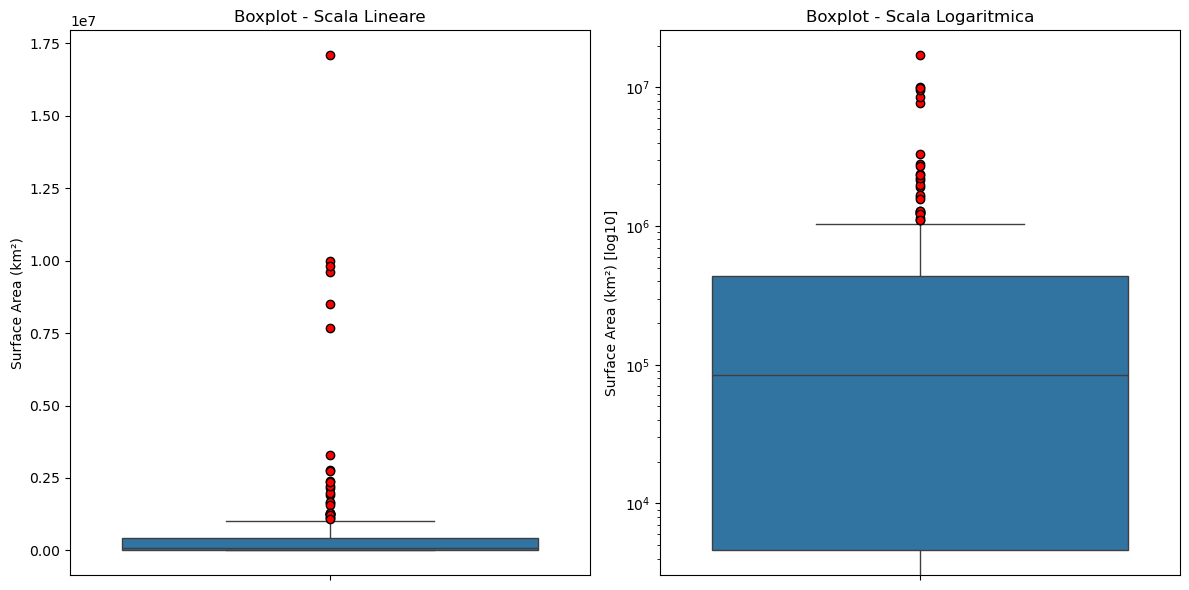

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = df["Surface area (km2)"]

proprieta_outlier = dict(
    marker='o',
    markerfacecolor='red',
    markeredgecolor='black',
    markersize=6,
    linestyle='none'
)

plt.figure(figsize=(12, 6))

# -------------------------------
# 1. Scala lineare
# -------------------------------
plt.subplot(1, 2, 1)
sns.boxplot(data=data, flierprops=proprieta_outlier)
plt.title("Boxplot - Scala Lineare")
plt.ylabel("Surface Area (km²)")

# -------------------------------
# 2. Scala logaritmica
# -------------------------------
plt.subplot(1, 2, 2)
sns.boxplot(data=data, flierprops=proprieta_outlier)
plt.yscale("log")
plt.title("Boxplot - Scala Logaritmica")
plt.ylabel("Surface Area (km²) [log10]")

plt.tight_layout()
plt.show()

Stiamo visualizzando la distribuzione della superficie dei Paesi tramite box plot per individuare eventuali outlier. La prima rappresentazione usa una scala lineare, mentre la seconda una scala logaritmica per evidenziare meglio valori estremamente grandi e facilitare l’analisi dei dati anomali.

In [18]:
import pandas as pd

Q1 = df['Surface area (km2)'].quantile(0.25)
Q3 = df['Surface area (km2)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Seleziono gli outlier
outliers = df[(df['Surface area (km2)'] < lower_bound) | (df['Surface area (km2)'] > upper_bound)]

print("Outliers trovati:")
print(outliers[['country','Surface area (km2)']])

Outliers trovati:
                                  country  Surface area (km2)
2                                 Algeria             2381741
5                                  Angola             1246700
8                               Argentina             2780400
11                              Australia             7692060
27                                 Brazil             8515767
36                                 Canada             9984670
39                                   Chad             1284000
44                                  China             9600000
45                               Colombia             1141748
65                               Ethiopia             1104300
80                              Greenland             2166086
93                                  India             3287263
94                              Indonesia             1910931
95             Iran (Islamic Republic of)             1628750
104                            Kazakhstan           

La presenza di numerosi valori identificati come outlier nel boxplot relativo alla superficie geografica dei Paesi non è attribuibile a errori di inserimento, misurazione o acquisizione dei dati, bensì costituisce una conseguenza naturale della distribuzione intrinsecamente sbilanciata di questa variabile. La superficie degli Stati del mondo presenta infatti una forte eterogeneità strutturale: a fianco di un ampio numero di Paesi di dimensioni contenute, esiste un gruppo ristretto ma significativo di nazioni con estensioni territoriali molto elevate.

Il metodo del boxplot, basato sulla regola ( Q3 + 1.5 $\cdot$ IQR ), classifica automaticamente come outlier tutti i punti che superano la soglia superiore del baffo. Nel caso dei dati analizzati, i Paesi con grandi estensioni territoriali (ad esempio quelli appartenenti ai primi percentili superiori) ricadono naturalmente al di fuori di tali limiti statistici. Ciò non implica anomalie nei dati, ma riflette fedelmente l’effettiva variabilità geografica esistente a livello globale.

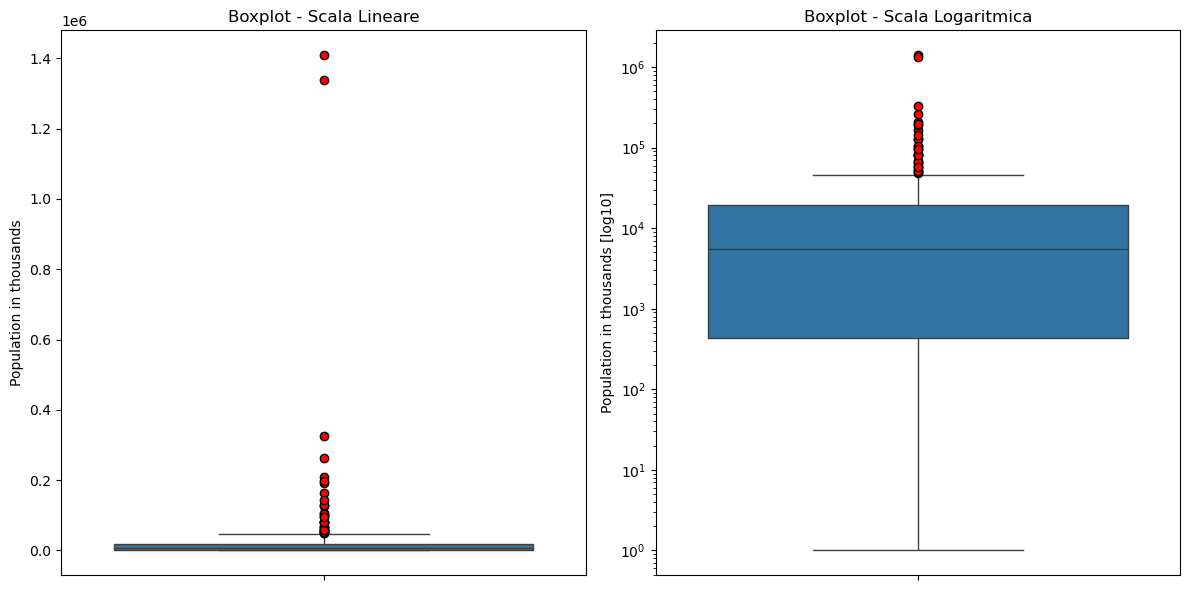

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = df["Population in thousands (2017)"]

proprieta_outlier = dict(
    marker='o',
    markerfacecolor='red',
    markeredgecolor='black',
    markersize=6,
    linestyle='none'
)

plt.figure(figsize=(12, 6))

# -------------------------------
# 1. Scala lineare
# -------------------------------
plt.subplot(1, 2, 1)
sns.boxplot(data=data, flierprops=proprieta_outlier)
plt.title("Boxplot - Scala Lineare")
plt.ylabel("Population in thousands")

# -------------------------------
# 2. Scala logaritmica
# -------------------------------
plt.subplot(1, 2, 2)
sns.boxplot(data=data, flierprops=proprieta_outlier)
plt.yscale("log")
plt.title("Boxplot - Scala Logaritmica")
plt.ylabel("Population in thousands [log10]")

plt.tight_layout()
plt.show()

Anche per la variabile **Population in thousands** gli outlier individuati non rappresentano errori di inserimento, ma riflettono la reale eterogeneità demografica tra i Paesi. Alcuni Stati hanno popolazioni estremamente elevate rispetto alla media globale, mentre altri sono molto piccoli, giustificando la presenza di valori distanti senza necessità di correzione.

In [20]:
import pandas as pd

Q1 = df['Population in thousands (2017)'].quantile(0.25)
Q3 = df['Population in thousands (2017)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Seleziono gli outlier
outliers = df[(df['Population in thousands (2017)'] < lower_bound) | (df['Population in thousands (2017)'] > upper_bound)]

print("Outliers trovati:")
print(outliers[['country','Population in thousands (2017)']])

Outliers trovati:
                                  country  Population in thousands (2017)
16                             Bangladesh                          164670
27                                 Brazil                          209288
44                                  China                         1409517
45                               Colombia                           49066
60                                  Egypt                           97553
65                               Ethiopia                          104957
70                                 France                           64980
76                                Germany                           82114
93                                  India                         1339180
94                              Indonesia                          263991
95             Iran (Islamic Republic of)                           81163
100                                 Italy                           59360
102                 

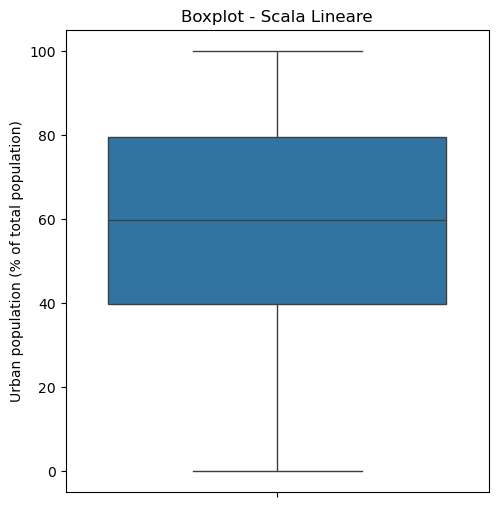

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = df["Urban population (% of total population)"]

proprieta_outlier = dict(
    marker='o',
    markerfacecolor='red',
    markeredgecolor='black',
    markersize=6,
    linestyle='none'
)

plt.figure(figsize=(12, 6))

# -------------------------------
# 1. Scala lineare
# -------------------------------
plt.subplot(1, 2, 1)
sns.boxplot(data=data, flierprops=proprieta_outlier)
plt.title("Boxplot - Scala Lineare")
plt.ylabel("Urban population (% of total population)")

plt.show()

Il boxplot presenta una distribuzione **priva di outlier** e copre l'intera gamma teorica da **0% a 100%**.

* **Mediana (Q2):** $\approx 60\%$.
* **Intervallo Interquartile (IQR):** $\approx 40$ punti percentuali (dal $40\%$ all'$80\%$).

<a id="analisi-esplorativa"></a>

# Analisi Esplorativa

In questa fase esploriamo i dati per comprenderne le caratteristiche principali. Viene eseguita un’**analisi univariata**, calcolando indici statistici e visualizzazioni per singole variabili numeriche e categoriali, e un’**analisi multivariata**, studiando le relazioni tra più variabili tramite correlazioni e grafici appropriati. L’obiettivo è individuare pattern, distribuzioni e relazioni significative all’interno del dataset, fornendo una base solida per le successive fasi di analisi.

<a id="analisi-univariata-per-le-variabili-numeriche"></a>

## Analisi Univariata per Variabili Numeriche

In [22]:
num = df.select_dtypes(include="number")

desc = num.describe().T

desc["variance"] = num.var()
desc["IQR"] = num.quantile(0.75) - num.quantile(0.25)

desc

count           mean  \
Surface area (km2)                                  227.0  592017.325991   
Population in thousands (2017)                      230.0   32720.004348   
Population density (per km2, 2017)                  230.0     461.144783   
Sex ratio (m per 100 f, 2017)                       228.0     101.960526   
GDP: Gross domestic product (million current US$)   209.0    352356.5311   
GDP growth rate (annual %, const. 2005 prices)      209.0       2.524402   
GDP per capita (current US$)                        209.0   15632.401435   
Economy: Agriculture (% of GVA)                     207.0       11.54058   
Economy: Industry (% of GVA)                        209.0        27.5689   
Economy: Services and other activity (% of GVA)     209.0      61.027273   
Employment: Agriculture (% of employed)             195.0      24.797436   
Employment: Industry (% of employed)                196.0      18.853061   
Employment: Services (% of employed)                196.0      56.160714   
Unemployment (% of labour force)                    203.0        8.80197   
Labour force participation (female pop. %)          201.0      52.801493   
Labour force participation (male pop. %)            201.0      73.679104   
Agricultural production index (2004-2006=100)       212.0     116.212264   
Food production index (2004-2006=100)               212.0     117.051887   
International trade: Exports (million US$)          211.0   73742.672986   
International trade: Imports (million US$)          211.0   74412.530806   
International trade: Balance (million US$)          211.0    -669.810427   
Balance of payments, current account (million US$)  180.0    1141.727778   
Population growth rate (average annual %)           230.0       1.312174   
Urban population (% of total population)            230.0      59.485652   
Urban population growth rate (average annual %)     230.0       1.858696   
Fertility rate, total (live births per woman)       213.0       2.829108   
Life expectancy at birth (females, years)           212.0      73.975943   
Life expectancy at birth (males, years)             212.0      69.015566   
Population age distribution (0-14 years, %)         222.0      27.117568   
Population age distribution (60+ years, %)          222.0      12.741441   
International migrant stock (000)                   230.0    1058.849565   
International migrant stock (% of total pop.)       230.0      13.362174   
Refugees and others of concern to UNHCR (in tho...  184.0      347.68587   
Infant mortality rate (per 1000 live births         205.0      25.386341   
Health: Total expenditure (% of GDP)                191.0       6.757592   
Health: Physicians (per 1000 pop.)                  124.0       2.178226   
Education: Government expenditure (% of GDP)        149.0       4.573826   
Education: Primary gross enrol. ratio (female p...  187.0     102.351872   
Education: Primary gross enrol. ratio (male per...  187.0     105.073262   
Education: Secondary gross enrol. ratio (female...  175.0      84.526286   
Education: Secondary gross enrol. ratio (male p...  175.0      84.329714   
Education: Tertiary gross enrol. ratio (female ...  159.0      43.943396   
Education: Tertiary gross enrol. ratio (male pe...  159.0      35.588679   
Seats held by women in national parliaments %       193.0      21.247668   
Mobile-cellular subscriptions (per 100 inhabita...  210.0     107.417143   
Individuals using the Internet (per 100 inhabit...  213.0      48.701408   
Threatened species (number)                         229.0     200.231441   
Forested area (% of land area)                      222.0       32.05991   
CO2 emission estimates (million tons)               217.0     155.997235   
CO2 emission estimates (tons per capita)            216.0       4.981019   
Energy production, primary (Petajoules)             210.0    2699.219048   
Energy supply per capita (Gigajoules)               220.0      88.772727   
Pop. using improved drin

La tabella mostra i principali **indici statistici** delle variabili numeriche del dataset. Per ciascuna variabile vengono riportati la **media, la mediana e la moda** per descrivere la tendenza centrale, e la **deviazione standard, la varianza, il range e l’intervallo interquartile (IQR)** per valutare la dispersione e la variabilità dei dati. Questi indicatori forniscono una panoramica chiara delle caratteristiche fondamentali di ogni variabile.


In [23]:
numeric_df = df.select_dtypes(include='number')
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5*IQR)) | (numeric_df > (Q3 + 1.5*IQR))).sum()
print(outliers.sort_values(ascending=False))

International trade: Balance (million US$)                       54
Balance of payments, current account (million US$)               53
International trade: Exports (million US$)                       36
Energy production, primary (Petajoules)                          35
CO2 emission estimates (million tons)                            34
International migrant stock (000)                                32
International trade: Imports (million US$)                       31
Refugees and others of concern to UNHCR (in thousands)           30
Population in thousands (2017)                                   29
International migrant stock (% of total pop.)                    28
Surface area (km2)                                               27
GDP: Gross domestic product (million current US$)                25
Sex ratio (m per 100 f, 2017)                                    25
Threatened species (number)                                      24
Education: Primary gross enrol. ratio (male per 



Il codice individua gli **outlier nelle variabili numeriche** calcolando il primo e terzo quartile (Q1, Q3) e l’intervallo interquartile (IQR). Vengono conteggiati i valori al di fuori di [Q1 - 1.5·IQR, Q3 + 1.5·IQR] e mostrato il numero di outlier per ciascuna colonna, ordinati dal più alto al più basso.


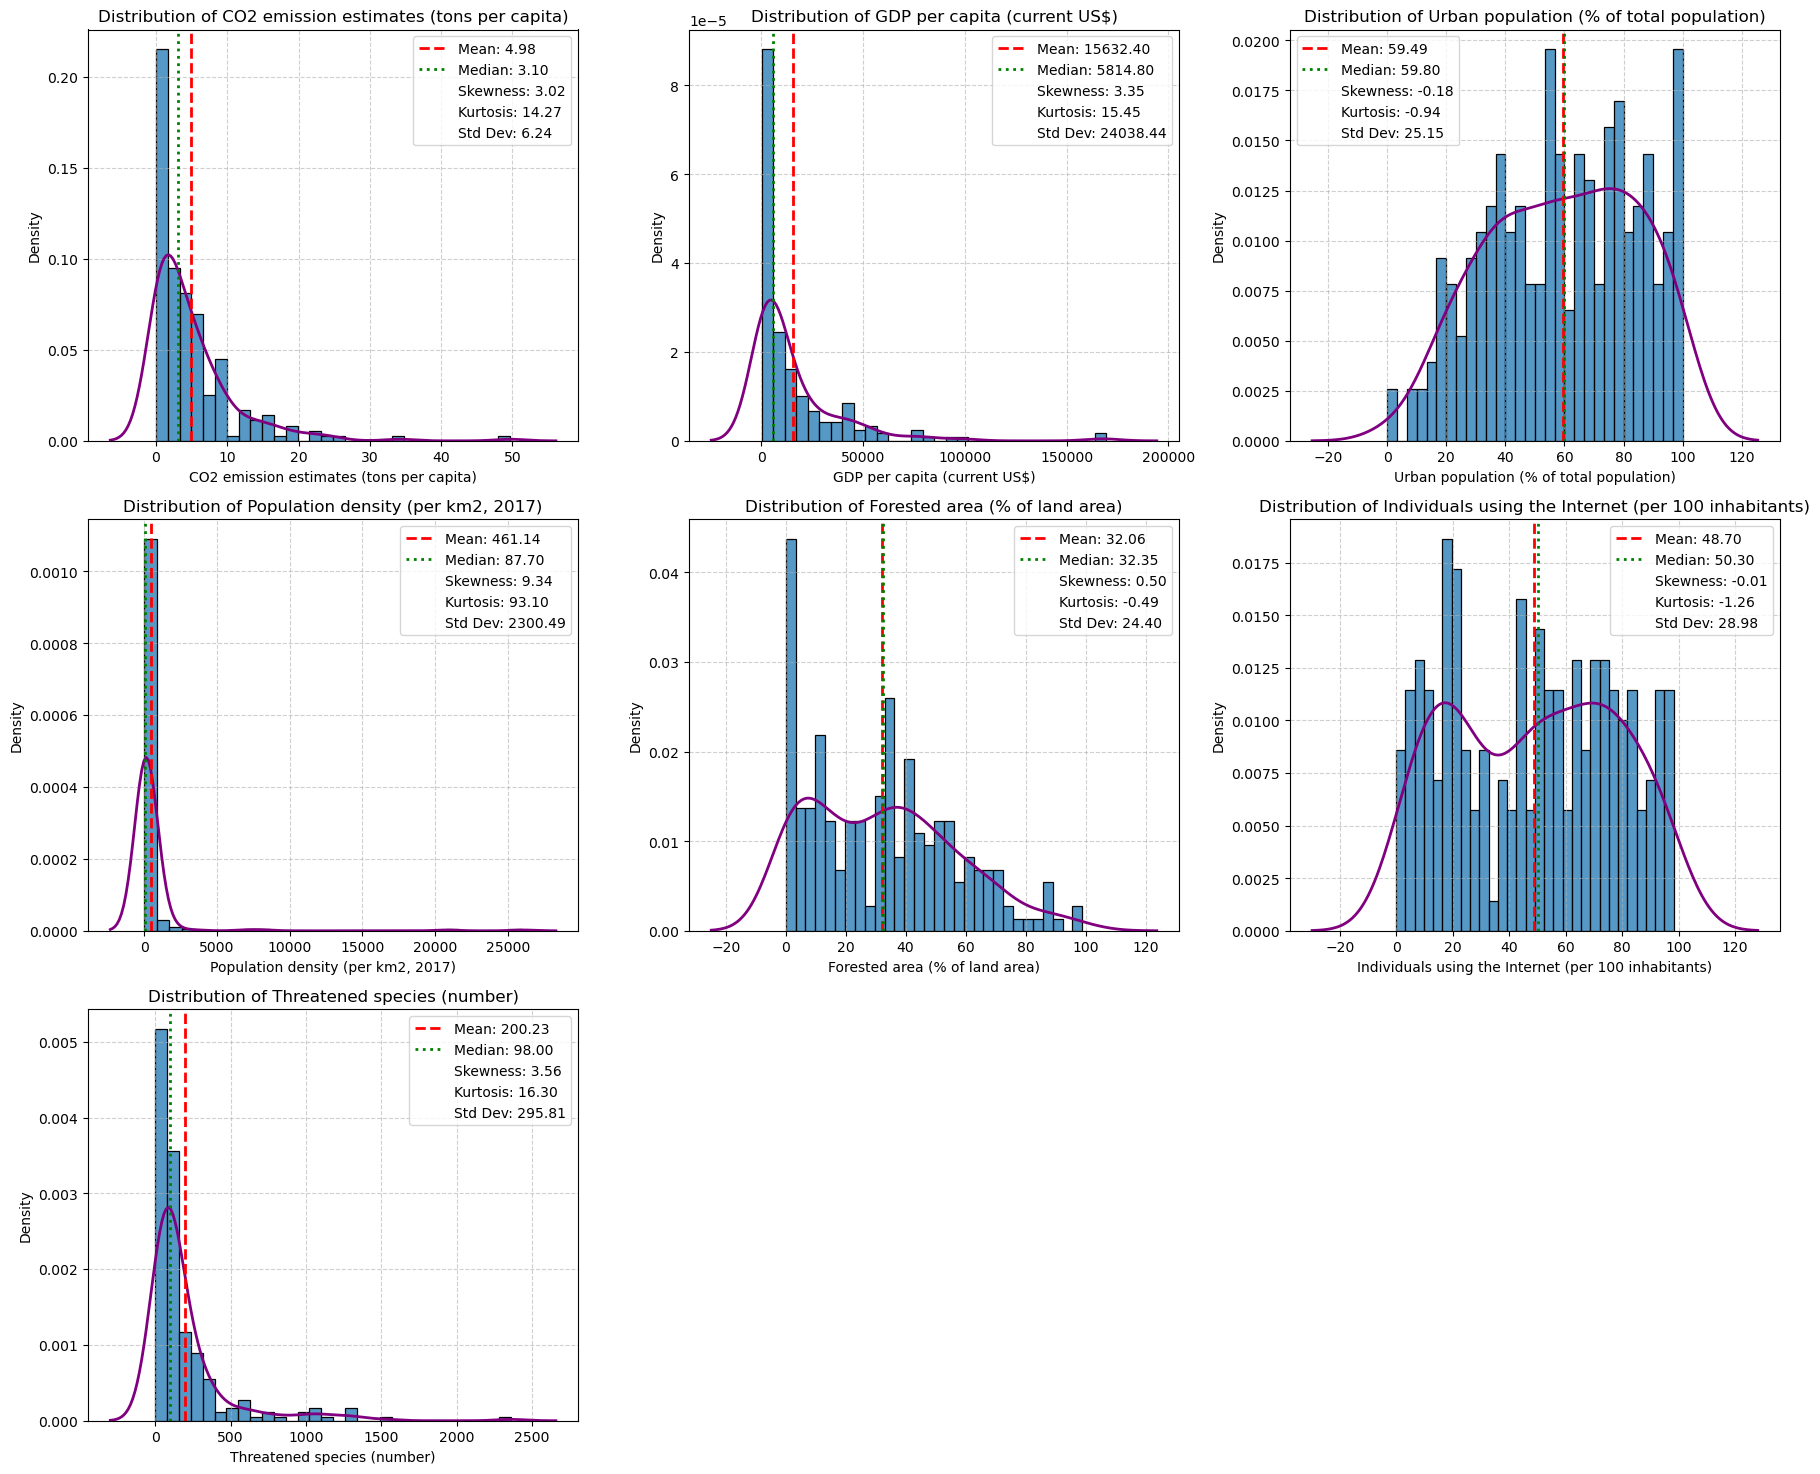

In [24]:
cols_to_plot = [
    "CO2 emission estimates (tons per capita)",
    "GDP per capita (current US$)",
    "Urban population (% of total population)",
    "Population density (per km2, 2017)",
    "Forested area (% of land area)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Threatened species (number)"
]

plt.figure(figsize=(18, 15))

for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    
    ax = sns.histplot(df[col], bins=30, edgecolor="black", stat="density")
    sns.kdeplot(df[col], color="purple", lw=2, ax=ax)
    
    plt.title(f"Distribution of {col}")
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    skew_val = df[col].skew()
    kurt_val = df[col].kurt()
    std_val = df[col].std()
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle=':', linewidth=2,
                label=f'Median: {median_val:.2f}')
    
    plt.plot([], [], ' ', label=f'Skewness: {skew_val:.2f}')
    plt.plot([], [], ' ', label=f'Kurtosis: {kurt_val:.2f}')
    plt.plot([], [], ' ', label=f'Std Dev: {std_val:.2f}')
    
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Abbiamo condotto un'**analisi esplorativa** su sette variabili globali (es. PIL, emissioni $\text{CO}_2$, popolazione urbana) utilizzando istogrammi per valutarne la distribuzione:



1.  **Assenza di Outlier:** La variabile **Popolazione Urbana** è risultata **priva di valori anomali** e altamente dispersa (range $0\%-100\%$, Mediana $\approx 60\%$).

2.  **Forte Asimmetria Positiva:** Le distribuzioni di **PIL pro capite**, **Emissioni di $\text{CO}_2$**, **Densità di Popolazione** e **Specie Minacciate** mostrano una marcata **asimmetria positiva** (coda a destra).
    * Ciò indica una forte **disuguaglianza** o **disomogeneità**, con la maggior parte delle osservazioni concentrate su valori bassi e un piccolo numero con valori estremamente elevati.

3.  **Distribuzione Più Uniforme:** Le variabili **Popolazione Urbana**, **Area Forestale** e **Uso di Internet** presentano una dispersione dei dati più equilibrata.



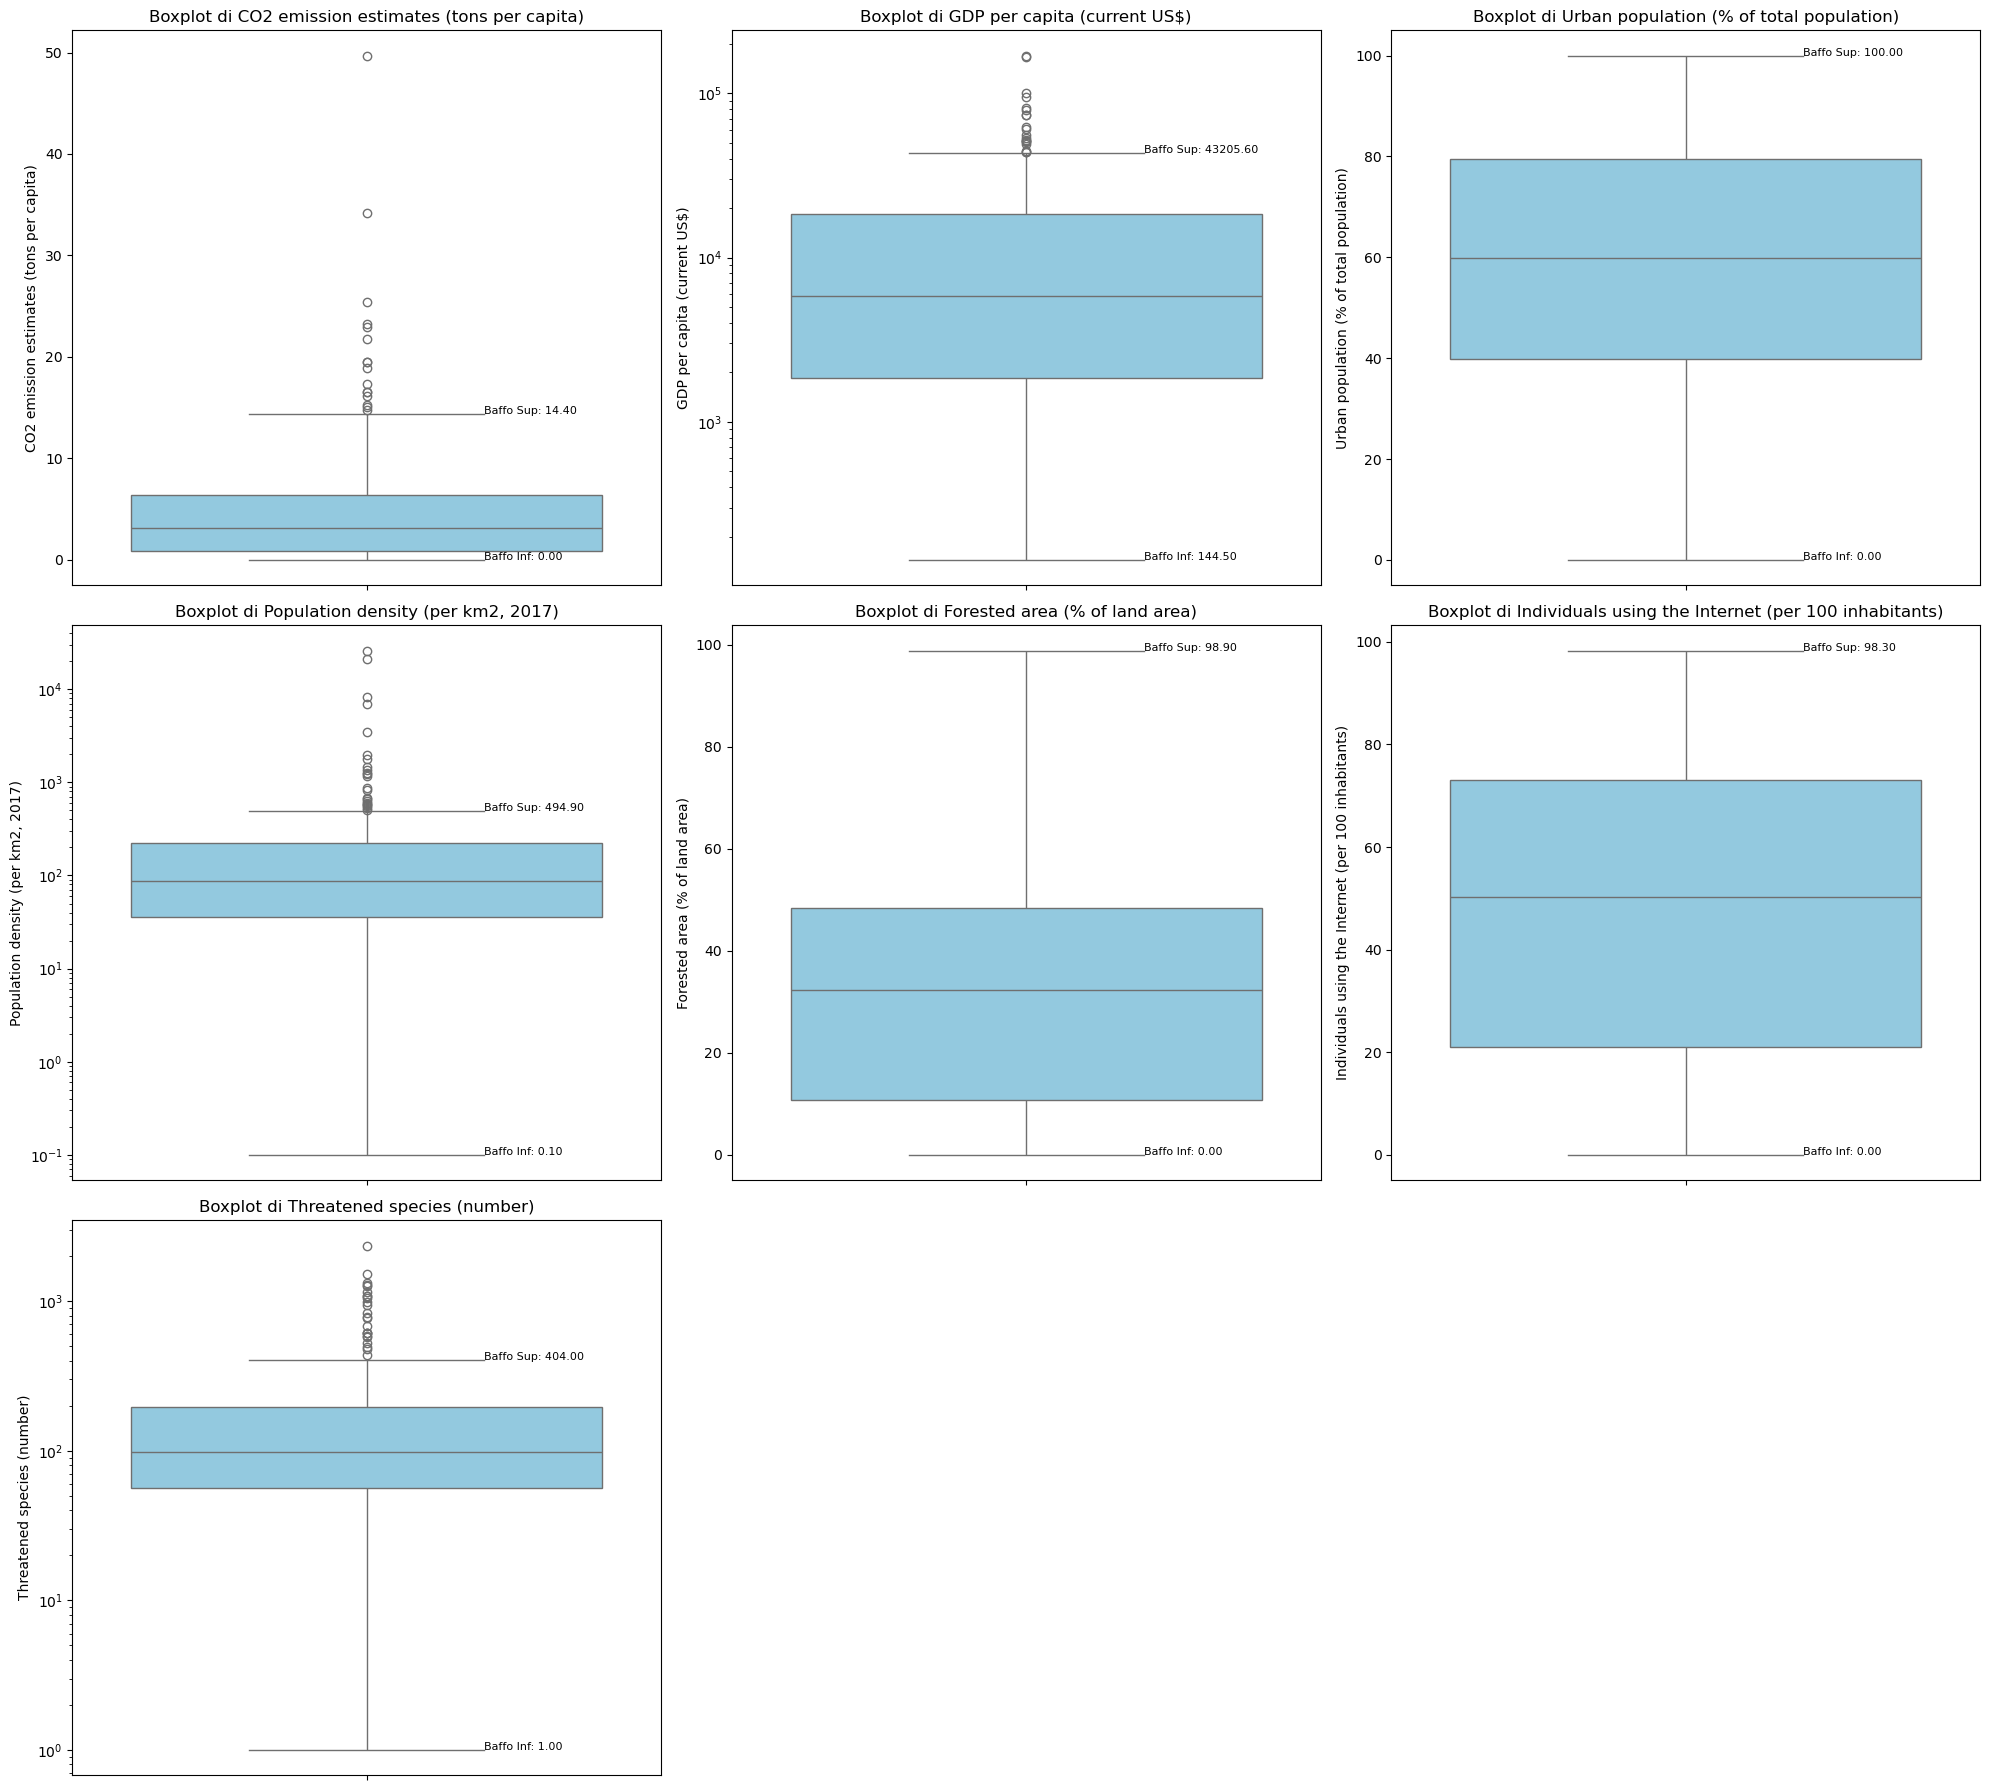

In [25]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(cols_to_plot):
    ax = plt.subplot(3, 3, i + 1)

    data_clean = df[col].dropna()

    sns.boxplot(
        y=data_clean,
        color='skyblue',
        whis=1.5,
        ax=ax,
        showfliers=True
    )

    # Scala logaritmica per variabili molto skewed
    if data_clean.max() > data_clean.median() * 20:
        ax.set_yscale("log")

    # Calcolo quartili
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    whis_upper = data_clean[data_clean <= upper_bound].max()
    whis_lower = data_clean[data_clean >= lower_bound].min()

    ax.annotate(f'Baffo Sup: {whis_upper:.2f}', xy=(0, whis_upper),
                xytext=(0.2, whis_upper), textcoords="data", fontsize=8)

    ax.annotate(f'Baffo Inf: {whis_lower:.2f}', xy=(0, whis_lower),
                xytext=(0.2, whis_lower), textcoords="data", fontsize=8)

    ax.set_title(f"Boxplot di {col}")

plt.tight_layout()
plt.show()

L'analisi dei sette boxplot evidenzia una netta distinzione tra le distribuzioni delle variabili:

1.  **Variabili con Forte Asimmetria e Outlier:**
    * **PIL pro capite, Emissioni $\text{CO}_2$, Densità di Popolazione, Specie Minacciate:** Queste distribuzioni sono rappresentate su **scala logaritmica** e mostrano una **forte concentrazione di dati verso il basso (IQR stretto)** e la **presenza di numerosi outlier** ad alto valore.
    * **Implicazione:** Sussiste una marcata **disuguaglianza** e disomogeneità, con pochi casi estremi che trainano le medie.

2.  **Variabili Bilanciate e Senza Outlier:**
    * **Popolazione Urbana, Area Forestale, Uso di Internet:** Queste distribuzioni sono su **scala lineare**, hanno un **IQR ampio** e sono **prive di outlier**.
    * **Implicazione:** I valori sono distribuiti in modo più uniforme e omogeneo.

<a id="analisi-univariata-per-le-variabili-categoriche"></a>

## Analisi Univariata per Variabili Categoriche


In questa fase stiamo analizzando l'unica **variabile categorica** del dataset, **“Region”**. Vengono prima create **tabelle di frequenza**, assolute e relative, per quantificare la distribuzione delle categorie. Successivamente, la distribuzione viene rappresentata graficamente tramite **bar plot**, sia per le frequenze assolute che per quelle relative, consentendo di visualizzare chiaramente la composizione e la proporzione di ciascuna regione all’interno del dataset.


                   Frequenza Assoluta  Frequenza Relativa (%)
Region                                                       
Caribbean                          25                   10.87
EasternAfrica                      19                    8.26
WesternAsia                        18                    7.83
WesternAfrica                      17                    7.39
SouthernEurope                     16                    6.96
SouthAmerica                       14                    6.09
NorthernEurope                     13                    5.65
South-easternAsia                  11                    4.78
EasternEurope                      10                    4.35
MiddleAfrica                        9                    3.91
Polynesia                           9                    3.91
SouthernAsia                        9                    3.91
WesternEurope                       9                    3.91
CentralAmerica                      8                    3.48
Micrones

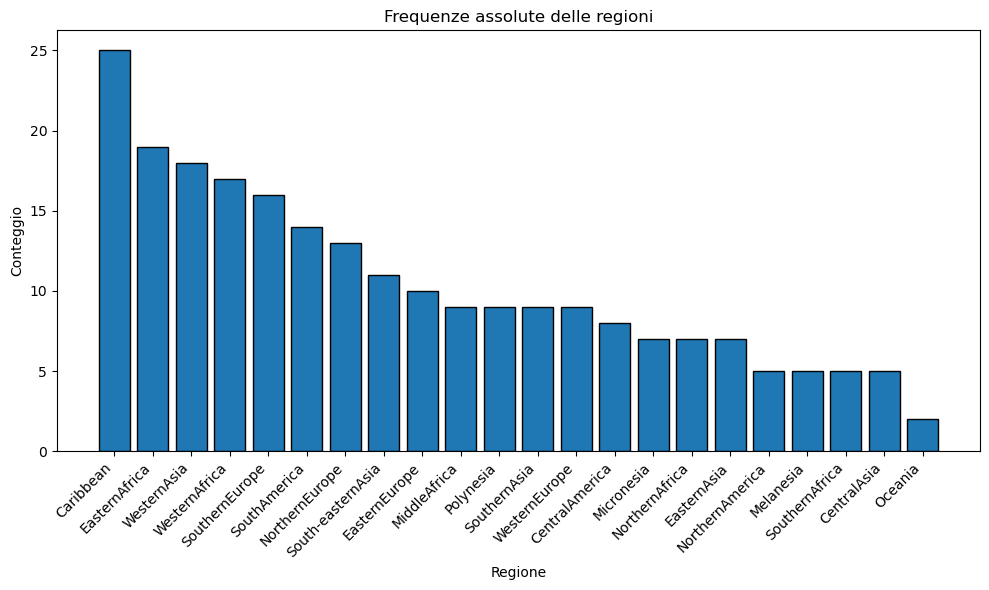

In [26]:
import matplotlib.pyplot as plt

# --- 1. Tabelle di frequenza ---
freq_abs = df['Region'].value_counts()
freq_rel = df['Region'].value_counts(normalize=True) * 100

# Tabella combinata
freq_table = pd.DataFrame({
    'Frequenza Assoluta': freq_abs,
    'Frequenza Relativa (%)': freq_rel.round(2)
})

print(freq_table)
# --- Grafico delle frequenze assolute ---
plt.figure(figsize=(10, 6))
plt.bar(freq_abs.index, freq_abs.values, edgecolor='black')

plt.title("Frequenze assolute delle regioni")
plt.xlabel("Regione")
plt.ylabel("Conteggio")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Il grafico a barre mostra la **distribuzione delle frequenze assolute** (conteggio) delle unità statistiche tra le diverse regioni geografiche.

1.  **Massima Rappresentazione:** La regione **Caribbean** (Caraibi) è la più rappresentata, con **25** osservazioni.
2.  **Minima Rappresentazione:** La regione **Oceania** è la meno rappresentata, con solo **2** osservazioni.

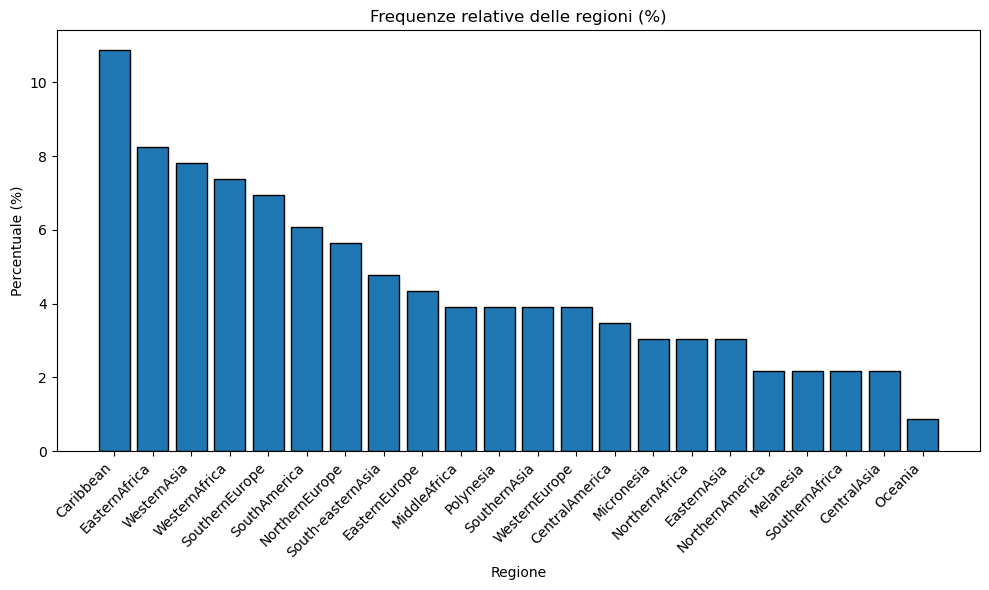

In [27]:

# --- Grafico delle frequenze relative ---
plt.figure(figsize=(10, 6))
plt.bar(freq_rel.index, freq_rel.values, edgecolor='black')

plt.title("Frequenze relative delle regioni (%)")
plt.xlabel("Regione")
plt.ylabel("Percentuale (%)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Il grafico a barre mostra la **distribuzione delle frequenze relative (in %)** delle unità statistiche tra le diverse regioni geografiche.


1.  **Massima Rappresentazione:** La regione **Caribbean** (Caraibi) ha il peso maggiore, rappresentando circa l'**11%** del campione.
2.  **Minima Rappresentazione:** La regione **Oceania** è la meno rappresentata, con una frequenza inferiore all'**1%** ($\approx 0.9\%$).

<a id="analisi-multivariata"></a>

## Analisi Multivariata

In questa fase eseguiamo un’**analisi multivariata** per studiare le relazioni tra più variabili numeriche del dataset, in particolare quelle selezionate in base alle domande guida del progetto.

Per prima cosa, utilizziamo una **scatter matrix** (pairplot) per visualizzare graficamente le relazioni tra coppie di variabili, permettendo di individuare pattern lineari, non lineari o assenza di correlazione.

Successivamente, calcoliamo le **correlazioni quantitative** utilizzando sia il coefficiente di **Pearson**, che misura la relazione **lineare**, sia il coefficiente di **Spearman**, che valuta correlazioni **non lineari**. I risultati vengono presentati anche tramite **heatmap**, che evidenziano in maniera immediata la forza e la direzione delle relazioni tra le variabili.


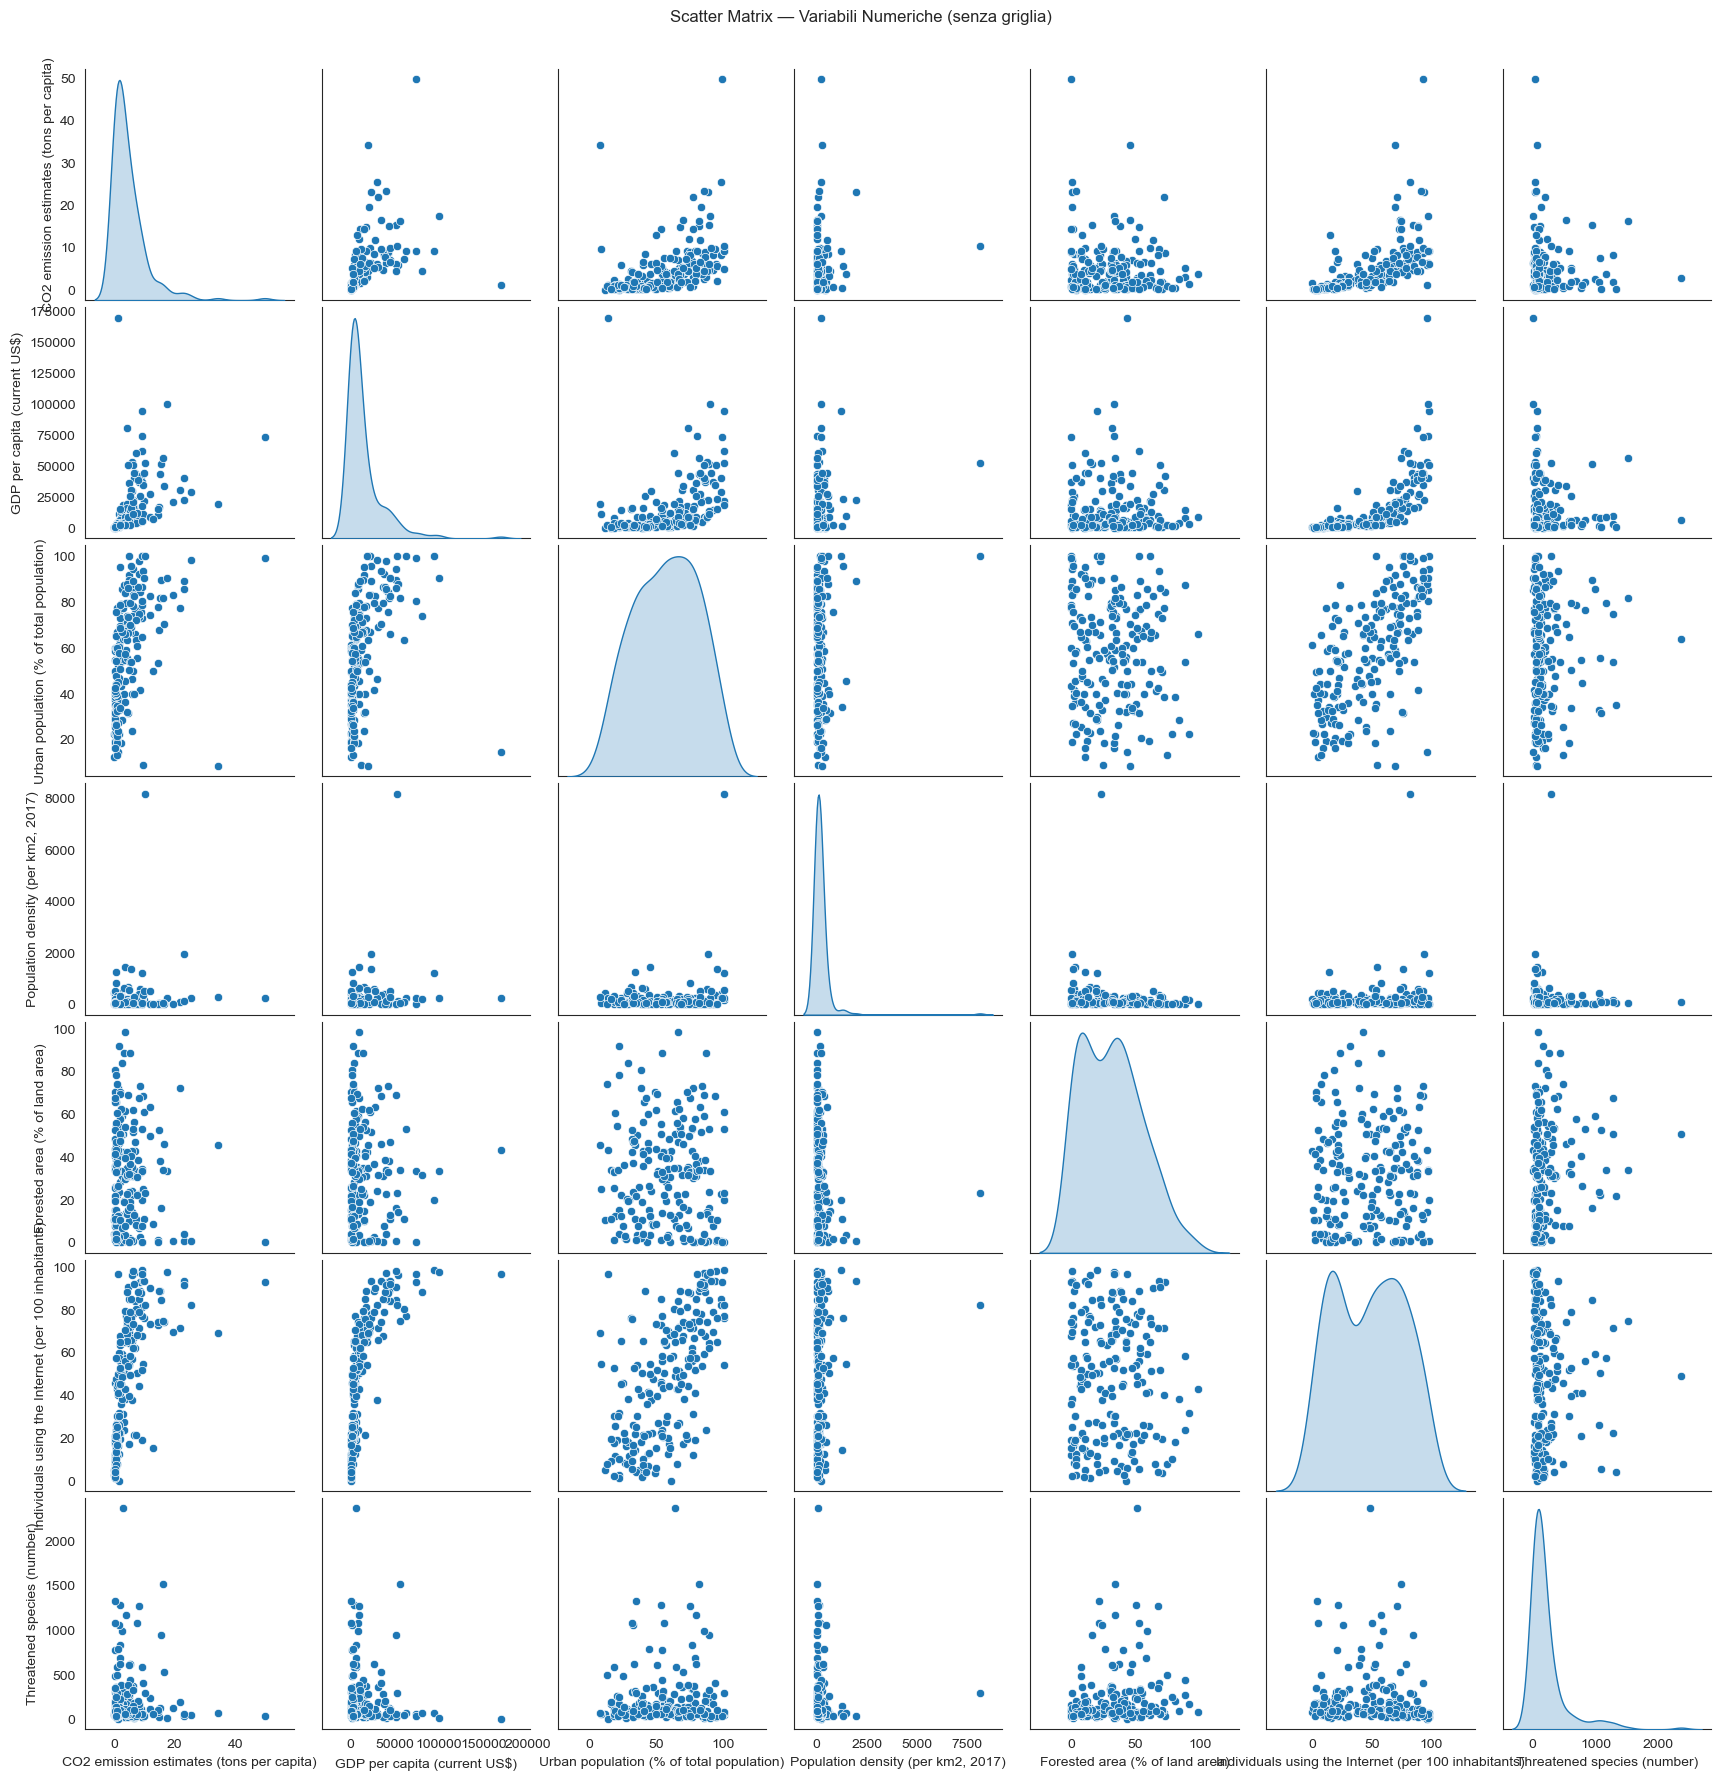


=== CORRELAZIONE PEARSON ===
                                                    CO2 emission estimates (tons per capita)  \
CO2 emission estimates (tons per capita)                                            1.000000   
GDP per capita (current US$)                                                        0.487969   
Urban population (% of total population)                                            0.447037   
Population density (per km2, 2017)                                                  0.110162   
Forested area (% of land area)                                                     -0.116270   
Individuals using the Internet (per 100 inhabit...                                  0.586898   
Threatened species (number)                                                        -0.046541   

                                                    GDP per capita (current US$)  \
CO2 emission estimates (tons per capita)                                0.487969   
GDP per capita (current US$)     

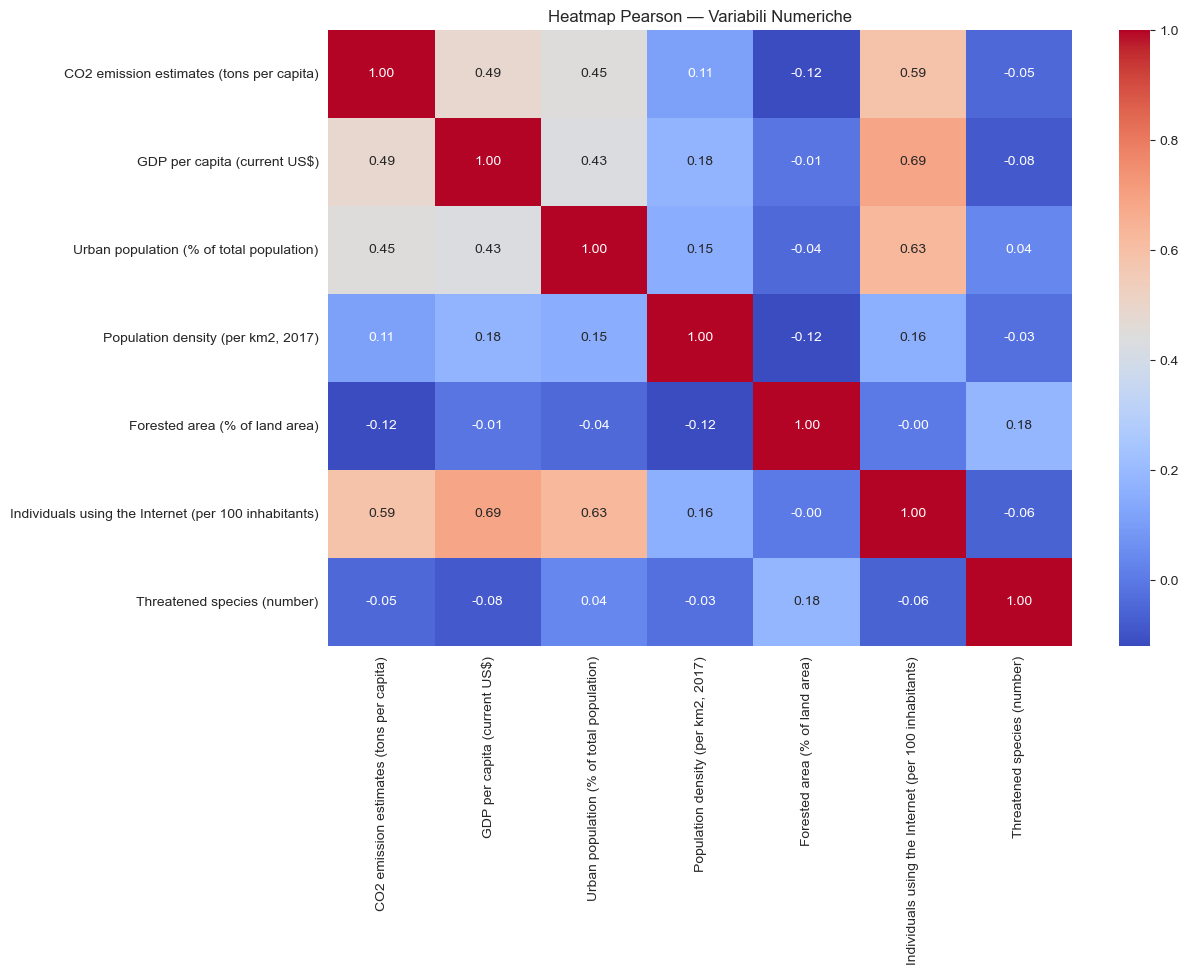

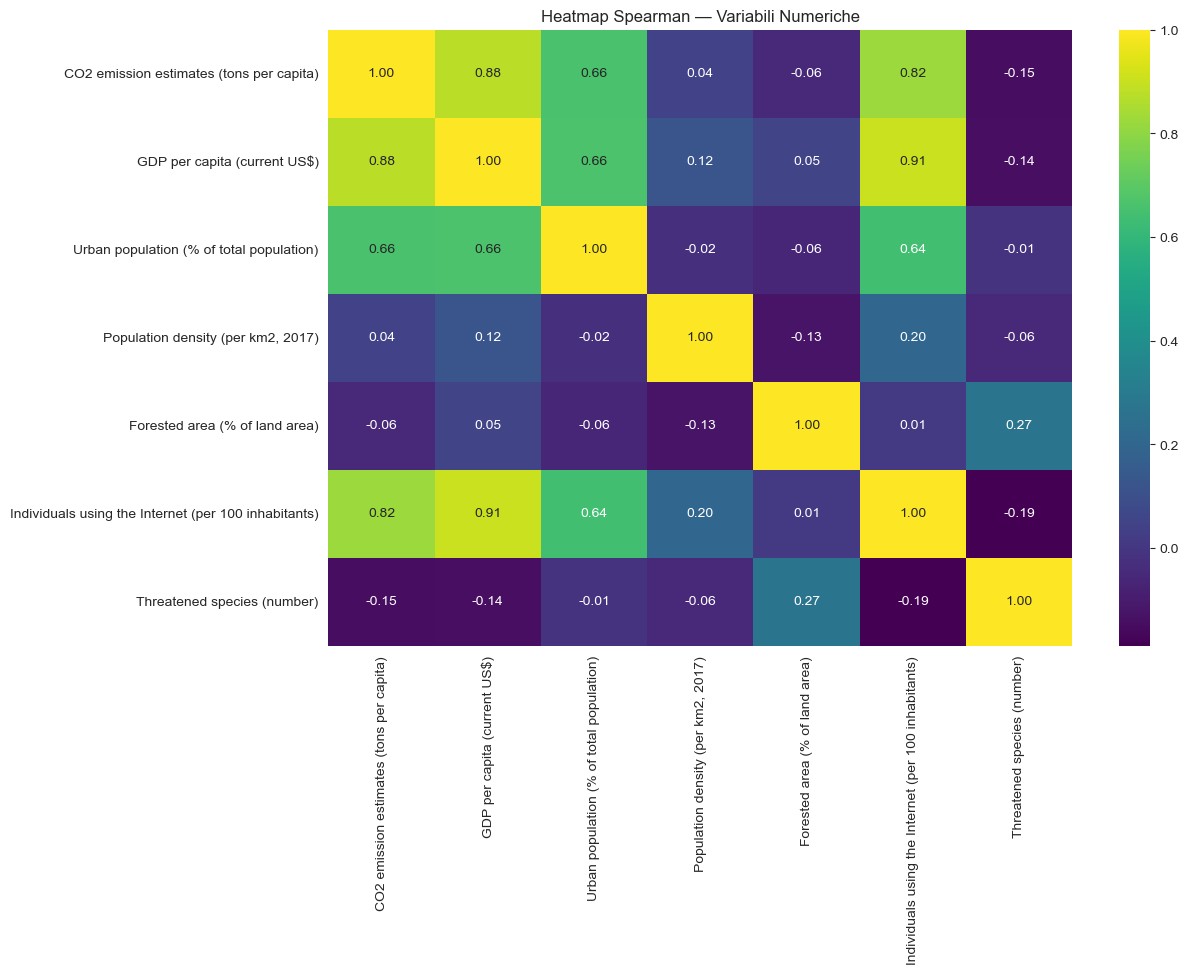

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Stile senza griglia
sns.set_style("white")

# =============================================================
# COLONNE DELLE 5 DOMANDE
# =============================================================
colonne_numeriche = [
    "CO2 emission estimates (tons per capita)",
    "GDP per capita (current US$)",
    "Urban population (% of total population)",
    "Population density (per km2, 2017)",
    "Forested area (% of land area)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Threatened species (number)"
]

df_num = df[colonne_numeriche].dropna()

# =============================================================
# SCATTER MATRIX SENZA GRIGLIA
# =============================================================
sns.pairplot(df_num, diag_kind="kde")
plt.suptitle("Scatter Matrix — Variabili Numeriche (senza griglia)", y=1.02)
plt.show()

# =============================================================
# CORRELAZIONI
# =============================================================
pearson_corr = df_num.corr(method="pearson")
spearman_corr = df_num.corr(method="spearman")

print("\n=== CORRELAZIONE PEARSON ===")
print(pearson_corr)

print("\n=== CORRELAZIONE SPEARMAN ===")
print(spearman_corr)

# =============================================================
# HEATMAP
# =============================================================
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Pearson — Variabili Numeriche")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Heatmap Spearman — Variabili Numeriche")
plt.show()


1.  **Correlazione Estremamente Forte:** Si conferma visivamente un "nucleo caldo" (celle giallo intenso, $\rho \ge 0.8$) tra **PIL pro capite**, **Emissioni di $\text{CO}_2$** e **Uso di Internet**. Questi tre indicatori formano un cluster interdipendente, dove la crescita economica e tecnologica è sistematicamente accompagnata da un maggiore impatto emissivo.
2.  **Correlazioni Moderate:** La **Popolazione Urbana** mostra legami positivi di media intensità (verde chiaro, $\rho \approx 0.66$) con il blocco economico-ambientale, suggerendo che l'urbanizzazione è un fattore concomitante allo sviluppo, ma meno rigidamente vincolato rispetto al PIL o a Internet.
4.  **Correlazioni Trascurabili:** Le variabili **Densità di Popolazione** e **Area Forestale** appaiono come "isole" scure nella heatmap, mostrando correlazioni nulle o vicine allo zero con quasi tutte le altre metriche. Ciò implica che la densità abitativa e la copertura forestale sono indipendenti dalle dinamiche di ricchezza e digitalizzazione.

Colonne incluse nell'analisi:
 - Threatened species (number)
 - Urban population (% of total population)
 - Life expectancy at birth (females, years)
 - GDP per capita (current US$)
 - Population density (per km2, 2017)
 - Forested area (% of land area)
 - CO2 emission estimates (tons per capita)
 - Infant mortality rate (per 1000 live births
 - Individuals using the Internet (per 100 inhabitants)


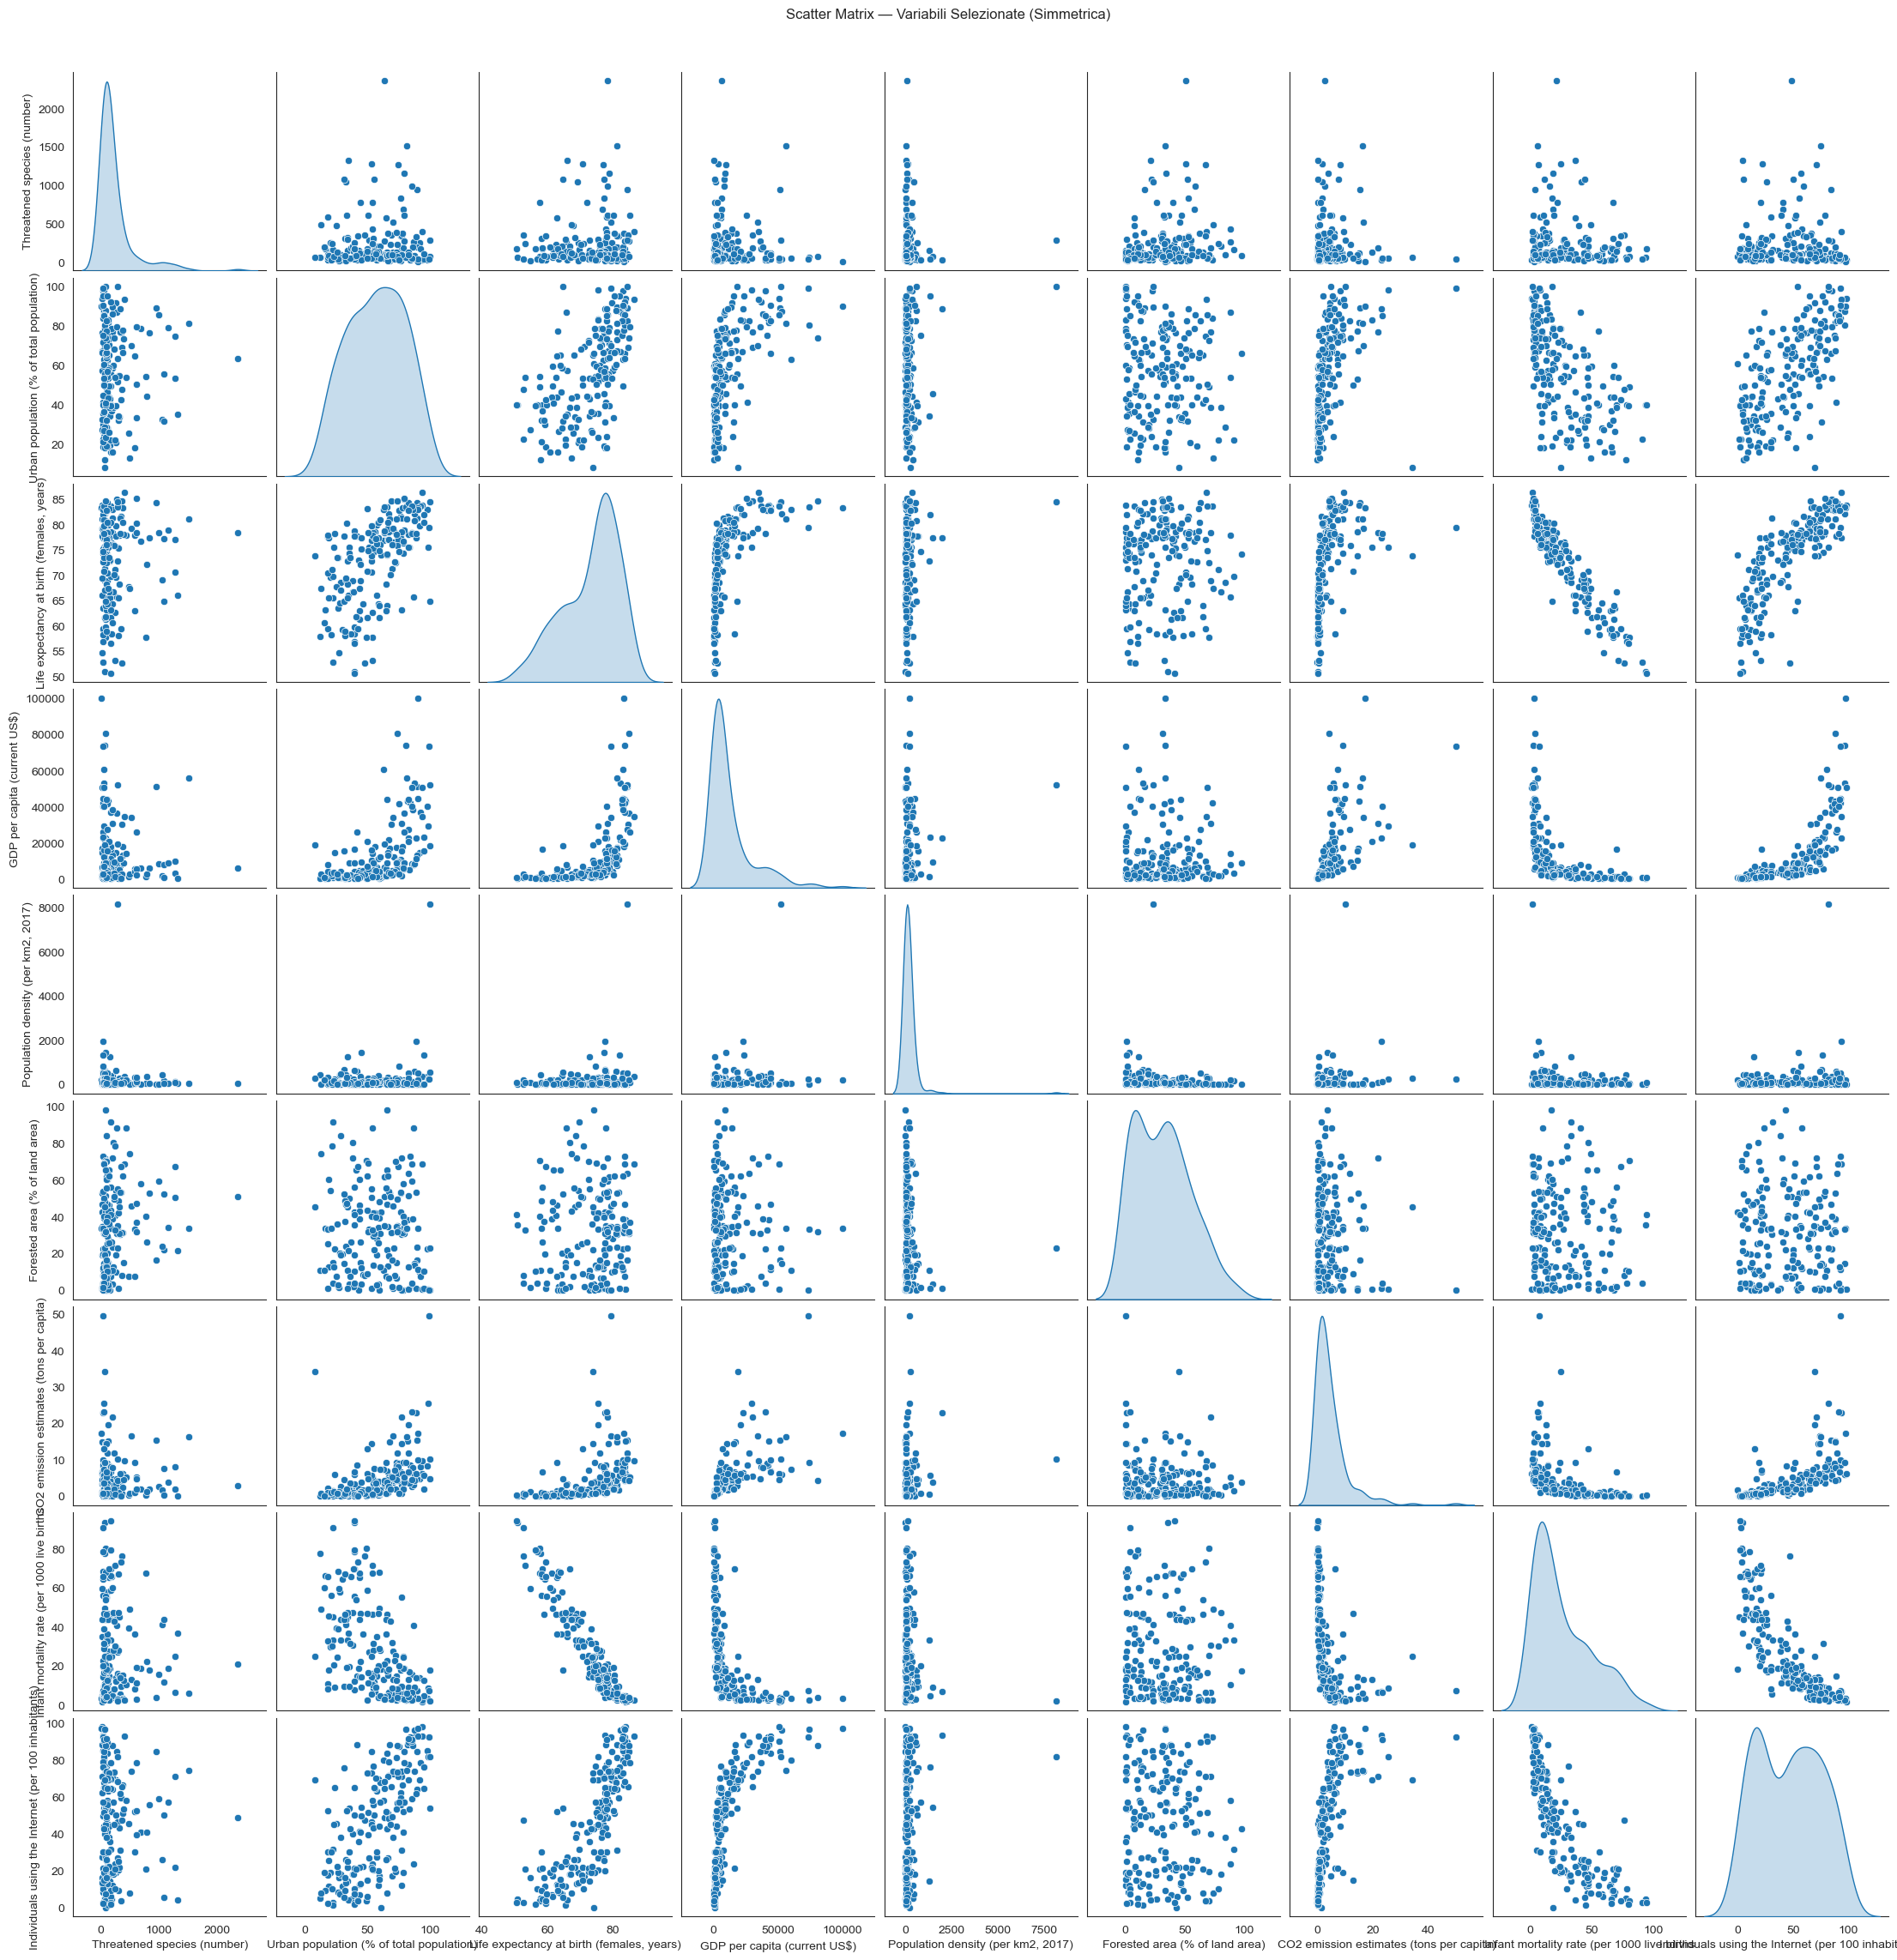


=== MATRICE DI CORRELAZIONE — PEARSON ===
                                                    Threatened species (number)  \
Threatened species (number)                                            1.000000   
Urban population (% of total population)                               0.045594   
Life expectancy at birth (females, years)                              0.060181   
GDP per capita (current US$)                                          -0.041937   
Population density (per km2, 2017)                                    -0.025886   
Forested area (% of land area)                                         0.192872   
CO2 emission estimates (tons per capita)                              -0.038484   
Infant mortality rate (per 1000 live births                           -0.046868   
Individuals using the Internet (per 100 inhabit...                    -0.031811   

                                                    Urban population (% of total population)  \
Threatened species (number)   

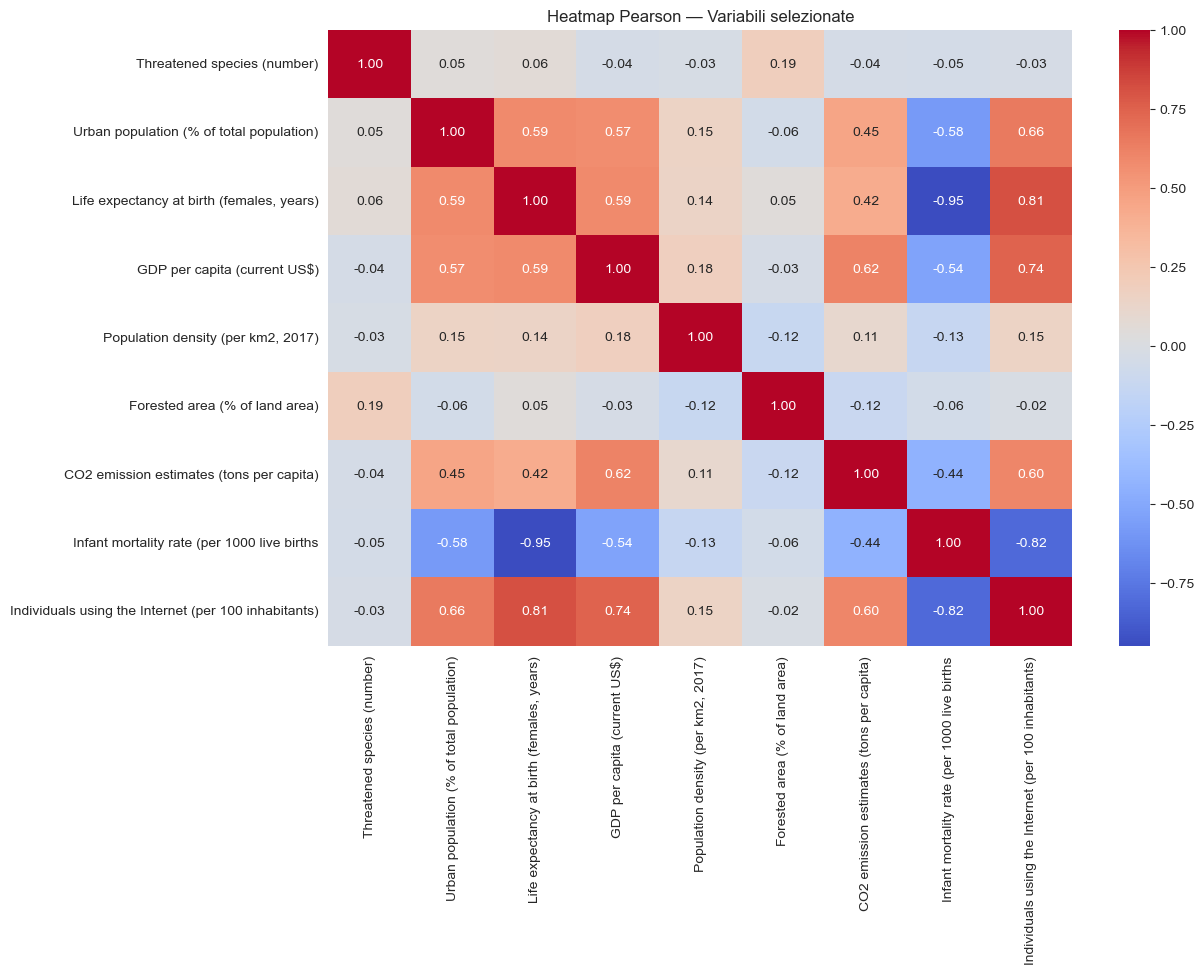

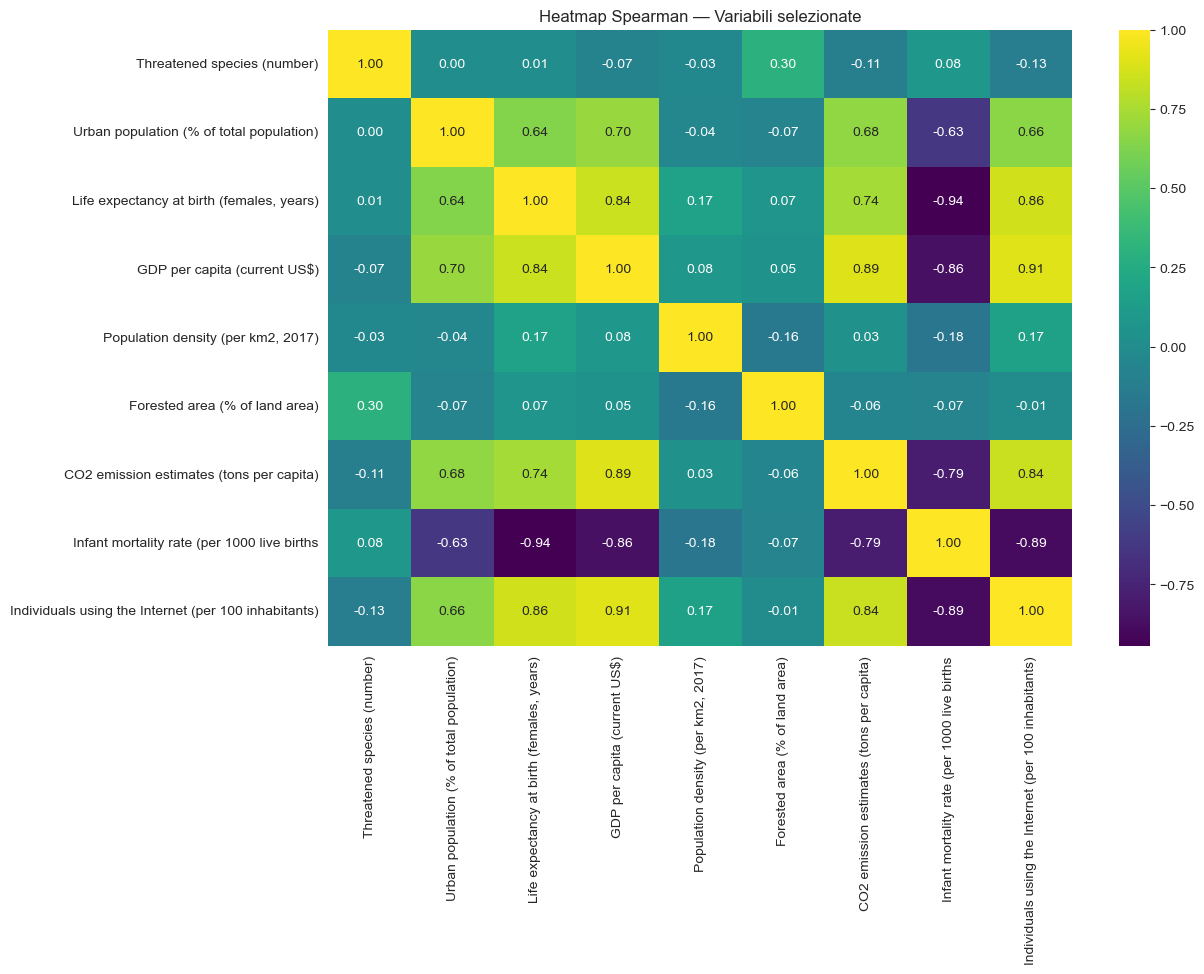

In [29]:
# =============================================================
# ANALISI MULTIVARIATA — Variabili selezionate
# Scatter Matrix (simmetrica) + Pearson + Spearman + Heatmap
# =============================================================

# Liste originali fornite
relazioni_num_num = [
    ("CO2 emission estimates (tons per capita)", "GDP per capita (current US$)"),
    ("Individuals using the Internet (per 100 inhabitants)", "GDP per capita (current US$)"),
    ("Life expectancy at birth (females, years)", "GDP per capita (current US$)"),
    ("Infant mortality rate (per 1000 live births", "Life expectancy at birth (females, years)"),
    ("Forested area (% of land area)", "CO2 emission estimates (tons per capita)"),
    ("Population density (per km2, 2017)", "Urban population (% of total population)"),
    ("Threatened species (number)", "Forested area (% of land area)")
]

variabili_regione = [
    "GDP per capita (current US$)",
    "Individuals using the Internet (per 100 inhabitants)",
    "CO2 emission estimates (tons per capita)",
    "Forested area (% of land area)",
    "Life expectancy at birth (females, years)",
    "Infant mortality rate (per 1000 live births",
    "Threatened species (number)"
]


# -------------------------------------------------------------
# 1. Costruzione lista unica di variabili numeriche
# -------------------------------------------------------------
colonne_relazioni = {col for coppia in relazioni_num_num for col in coppia}
colonne_finali = list(colonne_relazioni.union(variabili_regione))

print("Colonne incluse nell'analisi:")
for c in colonne_finali:
    print(" -", c)

df_sel = df[colonne_finali].dropna()


# -------------------------------------------------------------
# 2. SCATTER MATRIX (Pairplot SIMMETRICA)
# -------------------------------------------------------------
sns.pairplot(df_sel, diag_kind="kde")   
plt.suptitle("Scatter Matrix — Variabili Selezionate (Simmetrica)", y=1.02)
plt.show()


# -------------------------------------------------------------
# 3. Correlazione Pearson
# -------------------------------------------------------------
pearson_corr = df_sel.corr(method="pearson")
print("\n=== MATRICE DI CORRELAZIONE — PEARSON ===")
print(pearson_corr, "\n")


# -------------------------------------------------------------
# 4. Correlazione Spearman
# -------------------------------------------------------------
spearman_corr = df_sel.corr(method="spearman")
print("\n=== MATRICE DI CORRELAZIONE — SPEARMAN ===")
print(spearman_corr, "\n")


# -------------------------------------------------------------
# 5. Heatmap
# -------------------------------------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Pearson — Variabili selezionate")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(spearman_corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Heatmap Spearman — Variabili selezionate")
plt.show()


1.  **Correlazione Estremamente Forte (Cluster Positivo):** Si espande il "nucleo caldo" (celle giallo intenso, $\rho \ge 0.84$) che ora include l'**Aspettativa di Vita (donne)** insieme a **PIL**, **Internet** ed **Emissioni $\text{CO}_2$**. Questi quattro indicatori formano un blocco monolitico di sviluppo: la crescita economica e tecnologica è inscindibile dal miglioramento della longevità e dall'aumento dell'impatto emissivo.
2.  **Anticorrelazioni Estremamente Forti (Cluster Negativo):** Emerge per la prima volta un'area di "contrasto profondo" (celle viola scuro, $\rho \le -0.79$) dominata dal **Tasso di Mortalità Infantile**. Questa variabile è l'immagine speculare dello sviluppo: presenta un legame inverso quasi perfetto con l'aspettativa di vita ($\rho = -0.94$) e fortissimo con Internet e PIL, crollando drasticamente al migliorare delle condizioni socio-economiche.
3.  **Correlazioni Moderate:** La **Popolazione Urbana** conferma il suo ruolo di indicatore di supporto (verde chiaro, $\rho \approx 0.64 - 0.70$), legandosi positivamente sia alla ricchezza che alla salute, ma con una connessione meno rigida rispetto agli indicatori primari del "nucleo caldo".
4.  **Correlazioni Trascurabili:** Le variabili **Area Forestale**, **Densità di Popolazione** e **Specie Minacciate** rimangono "isole" statistiche (colori verde scuro/blu petrolio), mostrando coefficienti vicini allo zero. Si conferma che la densità demografica e la biodiversità (specie minacciate) sono dinamiche indipendenti dal livello di ricchezza, salute o digitalizzazione di un paese.

<a id="inferenza-statistica"></a>

# Inferenza Statistica

In questa fase eseguiamo un **one-sample t-test** sulla variabile **“CO2 emission estimates (tons per capita)”** per verificare se la media delle emissioni pro capite nei Paesi del dataset sia statisticamente diversa da un valore ipotizzato $ \mu_0 = 6 $ tonnellate).

Il test confronta la **media osservata** con la **media ipotizzata**, formulando le ipotesi:

* $ H_0 $: la media delle emissioni è uguale a 6 tonnellate
* $ H_1 $: la media delle emissioni è diversa da 6 tonnellate (test a due code)

Il risultato fornisce il **t-statistic** e il **p-value**, che permettono di determinare se rifiutare o meno l’ipotesi nulla a un livello di significatività prefissato ($ \alpha = 0.05 $).


<a id="test-sulla-media"></a>

## Test sulla media

In [30]:
import pandas as pd
from scipy.stats import ttest_1samp

# ================================
# 1. Variabile di interesse
# ================================
co2 = df["CO2 emission estimates (tons per capita)"].dropna()

# ================================
# 2. One-sample t-test
#    Domanda: la media è diversa da 5 tonnellate?
# ================================

mu0 = 6  # media ipotizzata

# Ipotesi:
# H0: μ = 5
# H1: μ ≠ 5   (test a due code)

t_stat, p_value = ttest_1samp(co2, popmean=mu0)

# Calcolo media osservata
mean_value = co2.mean()

# ================================
# 3. Stampa dei risultati
# ================================
print("=== One-Sample t-test sulle emissioni di CO₂ pro capite ===")
print(f"Media osservata: {mean_value:.3f}")
print(f"Media ipotizzata (H0): {mu0}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# ================================
# 4. Interpretazione automatica
# ================================
alpha = 0.05

print("\n=== Interpretazione ===")
print("H0: la media delle emissioni di CO₂ pro capite è uguale a 6 tonnellate.")
print("H1: la media delle emissioni di CO₂ pro capite è diversa da 6 tonnellate.\n")

if p_value < alpha:
    print(f"Poiché p-value = {p_value:.6f} < {alpha}, RIFIUTIAMO H0.")
    print("La media delle emissioni di CO₂ pro capite è statisticamente diversa da 6 tonnellate.")
else:
    print(f"Poiché p-value = {p_value:.6f} ≥ {alpha}, NON possiamo rifiutare H0.")
    print("Non abbiamo prove sufficienti per affermare che la media sia diversa da 6 tonnellate.")

=== One-Sample t-test sulle emissioni di CO₂ pro capite ===
Media osservata: 4.981
Media ipotizzata (H0): 6
T-statistic: -2.3983
P-value: 0.017324

=== Interpretazione ===
H0: la media delle emissioni di CO₂ pro capite è uguale a 6 tonnellate.
H1: la media delle emissioni di CO₂ pro capite è diversa da 6 tonnellate.

Poiché p-value = 0.017324 < 0.05, RIFIUTIAMO H0.
La media delle emissioni di CO₂ pro capite è statisticamente diversa da 6 tonnellate.


Dal one-sample t-test risulta che la media osservata delle emissioni di CO₂ pro capite (4,981 tonnellate) è statisticamente diversa dal valore ipotizzato di 6 tonnellate, poiché il p-value (0,017) è inferiore al livello di significatività 0,05.


In questa fase proseguiamo con i **test sulla media**, concentrandoci su ipotesi direzionali per determinare se la media delle emissioni di CO₂ pro capite sia **maggiore o minore di 6 tonnellate**. A differenza del test a due code precedente, qui utilizziamo un **one-tailed test** per valutare specificamente la direzione della differenza rispetto al valore ipotizzato, ottenendo così informazioni più mirate sulle tendenze della variabile.


In [31]:
co2 = df["CO2 emission estimates (tons per capita)"].dropna()

mu0 = 6

t_stat, p_two_sided = ttest_1samp(co2, popmean=mu0)
p_one_sided = p_two_sided / 2 if t_stat > 0 else 1 - (p_two_sided / 2)

print("=== One-sample t-test (media > 6) ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value (one-sided): {p_one_sided:.6f}")

mean_val = co2.mean()
print(f"Media osservata: {mean_val:.3f}")

print("\nInterpretazione:")
if p_one_sided < 0.05:
    print("Rifiutiamo H0: la media è significativamente maggiore di 6 tonnellate.")
else:
    print("Non possiamo rifiutare H0: non ci sono prove che la media sia > 6.")

=== One-sample t-test (media > 6) ===
T-statistic: -2.3983
P-value (one-sided): 0.991338
Media osservata: 4.981

Interpretazione:
Non possiamo rifiutare H0: non ci sono prove che la media sia > 6.


Il test unilaterale per verificare se la media delle emissioni di CO₂ pro capite fosse **maggiore di 6 tonnellate** produce un **t-statistic di -2,3983** e un **p-value di 0,991**, con una **media osservata di 4,981 tonnellate**.

Poiché il p-value è molto maggiore del livello di significatività (0,05), **non possiamo rifiutare l’ipotesi nulla**. In altre parole, non ci sono evidenze statistiche a supporto dell’ipotesi che la media sia maggiore di 6 tonnellate.


In [32]:
co2 = df["CO2 emission estimates (tons per capita)"].dropna()

mu0 = 6

t_stat, p_two_sided = ttest_1samp(co2, popmean=mu0)
p_one_sided = p_two_sided / 2 if t_stat < 0 else 1 - (p_two_sided / 2)

print("=== One-sample t-test (media < 6) ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value (one-sided): {p_one_sided:.6f}")

mean_val = co2.mean()
print(f"Media osservata: {mean_val:.3f}")

print("\nInterpretazione:")
if p_one_sided < 0.05:
    print("Rifiutiamo H0: la media è significativamente minore di 6 tonnellate.")
else:
    print("Non possiamo rifiutare H0: non ci sono prove che la media sia < 6.")

=== One-sample t-test (media < 6) ===
T-statistic: -2.3983
P-value (one-sided): 0.008662
Media osservata: 4.981

Interpretazione:
Rifiutiamo H0: la media è significativamente minore di 6 tonnellate.


Il test unilaterale per verificare se la media delle emissioni di CO₂ pro capite fosse **minore di 6 tonnellate** produce un **t-statistic di -2,3983** e un **p-value di 0,00866**, con una **media osservata di 4,981 tonnellate**.

Poiché il p-value è inferiore al livello di significatività (0,05), **rifiutiamo l’ipotesi nulla**. Ciò significa che la media delle emissioni è **statisticamente inferiore a 6 tonnellate**, confermando che il valore osservato è significativamente più basso rispetto alla soglia ipotizzata.

<a id="intervalli-di-confidenza"></a>

## Intervalli di confidenza

In questa fase stimiamo **intervalli di confidenza per la media** della densità di popolazione utilizzando due approcci: un **t-Student su sottocampione** e un **bootstrap sull’intero dataset**. Entrambi forniscono stime della media e della sua variabilità, mentre l’analisi opzionale per regione permette di confrontare le densità tra gruppi geografici. La distribuzione bootstrap è visualizzata per interpretare graficamente l’incertezza della stima.


=== Intervallo t-Student (subsample) ===
Variabile: Population density (per km2, 2017)
n (subsample) = 100
Media campionaria (subsample) = 333.1480
Std (ddof=1, subsample) = 1126.1941
SE = 112.6194
t critico (two-sided, 95%): 1.9842
IC 95% (t-Student): [109.6867, 556.6093]

=== Intervallo Bootstrap (percentile) ===
Numero di iterazioni bootstrap = 1000000
Media (bootstrap) = 460.8971
IC 95% (bootstrap percentile): [213.6182, 797.4826]



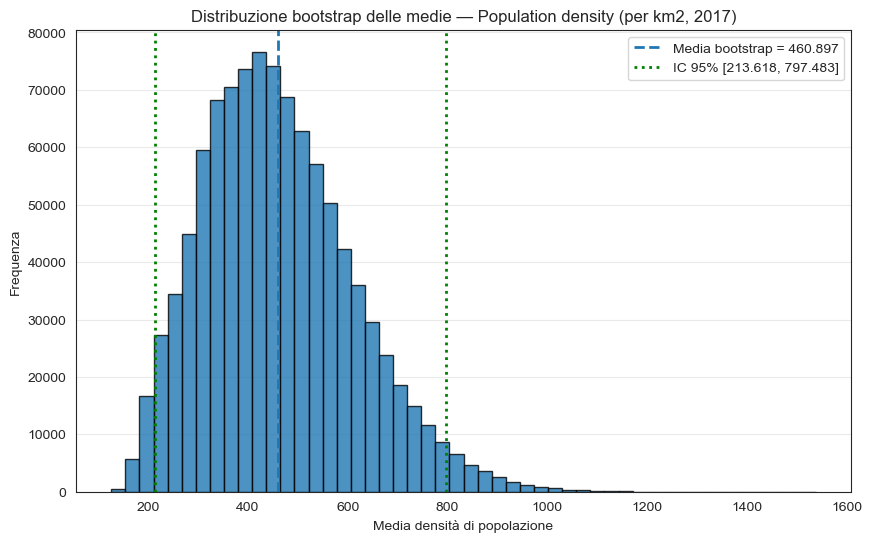

=== IC per Region (t-Student su sottocampione o su intero group se piccoli) ===
SouthernAsia: n=9, mean=454.233, IC 95% = [43.406, 865.061]
SouthernEurope: n=16, mean=525.119, IC 95% = [28.094, 1022.144]
NorthernAfrica: n=7, mean=42.614, IC 95% = [5.506, 79.723]
Polynesia: n=9, mean=137.856, IC 95% = [48.501, 227.211]
MiddleAfrica: n=9, mean=45.700, IC 95% = [-4.024, 95.424]
Caribbean: n=25, mean=292.224, IC 95% = [192.907, 391.541]
SouthAmerica: n=14, mean=21.164, IC 95% = [10.526, 31.802]
WesternAsia: n=18, mean=290.200, IC 95% = [57.674, 522.726]
Oceania: n=2, mean=10.550, IC 95% = [-82.841, 103.941]
WesternEurope: n=9, mean=3109.956, IC 95% = [-3480.088, 9699.999]
EasternEurope: n=10, mean=88.870, IC 95% = [59.977, 117.763]
CentralAmerica: n=8, mean=104.263, IC 95% = [27.409, 181.116]
WesternAfrica: n=17, mean=86.447, IC 95% = [54.073, 118.821]
NorthernAmerica: n=5, mean=258.820, IC 95% = [-413.465, 931.105]
SouthernAfrica: n=5, mean=41.400, IC 95% = [-4.151, 86.951]
South-easternA

In [33]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.utils import resample
import matplotlib.pyplot as plt

# ================================
# Configurazione
# ================================
col = "Population density (per km2, 2017)"
n_subsample = 100         # dimensione del sotto-campione per il t-Student
confidence = 0.95
n_bootstrap = 1000000       # iterazioni bootstrap (buon compromesso)

# Estrai la serie pulita (dropna)
density = df[col].dropna().astype(float)

if len(density) == 0:
    raise ValueError(f"La colonna '{col}' non contiene valori validi dopo dropna.")

# ================================
# 1) Intervallo t-Student su subsample
# ================================
# Preleviamo un subsample casuale (replicabile con random_state)
if len(density) < n_subsample:
    print(f"Attenzione: il dataset contiene solo {len(density)} osservazioni non-NA; userò tutto il campione.")
    sub = density.copy().values
else:
    sub = density.sample(n=n_subsample, random_state=42).values

n = len(sub)
mean_sub = np.mean(sub)
std_sub = np.std(sub, ddof=1)   # stima campionaria
se_sub = std_sub / np.sqrt(n)
df_freedom = n - 1
alpha = 1 - confidence

t_critical = stats.t.ppf(1 - alpha/2, df_freedom)
margin_error = t_critical * se_sub
ci_lower_t = mean_sub - margin_error
ci_upper_t = mean_sub + margin_error

print("=== Intervallo t-Student (subsample) ===")
print(f"Variabile: {col}")
print(f"n (subsample) = {n}")
print(f"Media campionaria (subsample) = {mean_sub:.4f}")
print(f"Std (ddof=1, subsample) = {std_sub:.4f}")
print(f"SE = {se_sub:.4f}")
print(f"t critico (two-sided, {confidence*100:.0f}%): {t_critical:.4f}")
print(f"IC {confidence*100:.0f}% (t-Student): [{ci_lower_t:.4f}, {ci_upper_t:.4f}]\n")

# ================================
# 2) Intervallo Bootstrap (percentile) sull'intero sample disponibile
# ================================
target = density.values
bootstrap_means = np.empty(n_bootstrap)

rng = np.random.default_rng(123)  # generatore per riproducibilità
for i in range(n_bootstrap):
    boot = rng.choice(target, size=len(target), replace=True)
    bootstrap_means[i] = boot.mean()

mean_boot = bootstrap_means.mean()
ci_lower_boot = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
ci_upper_boot = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)

print("=== Intervallo Bootstrap (percentile) ===")
print(f"Numero di iterazioni bootstrap = {n_bootstrap}")
print(f"Media (bootstrap) = {mean_boot:.4f}")
print(f"IC {confidence*100:.0f}% (bootstrap percentile): [{ci_lower_boot:.4f}, {ci_upper_boot:.4f}]\n")

# ================================
# 3) Grafico distribuzione bootstrap
# ================================
plt.figure(figsize=(10,6))
plt.hist(bootstrap_means, bins=50, alpha=0.8, edgecolor='black')
plt.axvline(mean_boot, linestyle='--', linewidth=2, label=f"Media bootstrap = {mean_boot:.3f}")
plt.axvline(ci_lower_boot, color='green', linestyle=':', linewidth=2, label=f"IC {confidence*100:.0f}% [{ci_lower_boot:.3f}, {ci_upper_boot:.3f}]")
plt.axvline(ci_upper_boot, color='green', linestyle=':', linewidth=2)
plt.title(f"Distribuzione bootstrap delle medie — {col}")
plt.xlabel("Media densità di popolazione")
plt.ylabel("Frequenza")
plt.legend()
plt.grid(axis='y', alpha=0.4)
plt.show()

# ================================
# 4) Intervalli per ogni Region (ANALISI GROUP-WISE)
# ================================
if "Region" in df.columns:
    print("=== IC per Region (t-Student su sottocampione o su intero group se piccoli) ===")
    regions = df["Region"].dropna().unique()
    for r in regions:
        group_vals = df.loc[df["Region"] == r, col].dropna().astype(float)
        if len(group_vals) < 2:
            print(f"{r}: poche osservazioni ({len(group_vals)}), salto.")
            continue
        # useremo t-CI sul gruppo intero (non subsample) se n>=2
        m = group_vals.mean()
        s = group_vals.std(ddof=1)
        se = s / np.sqrt(len(group_vals))
        df_g = len(group_vals) - 1
        t_c = stats.t.ppf(1 - alpha/2, df_g)
        me = t_c * se
        print(f"{r}: n={len(group_vals)}, mean={m:.3f}, IC {confidence*100:.0f}% = [{m-me:.3f}, {m+me:.3f}]")
else:
    print("Colonna 'Region' non presente: salto analisi group-wise.")

Il grafico dimostra l'**alta instabilità** della media aritmetica per la densità di popolazione.

* **Media Stimata:** $\approx 461$ persone/$\text{km}^2$.
* **Incertezza Estrema:** L'Intervallo di Confidenza al 95% è vastissimo (**213 — 797**). Un range così ampio indica che la stima della media è **poco precisa**.
* **Asimmetria:** La curva non è simmetrica ma ha una coda verso destra. Ciò conferma che la media è "tirata" verso l'alto da pochi paesi con densità eccezionali (outlier), rendendola un indicatore poco rappresentativo.

--- Intervallo di Confidenza (Bootstrap) al 95.0% per CO2 emissions ---
Media (Bootstrap): 5.0276
Intervallo di Confidenza: [4.2341, 5.9014]


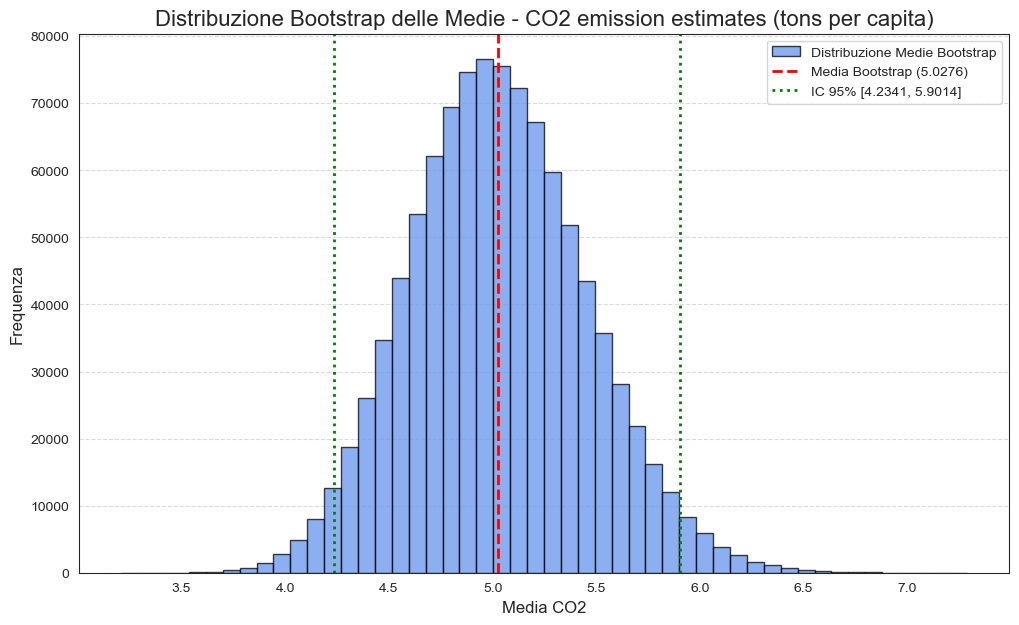

In [34]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Selezioniamo la colonna target (sostituiamo eventuali zeri con NaN e li rimuoviamo)
target_column = df['CO2 emission estimates (tons per capita)'].replace(0, np.nan).dropna()

# Numero di campioni bootstrap
n_iterations = 1000000
bootstrap_means = []

for i in range(n_iterations):
    boot_sample = resample(target_column, replace=True, n_samples=len(target_column))
    boot_mean = np.mean(boot_sample)
    bootstrap_means.append(boot_mean)

# Calcolo dell'intervallo di confidenza al 95%
confidence = 95.0
lower_p = (100 - confidence) / 2.0
upper_p = confidence + lower_p

ci_lower_boot = np.percentile(bootstrap_means, lower_p)
ci_upper_boot = np.percentile(bootstrap_means, upper_p)

print(f"--- Intervallo di Confidenza (Bootstrap) al {confidence}% per CO2 emissions ---")
print(f"Media (Bootstrap): {np.mean(bootstrap_means):.4f}")
print(f"Intervallo di Confidenza: [{ci_lower_boot:.4f}, {ci_upper_boot:.4f}]")
# Creiamo la figura
plt.figure(figsize=(12, 7))

# Media bootstrap
mean_boot = np.mean(bootstrap_means)

# Istogramma delle medie
plt.hist(bootstrap_means, bins=50, alpha=0.75,
         label='Distribuzione Medie Bootstrap',
         color='cornflowerblue', edgecolor='black')

# Linea della media
plt.axvline(mean_boot, color='red', linestyle='--', linewidth=2,
            label=f'Media Bootstrap ({mean_boot:.4f})')

# Linee dell'intervallo di confidenza
plt.axvline(ci_lower_boot, color='green', linestyle=':', linewidth=2,
            label=f'IC 95% [{ci_lower_boot:.4f}, {ci_upper_boot:.4f}]')
plt.axvline(ci_upper_boot, color='green', linestyle=':', linewidth=2)

# Titoli e labels
plt.title('Distribuzione Bootstrap delle Medie - CO2 emission estimates (tons per capita)', fontsize=16)
plt.xlabel('Media CO2', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


Stiamo eseguendo una **simulazione Bootstrap** con **1 milione di iterazioni** per verificare l'affidabilità statistica della media delle emissioni.

Il codice estrae casualmente nuovi campioni dai dati originali (con ripetizione) e ne calcola la media un milione di volte.

**Risultato (Grafico):**

* **Media Solida:** La media stimata è **5.028** tonnellate pro capite.
* **Buona Precisione:** L'Intervallo di Confidenza al 95% è **[4.23, 5.91]**. A differenza della densità di popolazione, qui l'intervallo è contenuto, indicando una stima affidabile.
* **Normalità:** La distribuzione delle medie forma una perfetta **curva a campana**, confermando che la media è uno stimatore statistico valido per questa variabile.

Possiamo affermare con certezza che la media globale reale si trova tra **4.2** e **5.9**.

# Seconda Parte 

L’obiettivo del secondo assignment è ampliare l’analisi iniziata nella prima prova, passando dall’esplorazione dei dati alla loro modellazione. Usando lo stesso dataset, gli studenti devono:

- **Spiegare (approccio statistico)**: applicare modelli di regressione per quantificare le relazioni tra variabili e verificare ipotesi, così da capire l’effetto dei diversi fattori.

- **Predire (approccio machine learning)**: costruire modelli predittivi capaci di stimare valori futuri o classificare nuove osservazioni, con utilità pratica.


<a id="analisi-statistica"></a>
# Analisi Statistica e Regressione

Il nostro obiettivo è individuare una o più variabili dipendenti e un insieme di variabili indipendenti (o predittori) per effettuare un’analisi di regressione lineare.


                                           OLS Regression Results                                           
Dep. Variable:     Q("Infant mortality rate (per 1000 live births")   R-squared:                       0.901
Model:                                                          OLS   Adj. R-squared:                  0.901
Method:                                               Least Squares   F-statistic:                     1851.
Date:                                              Tue, 20 Jan 2026   Prob (F-statistic):          5.70e-104
Time:                                                      11:50:55   Log-Likelihood:                -698.10
No. Observations:                                               205   AIC:                             1400.
Df Residuals:                                                   203   BIC:                             1407.
Df Model:                                                         1                                         
Covariance Type:   

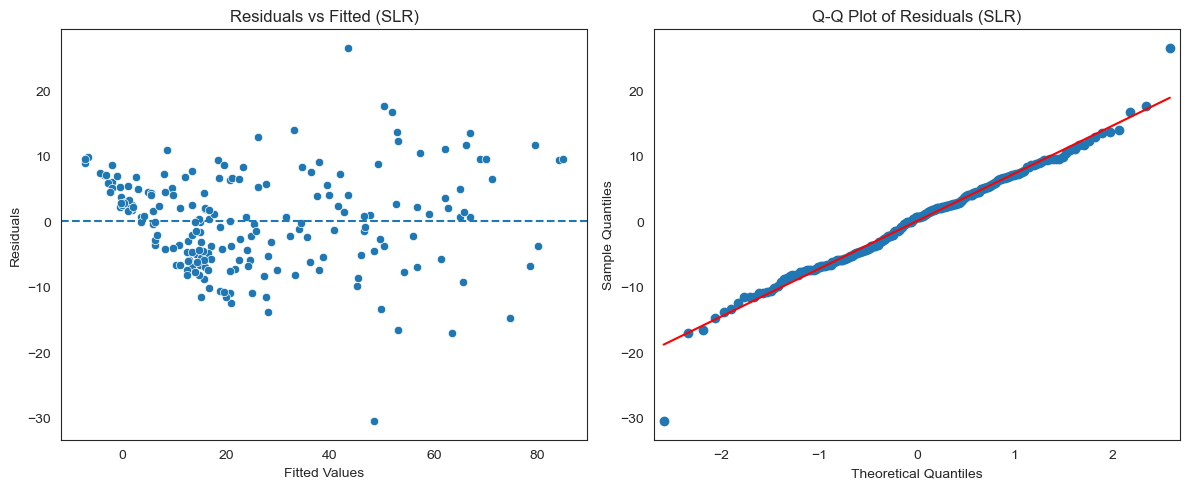

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- SLR: Infant Mortality ~ Life Expectancy ---
formula = 'Q("Infant mortality rate (per 1000 live births") ~ Q("Life expectancy at birth (females, years)")'

model_slr = smf.ols(formula, data=df).fit()

print(model_slr.summary())

fitted_values_slr = model_slr.fittedvalues
residuals_slr = model_slr.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs Fitted
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values_slr, y=residuals_slr, ax=ax1)
ax1.axhline(0, linestyle='--')
ax1.set_title('Residuals vs Fitted (SLR)')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals_slr, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals (SLR)')

plt.tight_layout()
plt.show()

<a id="selezione-delle-variabili"></a>
## Selezione delle Variabili

Sulla base dell’analisi esplorativa, il tasso di mortalità infantile è stato selezionato come variabile dipendente in quanto rappresenta un indicatore sintetico e ampiamente riconosciuto delle condizioni sanitarie e socio-economiche di un Paese. Le variabili indipendenti sono state scelte per catturare diverse dimensioni dello sviluppo: l’aspettativa di vita femminile come indicatore dello stato di salute e dell’efficienza del sistema sanitario, l’utilizzo di Internet come proxy di istruzione e modernizzazione, il PIL pro capite come misura della capacità economica, le emissioni di CO₂ come indicatore del livello di industrializzazione e delle condizioni ambientali, e la percentuale di popolazione urbana come fattore demografico e infrastrutturale. Tale selezione è teoricamente coerente e consente di analizzare l’effetto congiunto di fattori strutturali rilevanti sulla mortalità infantile tramite un modello di regressione lineare multipla.


<a id="regressione-lineare"></a>
## Regressione Lineare

Il codice definisce e stima un modello di regressione lineare multipla utilizzando la sintassi a formula di `statsmodels`. La formula specifica il tasso di mortalità infantile come variabile dipendente e un insieme di indicatori sanitari, economici, tecnologici, ambientali e demografici come variabili indipendenti; la funzione `Q()` consente di gestire nomi di variabili contenenti spazi o caratteri speciali. Il modello viene stimato tramite il metodo dei minimi quadrati ordinari (OLS) sui dati del DataFrame `df`, e il comando `summary()` restituisce un riepilogo delle stime dei coefficienti e delle principali statistiche di valutazione del modello.


In [36]:
formula_mlr = '''
Q("Infant mortality rate (per 1000 live births") ~ 
Q("Life expectancy at birth (females, years)") +
Q("Individuals using the Internet (per 100 inhabitants)") +
Q("GDP per capita (current US$)") +
Q("CO2 emission estimates (tons per capita)") +
Q("Urban population (% of total population)")
'''

model_mlr = smf.ols(formula_mlr, data=df).fit()

print(model_mlr.summary())


                                           OLS Regression Results                                           
Dep. Variable:     Q("Infant mortality rate (per 1000 live births")   R-squared:                       0.918
Model:                                                          OLS   Adj. R-squared:                  0.916
Method:                                               Least Squares   F-statistic:                     414.1
Date:                                              Tue, 20 Jan 2026   Prob (F-statistic):           2.07e-98
Time:                                                      11:50:55   Log-Likelihood:                -635.39
No. Observations:                                               191   AIC:                             1283.
Df Residuals:                                                   185   BIC:                             1302.
Df Model:                                                         5                                         
Covariance Type:   

In [37]:
formula_mlr = '''
Q("Infant mortality rate (per 1000 live births") ~ 
Q("Life expectancy at birth (females, years)") +
Q("Individuals using the Internet (per 100 inhabitants)") +
Q("GDP per capita (current US$)") +
Q("CO2 emission estimates (tons per capita)")
'''

model_mlr = smf.ols(formula_mlr, data=df).fit()
print(model_mlr.summary())


                                           OLS Regression Results                                           
Dep. Variable:     Q("Infant mortality rate (per 1000 live births")   R-squared:                       0.918
Model:                                                          OLS   Adj. R-squared:                  0.916
Method:                                               Least Squares   F-statistic:                     519.9
Date:                                              Tue, 20 Jan 2026   Prob (F-statistic):          9.24e-100
Time:                                                      11:50:55   Log-Likelihood:                -635.47
No. Observations:                                               191   AIC:                             1281.
Df Residuals:                                                   186   BIC:                             1297.
Df Model:                                                         4                                         
Covariance Type:   

## Interpretabilità dei coefficienti

Un Paese con **aspettativa di vita femminile pari a zero**, **zero individui che utilizzano Internet**, **PIL pro capite nullo** ed **emissioni di CO₂ nulle** avrebbe un tasso di **mortalità infantile pari a 204 decessi per 1000 nati vivi**. Questo valore rappresenta l’intercetta del modello e non ha un’interpretazione reale, ma costituisce il punto di riferimento per gli effetti marginali delle altre variabili.

Un incremento di **un anno nell’aspettativa di vita alla nascita delle donne** è associato a una **riduzione della mortalità infantile di circa 2,34 decessi per 1000 nati vivi**, a parità di tutte le altre variabili. Questo risultato è coerente con l’idea che migliori condizioni sanitarie e sociali riducano la probabilità di mortalità nei primi anni di vita.

Un incremento di **un punto percentuale nella quota di individui che utilizzano Internet** è associato a una **riduzione della mortalità infantile di circa 0,16 per 1000 nati vivi**, mantenendo costanti le altre variabili. Ciò suggerisce che una maggiore diffusione delle tecnologie dell’informazione, come proxy dello sviluppo e dell’accesso ai servizi, contribuisca a migliori esiti sanitari.

Un incremento di **un dollaro nel PIL pro capite** è associato a un **aumento di circa 0,0002 decessi infantili per 1000 nati vivi**, a parità delle altre condizioni. Sebbene l’effetto sia statisticamente significativo, la sua entità è estremamente ridotta e quindi di scarsa rilevanza pratica.

Un incremento di **una tonnellata di emissioni di CO₂ pro capite** è associato a una **riduzione della mortalità infantile di circa 0,23 per 1000 nati vivi**, mantenendo costanti le altre variabili. Anche in questo caso, l’effetto va interpretato come indiretto, poiché le emissioni di CO₂ fungono verosimilmente da indicatore del livello di industrializzazione e sviluppo economico piuttosto che da fattore causale diretto.


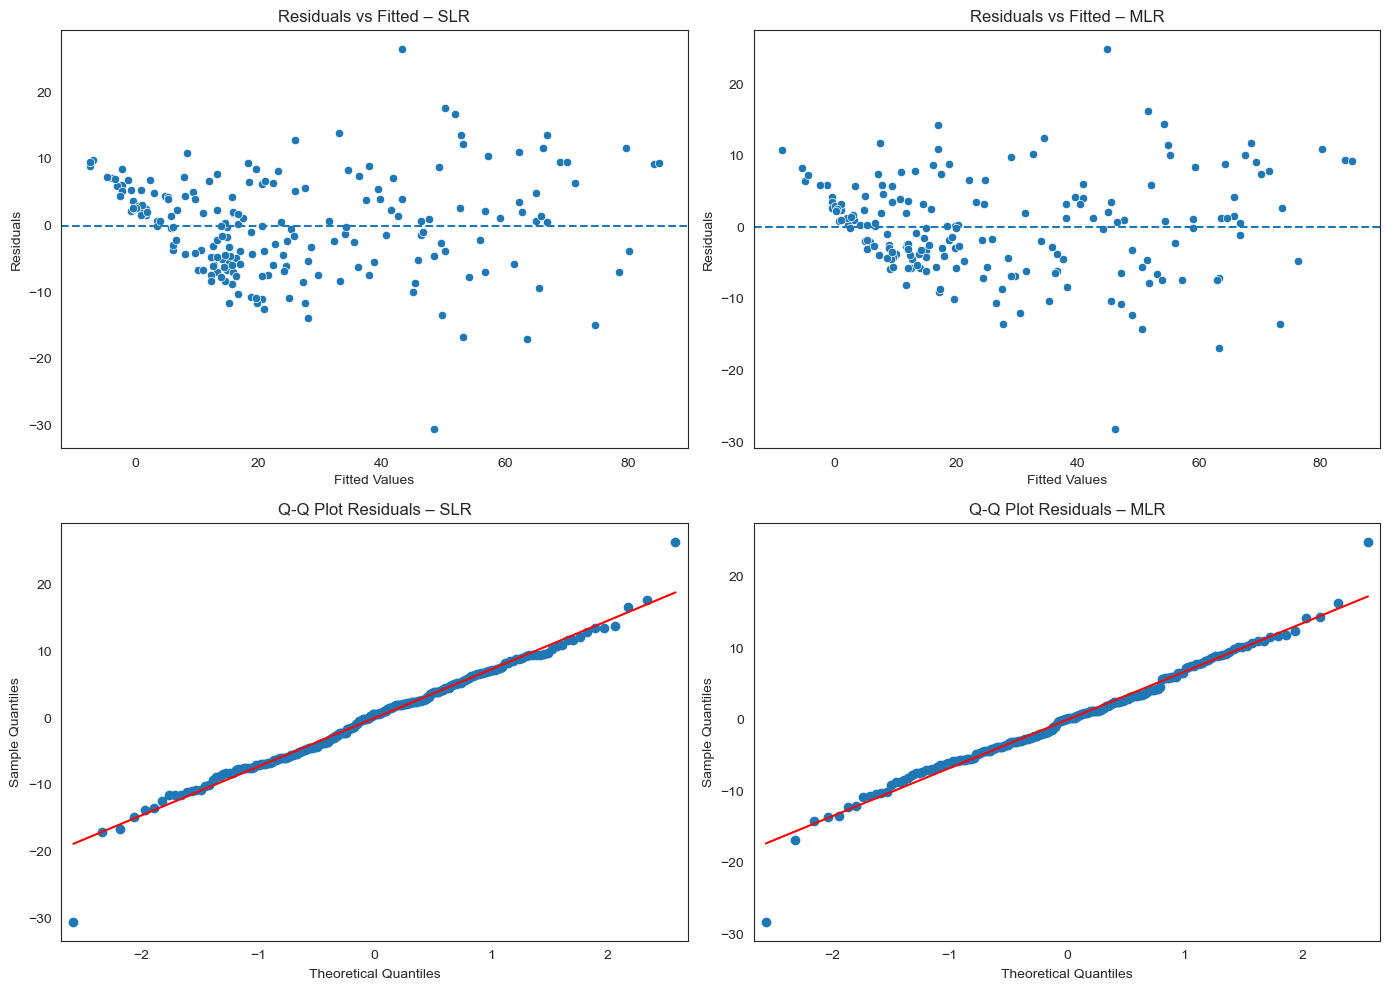

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Values and Residuals ---
fitted_slr = model_slr.fittedvalues
resid_slr = model_slr.resid

fitted_mlr = model_mlr.fittedvalues
resid_mlr = model_mlr.resid

# --- Plot: SLR vs MLR ---
plt.figure(figsize=(14, 10))

# 1. Residuals vs Fitted – SLR
ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(x=fitted_slr, y=resid_slr, ax=ax1)
ax1.axhline(0, linestyle='--')
ax1.set_title("Residuals vs Fitted – SLR")
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")

# 2. Residuals vs Fitted – MLR
ax2 = plt.subplot(2, 2, 2)
sns.scatterplot(x=fitted_mlr, y=resid_mlr, ax=ax2)
ax2.axhline(0, linestyle='--')
ax2.set_title("Residuals vs Fitted – MLR")
ax2.set_xlabel("Fitted Values")
ax2.set_ylabel("Residuals")

# 3. Q-Q Plot – SLR
ax3 = plt.subplot(2, 2, 3)
sm.qqplot(resid_slr, line='s', ax=ax3)
ax3.set_title("Q-Q Plot Residuals – SLR")

# 4. Q-Q Plot – MLR
ax4 = plt.subplot(2, 2, 4)
sm.qqplot(resid_mlr, line='s', ax=ax4)
ax4.set_title("Q-Q Plot Residuals – MLR")

plt.tight_layout()
plt.show()


I grafici indicano che entrambi i modelli (SLR e MLR) sono inadeguati a causa di una evidente **non-linearità**: i residui mostrano infatti un pattern a forma di "U" che suggerisce la necessità di inserire termini quadratici o trasformazioni delle variabili. La distribuzione non è ottimale anche per la presenza di **outlier** visibili nelle code dei Q-Q plot, e il fatto che il modello multiplo non migliori sensibilmente questi difetti rispetto a quello semplice conferma che il problema è strutturale. In sintesi, la relazione tra le variabili non è puramente lineare e il modello attuale fallisce nel catturare la curvatura dei dati.

<a id="regressione-logistica"></a>
## Regressione Logistica

Il codice trasforma il PIL pro capite in una variabile binaria (`rich_country`) che indica se un Paese è ricco o meno rispetto alla mediana, impostando così un problema di classificazione. Successivamente seleziona un insieme di variabili socio-economiche, sanitarie ed educative come predittori, elimina le osservazioni con valori mancanti e costruisce automaticamente la formula del modello utilizzando `Q()` per gestire nomi di variabili complessi. Infine, stima un modello di regressione logistica tramite `logit` e ne stampa il riepilogo dei risultati.


In [39]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# threshold = mediana
thr = df["GDP per capita (current US$)"].median()
df["rich_country"] = (df["GDP per capita (current US$)"] >= thr).astype(int)

In [40]:
best_predictors = [
    "Urban population (% of total population)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Mobile-cellular subscriptions (per 100 inhabitants)",
    "Pop. using improved drinking water (urban, %)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Health: Total expenditure (% of GDP)",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Education: Secondary gross enrol. ratio (male per 100 pop.)",
    "Economy: Industry (% of GVA)",
    "Population age distribution (60+ years, %)"
]


In [41]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.132338
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  154
Model:                          Logit   Df Residuals:                      141
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.8082
Time:                        11:50:55   Log-Likelihood:                -20.380
converged:                       True   LL-Null:                       -106.28
Covariance Type:            nonrobust   LLR p-value:                 2.051e-30
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [42]:
best_predictors = [
    "Urban population (% of total population)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved drinking water (urban, %)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Health: Total expenditure (% of GDP)",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Education: Secondary gross enrol. ratio (male per 100 pop.)",
    "Economy: Industry (% of GVA)",
    "Population age distribution (60+ years, %)"
]

In [43]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.132345
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  154
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                           11
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.8082
Time:                        11:50:55   Log-Likelihood:                -20.381
converged:                       True   LL-Null:                       -106.28
Covariance Type:            nonrobust   LLR p-value:                 5.049e-31
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [44]:
best_predictors = [
    "Urban population (% of total population)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Health: Total expenditure (% of GDP)",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Education: Secondary gross enrol. ratio (male per 100 pop.)",
    "Economy: Industry (% of GVA)",
    "Population age distribution (60+ years, %)"
]

In [45]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.133969
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  154
Model:                          Logit   Df Residuals:                      143
Method:                           MLE   Df Model:                           10
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.8059
Time:                        11:50:55   Log-Likelihood:                -20.631
converged:                       True   LL-Null:                       -106.28
Covariance Type:            nonrobust   LLR p-value:                 1.499e-31
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [46]:
best_predictors = [
    "Urban population (% of total population)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Health: Total expenditure (% of GDP)",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Education: Secondary gross enrol. ratio (male per 100 pop.)",
    "Population age distribution (60+ years, %)"
]

In [47]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.160611
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  155
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            9
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.7671
Time:                        11:50:55   Log-Likelihood:                -24.895
converged:                       True   LL-Null:                       -106.89
Covariance Type:            nonrobust   LLR p-value:                 1.097e-30
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [48]:
best_predictors = [
    "Urban population (% of total population)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Health: Total expenditure (% of GDP)",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Population age distribution (60+ years, %)"
]

In [49]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.163499
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  155
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            8
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.7629
Time:                        11:50:55   Log-Likelihood:                -25.342
converged:                       True   LL-Null:                       -106.89
Covariance Type:            nonrobust   LLR p-value:                 3.594e-31
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [50]:
best_predictors = [
    "Urban population (% of total population)",
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Population age distribution (60+ years, %)"
]

In [51]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.168816
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  159
Model:                          Logit   Df Residuals:                      151
Method:                           MLE   Df Model:                            7
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.7553
Time:                        11:50:55   Log-Likelihood:                -26.842
converged:                       True   LL-Null:                       -109.68
Covariance Type:            nonrobust   LLR p-value:                 2.050e-32
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [52]:
best_predictors = [
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Population age distribution (60+ years, %)"
]

In [53]:
# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.178701
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  159
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.7409
Time:                        11:50:55   Log-Likelihood:                -28.413
converged:                       True   LL-Null:                       -109.68
Covariance Type:            nonrobust   LLR p-value:                 1.724e-32
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

In [54]:
np.exp(model.params)

Intercept                                                             0.000021
Q("Individuals using the Internet (per 100 inhabitants)")             1.115736
Q("Pop. using improved sanitation facilities (urban, %)")             0.841456
Q("Life expectancy at birth (males, years)")                          1.316411
Q("Infant mortality rate (per 1000 live births")                      0.765901
Q("Education: Secondary gross enrol. ratio (female per 100 pop.)")    1.086007
Q("Population age distribution (60+ years, %)")                       0.829350
dtype: float64

## Interpretazione dei coefficienti


Il modello di regressione logistica stima la probabilità che un Paese sia classificato come **Paese ricco** (*rich_country = 1*). Il valore di **Pseudo R² pari a 0,741** e il **Likelihood Ratio Test altamente significativo** indicano un’eccellente capacità discriminante del modello. Tutti i regressori, ad eccezione dell’intercetta, risultano statisticamente significativi al livello del 5%.

Nel modello logit, i coefficienti rappresentano variazioni nei **log-odds**, mentre i coefficienti esponenziati rappresentano **odds ratio**, che sono più facilmente interpretabili.



Possiamo interpretare le stime nel modo seguente.

Un Paese per il quale tutte le variabili esplicative assumono valore zero avrebbe odds di essere un Paese ricco pari a **0,000021**. Anche in questo caso, l’intercetta non ha un’interpretazione sostantiva, ma funge da riferimento per gli effetti marginali degli altri regressori.

Un incremento di **un punto percentuale nella quota di individui che utilizzano Internet** è associato a un **aumento delle odds di essere un Paese ricco del 11,6%** (odds ratio = 1,116), mantenendo costanti tutte le altre variabili. Ciò suggerisce che una maggiore diffusione delle tecnologie digitali aumenta significativamente la probabilità di appartenere al gruppo dei Paesi economicamente avanzati.

Un incremento di **un punto percentuale nella popolazione urbana con accesso a servizi igienico-sanitari migliorati** è associato a una **riduzione delle odds di essere un Paese ricco di circa il 15,9%** (odds ratio = 0,841), a parità delle altre variabili. Questo effetto apparentemente controintuitivo può essere spiegato da fenomeni di multicollinearità o dal fatto che la variabile catturi specifiche caratteristiche strutturali dei Paesi urbani.

Un incremento di **un anno nell’aspettativa di vita alla nascita degli uomini** è associato a un **aumento delle odds di essere un Paese ricco del 31,6%** (odds ratio = 1,316), mantenendo costanti le altre variabili. Questo risultato è coerente con il ruolo dell’aspettativa di vita come indicatore sintetico di benessere economico e sanitario.

Un incremento di **una unità nel tasso di mortalità infantile** è associato a una **riduzione delle odds di essere un Paese ricco del 23,4%** (odds ratio = 0,766), a parità delle altre condizioni. Ciò conferma che elevati livelli di mortalità infantile sono fortemente associati a condizioni di sottosviluppo economico.

Un incremento di **un punto nel tasso lordo di iscrizione all’istruzione secondaria femminile** è associato a un **aumento delle odds di essere un Paese ricco dell’8,6%** (odds ratio = 1,086), mantenendo costanti le altre variabili. Questo risultato evidenzia il ruolo centrale dell’istruzione, in particolare femminile, nello sviluppo economico.

Un incremento di **un punto percentuale nella quota di popolazione con età pari o superiore a 60 anni** è associato a una **riduzione delle odds di essere un Paese ricco di circa il 17,1%** (odds ratio = 0,829), a parità delle altre variabili. Questo effetto suggerisce che una struttura demografica più anziana, a parità di condizioni, è associata a una minore probabilità di appartenenza al gruppo dei Paesi ricchi.

### Test sull'Italia valori 2020

In [55]:
import pandas as pd
import numpy as np

X_new = pd.DataFrame([{
    'Intercept': 1,
    'Q("Individuals using the Internet (per 100 inhabitants)")': 70.5,
    'Q("Pop. using improved sanitation facilities (urban, %)")': 79.4,
    'Q("Life expectancy at birth (males, years)")': 79.8,
    'Q("Infant mortality rate (per 1000 live births")': 2.9,
    'Q("Education: Secondary gross enrol. ratio (female per 100 pop.)")': 103.0,
    'Q("Population age distribution (60+ years, %)")': 30.0
}])

# Calcola LOGIT come Xβ 
logit_value = X_new.dot(model.params).iloc[0]

# Funzione logistica
prob_value = 1 / (1 + np.exp(-logit_value))

print("=== RISULTATO PREVISIONE ===")
print(f"Logit: {logit_value:.4f}")
print(f"Probabilità di 'paese ricco': {prob_value:.4f}")
print("\nClassificazione:", "RICCO" if prob_value >= 0.5 else "NON RICCO")

=== RISULTATO PREVISIONE ===
Logit: 7.3104
Probabilità di 'paese ricco': 0.9993

Classificazione: RICCO


### Test sul Pakistan valori 2020

In [56]:
import pandas as pd
import numpy as np

X_new2 = pd.DataFrame([{
    'Intercept': 1,
    'Q("Individuals using the Internet (per 100 inhabitants)")': 18.9,
    'Q("Pop. using improved sanitation facilities (urban, %)")': 36.8,
    'Q("Life expectancy at birth (males, years)")': 63.3,
    'Q("Infant mortality rate (per 1000 live births")': 65.2,
    'Q("Education: Secondary gross enrol. ratio (female per 100 pop.)")': 44.7,
    'Q("Population age distribution (60+ years, %)")': 6.3
}])

# Calcolo logit Xβ
logit_value2 = X_new2.dot(model.params).iloc[0]

# Funzione logistica
prob_value2 = 1 / (1 + np.exp(-logit_value2))

print("=== RISULTATO PREVISIONE ===")
print(f"Logit: {logit_value2:.4f}")
print(f"Probabilità di 'paese ricco': {prob_value2:.4f}")
print("\nClassificazione:", "RICCO" if prob_value2 >= 0.5 else "NON RICCO")

=== RISULTATO PREVISIONE ===
Logit: -12.5140
Probabilità di 'paese ricco': 0.0000

Classificazione: NON RICCO


Per valutare la capacità predittiva del modello di regressione logistica, sono stati utilizzati **dati esterni** al campione di stima, ricavati dal database ufficiale delle Nazioni Unite **UNData**, relativi ai **Paesi Italia e Pakistan per l’anno 2020**. Tale procedura consente di testare il modello in uno scenario realistico e di verificarne la coerenza interpretativa.

Inserendo nel modello i valori osservati per l’Italia, il **valore del logit** stimato risulta pari a **7,31**, che corrisponde a una **probabilità di essere classificato come Paese ricco pari a 0,9993**. Sulla base di questa probabilità, il modello assegna correttamente l’Italia alla classe **“Paese ricco”**, in linea con le aspettative economiche e sociali.

Analogamente, utilizzando i dati relativi al Pakistan per il 2020, il modello restituisce un **valore del logit pari a −12,51**, che si traduce in una **probabilità di essere Paese ricco prossima a zero**. Di conseguenza, il Pakistan viene classificato come **“Paese non ricco”**, risultato anch’esso coerente con la realtà economica del Paese.

Nel complesso, questi esempi mostrano come il modello logistico sia in grado di **discriminare efficacemente** tra Paesi ricchi e non ricchi quando applicato a osservazioni reali e fuori campione, fornendo probabilità estreme e classificazioni pienamente coerenti con il contesto socioeconomico osservato.


# Analisi Predittiva e Machine Learning
<a id="analisi_predittiva_e_machine_learning">

In questa sezione l’analisi passa da un approccio esplicativo a uno **predittivo**, con l’obiettivo di costruire modelli di Machine Learning capaci di generalizzare su **dati mai visti**. Dopo la definizione del **problema predittivo** e del suo **valore pratico**, viene descritto il **setup sperimentale**, che include la suddivisione dei dati e le operazioni di preprocessing.

La fase di **modellazione** prevede l’applicazione e il confronto di diversi algoritmi, in particolare **Regressione Lineare**, **Regressione Polinomiale**, **Regressione Logistica**, **Softmax Regression**, **Naive Bayes**, **LDA**, **QDA** e **KNN**, con un’adeguata ricerca degli iperparametri. Infine, i modelli vengono **valutati e confrontati** tramite metriche di performance appropriate, al fine di individuare quello con le migliori capacità predittive e di generalizzazione.


<a id="regressione-lineare-ml"></a>

## Regressione Lineare

L’obiettivo è stimare il **PIL pro capite** di un Paese a partire da indicatori socio-economici e ambientali come uso di Internet, emissioni di CO₂, energia disponibile, aspettativa di vita, urbanizzazione e diffusione di telefonia mobile.

**Scenario applicativo:** il modello può supportare policy maker o organismi internazionali nelle analisi economiche, permettendo stime rapide anche quando i dati ufficiali non sono disponibili.

**Valore aggiunto:** decisioni più rapide, simulazioni “what-if” sui fattori di sviluppo e confronto tra Paesi senza attendere aggiornamenti ufficiali.

Se necessario, la variabile target continua (PIL pro capite) può essere trasformata in classi per affrontare un problema di **classificazione** (“basso, medio, alto reddito”).



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# ==============================================================
# 1. CARICAMENTO E SELEZIONE DATI
# ==============================================================
df = pd.read_csv('dataset/dataset_definitivo.csv')

features = [
    'Individuals using the Internet (per 100 inhabitants)',
    'CO2 emission estimates (tons per capita)',
    'Energy supply per capita (Gigajoules)',
    'Life expectancy at birth (females, years)',
    'Urban population (% of total population)',
    'Mobile-cellular subscriptions (per 100 inhabitants)'
]

target = 'GDP per capita (current US$)'

X = df[features]
y = df[target]

mask = y.notna()
X = X[mask]
y = y[mask]

# ==============================================================
# 2. PREPROCESSING
# ==============================================================
X = SimpleImputer(strategy='mean').fit_transform(X)
y_log = np.log1p(y)

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"\nDataset pronto:")
print(f" - Training set: {X_train.shape[0]} osservazioni")
print(f" - Test set:     {X_test.shape[0]} osservazioni")

# ==============================================================
# 3. CROSS-VALIDATION
# ==============================================================
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model, X_train, y_train_log, cv=kf, scoring='r2'
)

print("\n" + "=" * 60)
print("K-FOLD CROSS-VALIDATION (Training Set)")
print("=" * 60)
print(f"R² per fold: {np.round(cv_scores, 4)}")
print(f"R² medio:   {cv_scores.mean():.4f}")
print(f"Std R²:     {cv_scores.std():.4f}")

# ==============================================================
# 4. ADDESTRAMENTO FINALE E TEST
# ==============================================================
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)

# --- Metriche in scala LOG ---
mae_log = mean_absolute_error(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

# --- Metriche in scala REALE ---
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
mse_real = mean_squared_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mse_real)

# ==============================================================
# 5. OUTPUT FINALE 
# ==============================================================
print("\n" + "=" * 60)
print("RISULTATI FINALI SUL TEST SET")
print("=" * 60)

print("\n[Scala LOG-GDP]")
print(f"R²   : {r2_log:.4f}")
print(f"MAE  : {mae_log:.4f}")
print(f"MSE  : {mse_log:.4f}")
print(f"RMSE : {rmse_log:.4f}")

print("\n[Scala REALE – Dollari]")
print(f"MAE  : ${mae_real:,.0f}")
print(f"MSE  : ${mse_real:,.0f}")
print(f"RMSE : ${rmse_real:,.0f}")



Dataset pronto:
 - Training set: 167 osservazioni
 - Test set:     42 osservazioni

K-FOLD CROSS-VALIDATION (Training Set)
R² per fold: [0.8625 0.5435 0.8358 0.754  0.8276 0.8986 0.8052 0.9265 0.8851 0.801 ]
R² medio:   0.8140
Std R²:     0.1024

RISULTATI FINALI SUL TEST SET

[Scala LOG-GDP]
R²   : 0.8216
MAE  : 0.5078
MSE  : 0.4347
RMSE : 0.6593

[Scala REALE – Dollari]
MAE  : $7,702
MSE  : $623,420,880
RMSE : $24,968


Avendo a disposizione un **numero relativamente ridotto di osservazioni**, abbiamo utilizzato la **K-Fold Cross-Validation** per valutare la robustezza del modello sul training set. In particolare, i dati sono stati suddivisi in **10 fold**: in ciascuna iterazione, 9 fold vengono utilizzati per addestrare il modello e 1 fold per la validazione, ripetendo il processo fino a coprire tutte le suddivisioni. Questo approccio permette di stimare in modo più affidabile le performance del modello e ridurre l’errore dovuto alla specifica suddivisione dei dati.

I risultati della cross-validation mostrano un **R² medio pari a 0,814** con una deviazione standard di 0,102, indicando che il modello spiega mediamente l’81% della variabilità del log-PIL, con una variazione moderata tra i fold.

Dopo la cross-validation, il modello è stato addestrato sull’intero training set e testato sul test set separato (42 osservazioni). Le metriche finali confermano buone prestazioni:

* **Scala log-GDP:** R² = 0,822, RMSE = 0,659
* **Scala reale:** MAE ≈ $7,700, RMSE ≈ $24,968

Questi risultati dimostrano che il modello generalizza bene su dati mai visti, confermando l’efficacia dell’approccio K-Fold nella valutazione e nella scelta del modello.



<a id="regressione-polinomiale"></a>

## Regressione Polinomiale

In [58]:
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore")

# ------------------------------------------------------------------
# 1. CARICAMENTO DATASET
# ------------------------------------------------------------------
df = pd.read_csv('dataset/dataset_definitivo.csv')

# ------------------------------------------------------------------
# 2. FEATURE E TARGET
# ------------------------------------------------------------------
features = [
    'Individuals using the Internet (per 100 inhabitants)',
    'CO2 emission estimates (tons per capita)',
    'Energy supply per capita (Gigajoules)',
    'Life expectancy at birth (females, years)',
    'Urban population (% of total population)',
    'Mobile-cellular subscriptions (per 100 inhabitants)'
]

target = 'GDP per capita (current US$)'

X = df[features]
y = df[target]

# Rimuoviamo righe con target mancante
mask = y.notna()
X = X[mask]
y = y[mask]

# ------------------------------------------------------------------
# 3. PREPROCESSING
# ------------------------------------------------------------------
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Log-transform del target
y_log = np.log1p(y)

# Train / Test split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")
print("-" * 70)

# ------------------------------------------------------------------
# 4. K-FOLD E METRICHE
# ------------------------------------------------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

# ------------------------------------------------------------------
# 5. REGRESSIONE POLINOMIALE
# ------------------------------------------------------------------

poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

cv_results = cross_validate(
    poly_pipeline,
    X_train,
    y_train_log,
    cv=kf,
    scoring=scoring
)

poly_r2 = cv_results['test_r2'].mean()
poly_mae = -cv_results['test_mae'].mean()
poly_mse = -cv_results['test_mse'].mean()
poly_rmse = np.sqrt(poly_mse)

print(f"R² medio Polynomial: {poly_r2:.4f}")
print(f"MAE Polynomial:     {poly_mae:.4f}")
print(f"MSE Polynomial:     {poly_mse:.4f}")
print(f"RMSE Polynomial:    {poly_rmse:.4f}")

# ------------------------------------------------------------------
# 6. POLYNOMIAL + RIDGE
# ------------------------------------------------------------------
print("\n--- POLYNOMIAL + RIDGE ---")

ridge_alphas = [1, 10, 50, 100, 200]

for alpha in ridge_alphas:
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', Ridge(alpha=alpha))
    ])

    cv_results = cross_validate(
        ridge_pipeline,
        X_train,
        y_train_log,
        cv=kf,
        scoring=scoring
    )

    ridge_r2 = cv_results['test_r2'].mean()
    ridge_mae = -cv_results['test_mae'].mean()
    ridge_mse = -cv_results['test_mse'].mean()
    ridge_rmse = np.sqrt(ridge_mse)

    print(
        f"Alpha={alpha:<4} | "
        f"R²={ridge_r2:.4f} | "
        f"MAE Ridge={ridge_mae:.4f} | "
        f"MSE Ridge={ridge_mse:.4f} | "
        f"RMSE Ridge={ridge_rmse:.4f}"
    )

# ------------------------------------------------------------------
# 7. POLYNOMIAL + LASSO
# ------------------------------------------------------------------
print("\n--- POLYNOMIAL + LASSO ---")

lasso_alphas = [0.001, 0.01, 0.05, 0.1]

for alpha in lasso_alphas:
    lasso_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', Lasso(alpha=alpha, max_iter=50000))
    ])

    cv_results = cross_validate(
        lasso_pipeline,
        X_train,
        y_train_log,
        cv=kf,
        scoring=scoring
    )

    lasso_r2 = cv_results['test_r2'].mean()
    lasso_mae = -cv_results['test_mae'].mean()
    lasso_mse = -cv_results['test_mse'].mean()
    lasso_rmse = np.sqrt(lasso_mse)

    print(
        f"Alpha={alpha:<6} | "
        f"R²={lasso_r2:.4f} | "
        f"MAE Lasso={lasso_mae:.4f} | "
        f"MSE Lasso={lasso_mse:.4f} | "
        f"RMSE Lasso={lasso_rmse:.4f}"
    )

# ------------------------------------------------------------------
# 8. TEST FINALE 
# ------------------------------------------------------------------
print("\n--- TEST SET (Polynomial + Lasso) ---")

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Lasso(alpha=0.05, max_iter=50000))
])

best_model.fit(X_train, y_train_log)
y_test_pred_log = best_model.predict(X_test)

# Metriche sul target log
r2_test = r2_score(y_test_log, y_test_pred_log)
mae_test = mean_absolute_error(y_test_log, y_test_pred_log)
mse_test = mean_squared_error(y_test_log, y_test_pred_log)
rmse_test = np.sqrt(mse_test)

print(f"R² Test:   {r2_test:.4f}")
print(f"MAE Test:  {mae_test:.4f}")
print(f"MSE Test:  {mse_test:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")

Train size: 167 | Test size: 42
----------------------------------------------------------------------
R² medio Polynomial: 0.6547
MAE Polynomial:     0.5229
MSE Polynomial:     0.6862
RMSE Polynomial:    0.8284

--- POLYNOMIAL + RIDGE ---
Alpha=1    | R²=0.6939 | MAE Ridge=0.4965 | MSE Ridge=0.5949 | RMSE Ridge=0.7713
Alpha=10   | R²=0.7369 | MAE Ridge=0.4650 | MSE Ridge=0.5142 | RMSE Ridge=0.7171
Alpha=50   | R²=0.8027 | MAE Ridge=0.4676 | MSE Ridge=0.4026 | RMSE Ridge=0.6345
Alpha=100  | R²=0.7989 | MAE Ridge=0.4959 | MSE Ridge=0.4170 | RMSE Ridge=0.6458
Alpha=200  | R²=0.7455 | MAE Ridge=0.5664 | MSE Ridge=0.5278 | RMSE Ridge=0.7265

--- POLYNOMIAL + LASSO ---
Alpha=0.001  | R²=0.6897 | MAE Lasso=0.5022 | MSE Lasso=0.6067 | RMSE Lasso=0.7789
Alpha=0.01   | R²=0.7420 | MAE Lasso=0.4662 | MSE Lasso=0.5006 | RMSE Lasso=0.7075
Alpha=0.05   | R²=0.8327 | MAE Lasso=0.4366 | MSE Lasso=0.3446 | RMSE Lasso=0.5870
Alpha=0.1    | R²=0.8117 | MAE Lasso=0.4668 | MSE Lasso=0.3855 | RMSE Lasso=0.

In questa fase abbiamo esteso il modello lineare introducendo una **regressione polinomiale di grado 2**, con l’obiettivo di catturare eventuali **relazioni non lineari** tra le variabili indipendenti (indicatori socio-economici e ambientali) e il target, il **PIL pro capite**.

Per gestire la scala delle variabili e migliorare la stabilità numerica, abbiamo incluso **StandardScaler** nel pipeline e, per prevenire l’overfitting tipico dei modelli polinomiali, sono stati testati anche **modelli regolarizzati**: **Ridge** e **Lasso**, con diversi valori del parametro di penalizzazione α.

I risultati della cross-validation sul training set mostrano che:

* La regressione polinomiale semplice (LinearRegression) raggiunge un **R² medio di 0,655**, indicando un miglioramento rispetto alla regressione lineare semplice, ma con margine di overfitting.
* L’uso della **regolarizzazione Ridge** migliora le performance e stabilizza il modello, con il miglior R² = 0,803 per α = 50.
* La combinazione **Polynomial + Lasso** fornisce le migliori performance complessive, con R² = 0,833 per α = 0,05 e RMSE sul training set pari a 0,587 (scala log-GDP).

Infine, sul test set, il **miglior modello (Polynomial + Lasso, α = 0,05)** conferma la buona capacità di generalizzazione, ottenendo:

* **R² Test:** 0,841
* **MAE Test:** 0,485
* **RMSE Test:** 0,623

Questi risultati indicano che l’approccio polinomiale regolarizzato **cattura efficacemente le relazioni non lineari** senza sovradattare i dati, migliorando le previsioni rispetto al modello lineare iniziale.


## Grid Search

In [59]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# -----------------------------
# PARAMETRI DA TESTARE
# -----------------------------
test_alphas = [0, 1, 10, 50, 100, 200, 300]
test_degrees = range(1, 4)  # 1 = lineare, 2 = quadratico, 3 = cubico

def grid_search_ridge(X, y, alphas, degrees, cv):
    best_score = -np.inf
    best_alpha = None
    best_degree = None

    print(f"{'DEGREE':<8} {'ALPHA':<8} {'R² CV MEAN':<15} {'STD':<10}")
    print("-" * 50)

    for d in degrees:
        for a in alphas:

            ridge_pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=d, include_bias=False)),
                ('model', Ridge(alpha=a))
            ])

            scores = cross_val_score(
                ridge_pipeline,
                X,
                y,
                cv=cv,
                scoring='r2'
            )

            mean_score = scores.mean()
            std_score = scores.std()

            print(f"{d:<8} {a:<8} {mean_score:<15.4f} {std_score:<10.4f}")

            # Manteniamo il migliore (R² più alto)
            if mean_score > best_score:
                best_score = mean_score
                best_alpha = a
                best_degree = d

    print("-" * 50)
    return best_score, best_alpha, best_degree

best_r2, best_alpha, best_degree = grid_search_ridge(
    X_train,
    y_train_log,
    test_alphas,
    test_degrees,
    kf
)

print("\nRISULTATO OTTIMALE TROVATO:")
print(f"Miglior Grado Polinomiale: {best_degree}")
print(f"Miglior Alpha Ridge: {best_alpha}")
print(f"R² medio CV: {best_r2:.4f}")

best_ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('model', Ridge(alpha=best_alpha))
])

best_ridge_model.fit(X_train, y_train_log)
y_pred_log = best_ridge_model.predict(X_test)

r2_test = r2_score(y_test_log, y_pred_log)

print("\n--- TEST SET ---")
print(f"R² Test (Polynomial Ridge): {r2_test:.4f}")


DEGREE   ALPHA    R² CV MEAN      STD       
--------------------------------------------------
1        0        0.8140          0.1024    
1        1        0.8142          0.1014    
1        10       0.8139          0.0957    
1        50       0.8009          0.0838    
1        100      0.7793          0.0750    
1        200      0.7318          0.0648    
1        300      0.6839          0.0603    
2        0        0.6547          0.3675    
2        1        0.6939          0.3481    
2        10       0.7369          0.2862    
2        50       0.8027          0.1099    
2        100      0.7989          0.0637    
2        200      0.7455          0.0565    
2        300      0.6870          0.0603    
3        0        -4.7101         9.8674    
3        1        -1.7349         5.1318    
3        10       -1.7087         7.1643    
3        50       -0.3971         3.6067    
3        100      0.0201          2.3042    
3        200      0.2562          1.4984    
3   

Per ottimizzare le prestazioni del modello e trovare la combinazione migliore di **grado polinomiale** e **parametro di regolarizzazione α** in Ridge Regression, abbiamo effettuato una **grid search** con cross-validation sul training set.

Abbiamo testato polinomi di grado 1, 2 e 3 e diversi valori di α: da 0 (nessuna regolarizzazione) fino a 300. Per ogni combinazione, è stata calcolata la media dell’R² e la sua deviazione standard, permettendo di confrontare sia l’accuratezza sia la stabilità dei modelli.

I risultati mostrano che:

* L’introduzione di polinomi di grado superiore (**2 e 3**) aumenta la varianza e può portare a **overfitting**, senza migliorare significativamente l’R² medio.
* Il modello **lineare con Ridge α = 1** (grado 1) risulta ottimale, con **R² medio in cross-validation pari a 0,8142**.

Il modello selezionato mantiene anche una **buona capacità predittiva sul test set**, con **R² Test = 0,8225**, confermando stabilità e generalizzazione.

In sintesi, la grid search ha permesso di **confermare che un modello lineare leggermente regolarizzato rappresenta la soluzione migliore**, evitando l’eccessiva complessità dei polinomi più alti e l’overfitting associato.


<a id="confronto-tra-modelli"></a>

## Confronto tra i Modelli

In [60]:
results = []

# ------------------------------------------------------------------
# Linear Regression
# ------------------------------------------------------------------
results.append({
     "Method": "Linear Regression",
    "R²": r2_log,
    "MAE": mae_log,
    "MSE": mse_log,
    "RMSE": rmse_log
})

# ------------------------------------------------------------------
# Polynomial Regression 
# ------------------------------------------------------------------
results.append({
    "Method": "Polynomial (deg=2)",
    "R²": poly_r2,
    "MAE": poly_mae,
    "MSE": poly_mse,
    "RMSE": poly_rmse
})

# ------------------------------------------------------------------
# Ridge migliore
# ------------------------------------------------------------------
results.append({
    "Method": f"Ridge (deg=2, α={best_alpha})",
    "R²": ridge_r2,
    "MAE": ridge_mae,
    "MSE": ridge_mse,
    "RMSE": ridge_rmse
})

# ------------------------------------------------------------------
# Lasso migliore (CV)
# ------------------------------------------------------------------
results.append({
    "Method": "Lasso (deg=2, α=0.05)",
    "R²": lasso_r2,
    "MAE": lasso_mae,
    "MSE": lasso_mse,
    "RMSE": lasso_rmse
})

# ------------------------------------------------------------------
# Costruzione DataFrame
# ------------------------------------------------------------------
results_df = pd.DataFrame(results)

print(results_df)


                  Method        R²       MAE       MSE      RMSE
0      Linear Regression  0.821647  0.507759  0.434655  0.659283
1     Polynomial (deg=2)  0.654740  0.522866  0.686205  0.828375
2     Ridge (deg=2, α=1)  0.745539  0.566408  0.527772  0.726479
3  Lasso (deg=2, α=0.05)  0.811668  0.466762  0.385454  0.620849


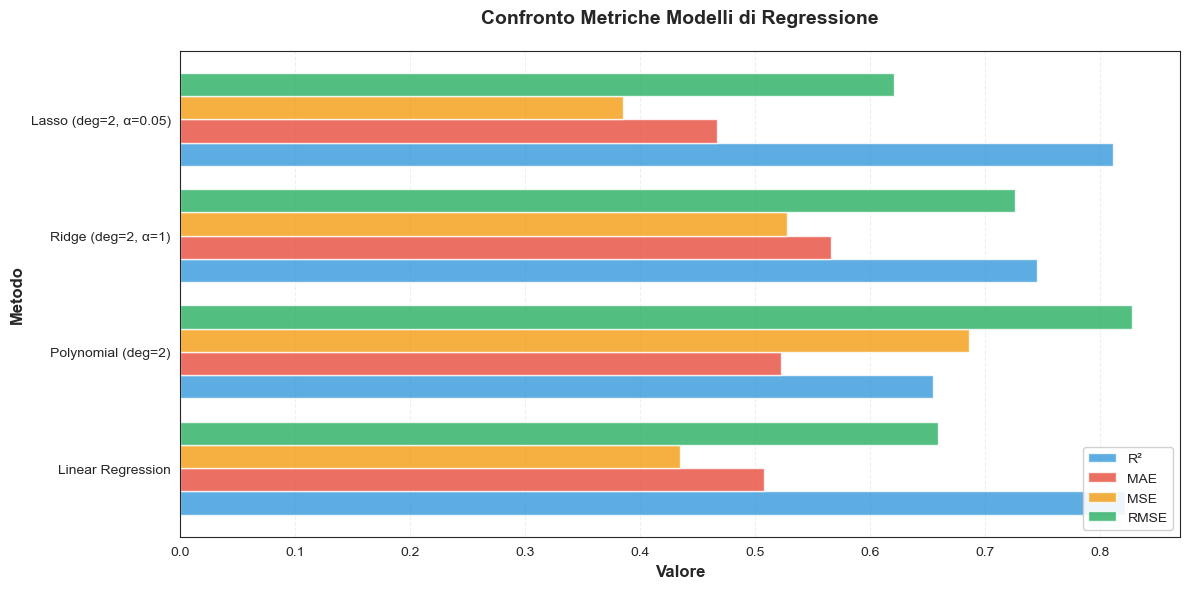

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))

# Posizioni delle barre
methods = results_df['Method']
y_pos = np.arange(len(methods))
bar_height = 0.2

# Colori per ogni metrica
colors = {
    'R²': '#3498db',    # Blu
    'MAE': '#e74c3c',   # Rosso
    'MSE': '#f39c12',   # Arancione
    'RMSE': '#27ae60'   # Verde
}

# Creazione delle barre orizzontali
bars1 = ax.barh(y_pos - 1.5*bar_height, results_df['R²'], bar_height, 
                label='R²', color=colors['R²'], alpha=0.8)
bars2 = ax.barh(y_pos - 0.5*bar_height, results_df['MAE'], bar_height, 
                label='MAE', color=colors['MAE'], alpha=0.8)
bars3 = ax.barh(y_pos + 0.5*bar_height, results_df['MSE'], bar_height, 
                label='MSE', color=colors['MSE'], alpha=0.8)
bars4 = ax.barh(y_pos + 1.5*bar_height, results_df['RMSE'], bar_height, 
                label='RMSE', color=colors['RMSE'], alpha=0.8)


ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Valore', fontsize=12, fontweight='bold')
ax.set_ylabel('Metodo', fontsize=12, fontweight='bold')
ax.set_title('Confronto Metriche Modelli di Regressione', 
             fontsize=14, fontweight='bold', pad=20)

# Griglia
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Legenda
ax.legend(loc='lower right', framealpha=0.9, fontsize=10)



# Layout
plt.tight_layout()

Per valutare le prestazioni dei diversi approcci, sono stati confrontati i modelli stimati utilizzando le principali metriche di errore e il coefficiente di determinazione R², calcolati in scala logaritmica del PIL pro capite.

La **Regressione Lineare** rappresenta il modello di riferimento (baseline) e mostra buone prestazioni complessive, con un R² pari a 0.82 e un errore relativamente contenuto. Nonostante la semplicità strutturale, il modello evidenzia una buona capacità di generalizzazione.

La **Regressione Polinomiale di grado 2** peggiora sensibilmente le prestazioni rispetto al modello lineare, con una riduzione del R² e un aumento delle metriche di errore. Questo comportamento suggerisce la presenza di overfitting, dovuto all’introduzione di termini non lineari non supportati adeguatamente dai dati.

La **Ridge Regression** applicata al modello polinomiale migliora la stabilità rispetto alla regressione polinomiale pura, ma non raggiunge le prestazioni del modello lineare. La regolarizzazione riduce la varianza, ma non apporta un significativo miglioramento predittivo.

La **Lasso Regression** con termini polinomiali fornisce il miglior compromesso tra complessità e accuratezza, ottenendo un R² pari a 0.81 e il valore di RMSE più basso. La selezione automatica delle variabili introdotta dal Lasso contribuisce a contenere l’overfitting.

<a id="regressione-logistica-ml"></a>

## Regressione Logistica

### Definizione del problema predittivo
A partire dai dati socio-economici e demografici disponibili, l’obiettivo è costruire uno **strumento automatico di classificazione** in grado di rispondere alla seguente domanda:

**È possibile prevedere se un Paese appartiene alla categoria “ricco” o “non ricco” sulla base di indicatori sociali, economici ed energetici?**

Per trasformare il problema in un task di classificazione, è stata creata una variabile target binaria (`rich`), definita confrontando il **PIL pro capite** di ciascun Paese con la **mediana del dataset**:
- `rich = 1` → Paesi con PIL pro capite superiore alla mediana  
- `rich = 0` → Paesi con PIL pro capite inferiore o uguale alla mediana  

Questo approccio consente di passare da un problema di regressione a uno di **classificazione binaria**, più adatto quando l’interesse non è stimare il valore esatto del PIL, ma distinguere tra livelli di benessere economico.

### Scenario applicativo
Il modello può essere utilizzato come **strumento di supporto decisionale** da parte di:
- organizzazioni internazionali,
- enti governativi,
- istituzioni economiche e di cooperazione.

Ad esempio, il sistema può aiutare a classificare rapidamente Paesi o regioni emergenti in base al loro livello di sviluppo economico, utilizzando indicatori facilmente reperibili come aspettativa di vita, istruzione, accesso a Internet, consumi energetici e spesa sanitaria.

### Utilità del problema
Risolvere questo problema è utile perché:
- consente una **valutazione automatica e standardizzata** del livello di sviluppo economico;
- riduce la dipendenza da analisi manuali o da un singolo indicatore (il PIL);
- permette di individuare **pattern strutturali** associati alla ricchezza di un Paese.

In contesti reali, questo tipo di classificazione può essere utilizzato per:
- allocare fondi e risorse in modo più mirato,
- monitorare l’evoluzione socio-economica nel tempo,
- supportare analisi comparative tra Paesi.

### Valore aggiunto
Il valore aggiunto del modello può essere quantificato (in modo ipotetico) come:
- **riduzione dei costi analitici**, grazie a una classificazione automatica;
- **maggiore rapidità decisionale**, soprattutto in contesti con molti Paesi da valutare;
- **migliore capacità predittiva**, come dimostrato dalle metriche ottenute.


=== RISULTATI K-FOLD (5 folds) ===
Accuracy medio : 0.822
Precision media: 0.808
Recall medio   : 0.808
F1-score medio : 0.805
AUC media      : 0.905


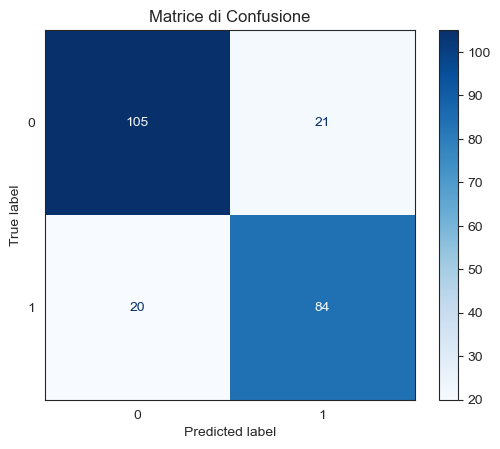

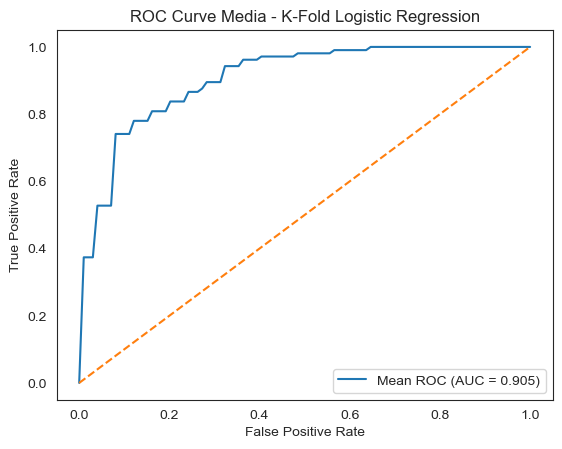

In [62]:
# ==============================
# 1. Librerie
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# ==============================
# 2. Target
# ==============================
df['rich'] = (
    df['GDP per capita (current US$)'] >
    df['GDP per capita (current US$)'].median()
).astype(int)

# ==============================
# 3. Feature selection
# ==============================
features = [
    'Population density (per km2, 2017)',
    'Unemployment (% of labour force)',
    'Life expectancy at birth (females, years)',
    'Life expectancy at birth (males, years)',
    'Individuals using the Internet (per 100 inhabitants)',
    'CO2 emission estimates (tons per capita)',
    'Energy supply per capita (Gigajoules)',
    'Education: Secondary gross enrol. ratio (female per 100 pop.)',
    'Health: Total expenditure (% of GDP)'
]

X = df[features]
y = df['rich']

# ==============================
# 4. Preprocessing
# ==============================
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

# ==============================
# 5. Stratified K-Fold
# ==============================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

conf_matrix_total = np.zeros((2, 2))
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# ==============================
# 6. Cross-validation loop
# ==============================
for train_idx, test_idx in skf.split(X, y):

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_prob))

    conf_matrix_total += confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# ==============================
# 7. Risultati medi
# ==============================
print("=== RISULTATI K-FOLD (5 folds) ===")
print(f"Accuracy medio : {np.mean(accuracy_list):.3f}")
print(f"Precision media: {np.mean(precision_list):.3f}")
print(f"Recall medio   : {np.mean(recall_list):.3f}")
print(f"F1-score medio : {np.mean(f1_list):.3f}")
print(f"AUC media      : {np.mean(auc_list):.3f}")

# ==============================
# 8. Matrice di Confusione
# ==============================
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_total.astype(int))
disp.plot(cmap='Blues')  
plt.title("Matrice di Confusione")
plt.show()

# ==============================
# 9. ROC Curve media
# ==============================
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_list)

plt.figure()
plt.plot(mean_fpr, mean_tpr, label=f"Mean ROC (AUC = {mean_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Media - K-Fold Logistic Regression")
plt.legend()
plt.show()

I risultati della regressione logistica con **Stratified K-Fold Cross-Validation** mostrano infatti:
- Accuracy media: **0.82**
- F1-score medio: **0.81**
- AUC media: **0.91**

Un valore di AUC elevato indica un’ottima capacità del modello di discriminare tra Paesi “ricchi” e “non ricchi”, confermando la **solidità e l’utilità pratica** dell’approccio adottato.

<a id="softmax"></a>

## SoftMax

### Definizione del problema predittivo
A partire dai dati socio-economici disponibili, l’obiettivo è sviluppare uno **strumento automatico di classificazione multiclasse** capace di rispondere alla seguente domanda:

**È possibile classificare i Paesi in base al loro livello di digitalizzazione utilizzando indicatori economici, demografici e sociali?**

Il problema viene formalizzato come una **classificazione a tre classi**, creando una variabile target categoriale (`digitalization_class`) a partire dalla percentuale di individui che utilizzano Internet:
- **Low digitalization**: meno del 40%
- **Medium digitalization**: tra 40% e 70%
- **High digitalization**: oltre il 70%

Questo approccio consente di trasformare una variabile continua in classi interpretabili, più adatte a un’analisi comparativa e decisionale.

### Scenario applicativo
Il modello può essere impiegato da:
- organismi internazionali,
- enti di pianificazione economica,
- istituzioni per lo sviluppo tecnologico.

In particolare, la classificazione del livello di digitalizzazione di un Paese può supportare:
- la progettazione di politiche per l’inclusione digitale,
- l’allocazione di investimenti infrastrutturali,
- il monitoraggio del divario digitale tra aree geografiche.

### Utilità del problema
Risolvere questo problema è utile perché:
- consente una **valutazione sintetica e automatica** dello sviluppo digitale;
- integra molteplici dimensioni socio-economiche, evitando valutazioni basate su un solo indicatore;
- permette di individuare Paesi in una **fase intermedia di sviluppo**, che richiedono politiche mirate.

La regressione logistica multinomiale (Softmax) è particolarmente adatta a questo contesto, poiché modella direttamente la probabilità di appartenenza a ciascuna classe.

### Valore aggiunto
Il valore aggiunto del modello può essere quantificato in termini di:
- **supporto alle decisioni strategiche**, grazie a una classificazione chiara e replicabile;
- **riduzione dei tempi di analisi**, automatizzando la segmentazione dei Paesi;
- **robustezza delle prestazioni**, ottenuta tramite pipeline di preprocessing e ottimizzazione iperparametrica.

L’uso di **Grid Search con Cross-Validation** ha permesso di selezionare un valore ottimale del parametro di regolarizzazione (**C = 0.01**), indicando la necessità di una forte penalizzazione per gestire multicollinearità e prevenire overfitting.



=== SOFTMAX (MULTINOMIAL) ===
Best C: 0.01
Accuracy           : 0.750
Balanced Accuracy  : 0.744
Precision (macro)  : 0.742
Recall (macro)     : 0.744
F1-score (macro)   : 0.741

Classification Report:
                       precision    recall  f1-score   support

  High digitalization       0.80      0.84      0.82        19
   Low digitalization       0.78      0.84      0.81        25
Medium digitalization       0.65      0.55      0.59        20

             accuracy                           0.75        64
            macro avg       0.74      0.74      0.74        64
         weighted avg       0.74      0.75      0.74        64



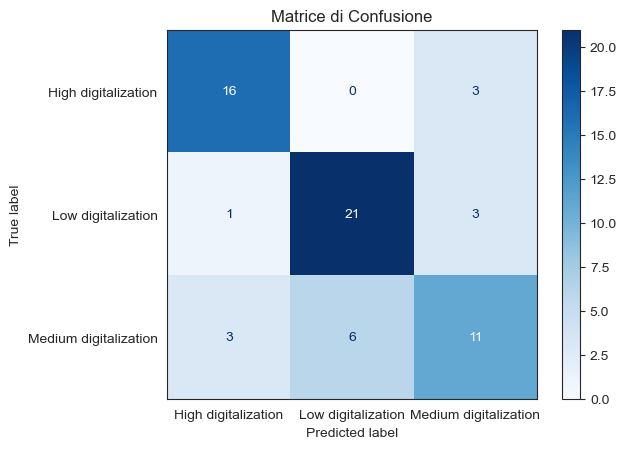

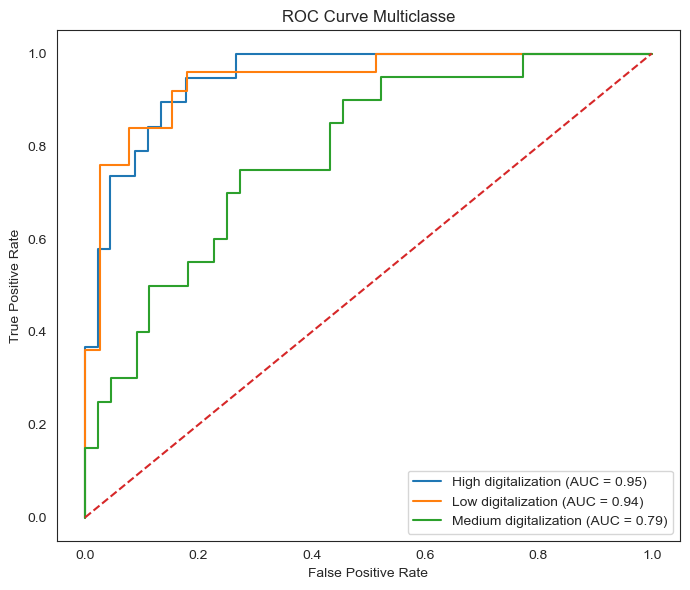

In [63]:
# ==============================
# 1. Librerie
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# Copia di sicurezza
df = df.copy()

# ==============================
# 2. TARGET: 3 livelli di digitalizzazione
# ==============================
df["digitalization_class"] = pd.cut(
    df["Individuals using the Internet (per 100 inhabitants)"],
    bins=[0, 40, 70, 100],
    labels=["Low digitalization", "Medium digitalization", "High digitalization"]
)

df = df.dropna(subset=["digitalization_class"])

# ==============================
# 3. FEATURES
# ==============================
X = df.select_dtypes(include=[np.number]).drop(
    columns=["Individuals using the Internet (per 100 inhabitants)"],
    errors="ignore"
)

y = df["digitalization_class"]

class_names = y.unique()

# ==============================
# 4. Train / Test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ==============================
# 5. Pipeline + GridSearch
# ==============================
pipe_softmax = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000
    ))
])

param_grid = {
    "model__C": np.logspace(-3, 3, 7)
}

search_softmax = GridSearchCV(
    pipe_softmax,
    param_grid,
    cv=5,
    scoring="balanced_accuracy"
)

search_softmax.fit(X_train, y_train)

# ==============================
# 6. Predizioni
# ==============================
y_pred = search_softmax.predict(X_test)
y_prob = search_softmax.predict_proba(X_test)

# ==============================
# 7. Metriche di classificazione
# ==============================
print("\n=== SOFTMAX (MULTINOMIAL) ===")
print("Best C:", search_softmax.best_params_["model__C"])
print(f"Accuracy           : {accuracy_score(y_test, y_pred):.3f}")
print(f"Balanced Accuracy  : {balanced_accuracy_score(y_test, y_pred):.3f}")
print(f"Precision (macro)  : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall (macro)     : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1-score (macro)   : {f1_score(y_test, y_pred, average='macro'):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==============================
# 8. Matrice di Confusione
# ==============================
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=search_softmax.classes_
)

disp.plot(cmap='Blues')
plt.title("Matrice di Confusione")
plt.show()

# ==============================
# 9. ROC Curve multiclasse
# ==============================
y_test_bin = label_binarize(y_test, classes=search_softmax.classes_)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(7, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"{search_softmax.classes_[i]} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Multiclasse")
plt.legend()
plt.tight_layout()
plt.show()



Le prestazioni sul test set mostrano:
- Accuracy: **0.75**
- Balanced Accuracy: **0.74**
- F1-score (macro): **0.74**

L’analisi per classe evidenzia una buona capacità discriminante per i Paesi con livelli **Low** e **High** di digitalizzazione, mentre la classe **Medium** risulta più difficile da separare, riflettendo la natura graduale del processo di sviluppo digitale.

Nel complesso, la regressione Softmax rappresenta una **baseline solida, interpretabile e scalabile** per l’analisi comparativa della digitalizzazione a livello internazionale.

<a id="softmaxvsovr"></a>

## SoftMax e  One VS Rest

In questo caso, il problema viene affrontato tramite un approccio **One-vs-Rest (OvR)**, che scompone la classificazione multiclasse in più problemi binari indipendenti, stimando un classificatore per ciascuna classe contro tutte le altre.





=== ONE-vs-REST ===
Best C: 0.1
Accuracy           : 0.672
Balanced Accuracy  : 0.662
Precision (macro)  : 0.656
Recall (macro)     : 0.662
F1-score (macro)   : 0.659

Classification Report:
                       precision    recall  f1-score   support

  High digitalization       0.70      0.74      0.72        19
   Low digitalization       0.77      0.80      0.78        25
Medium digitalization       0.50      0.45      0.47        20

             accuracy                           0.67        64
            macro avg       0.66      0.66      0.66        64
         weighted avg       0.66      0.67      0.67        64



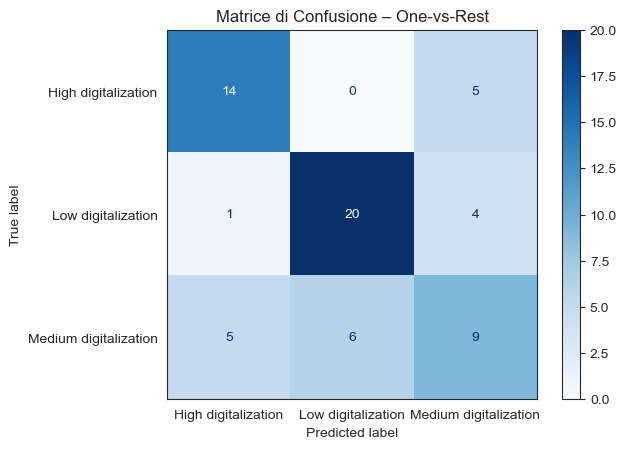

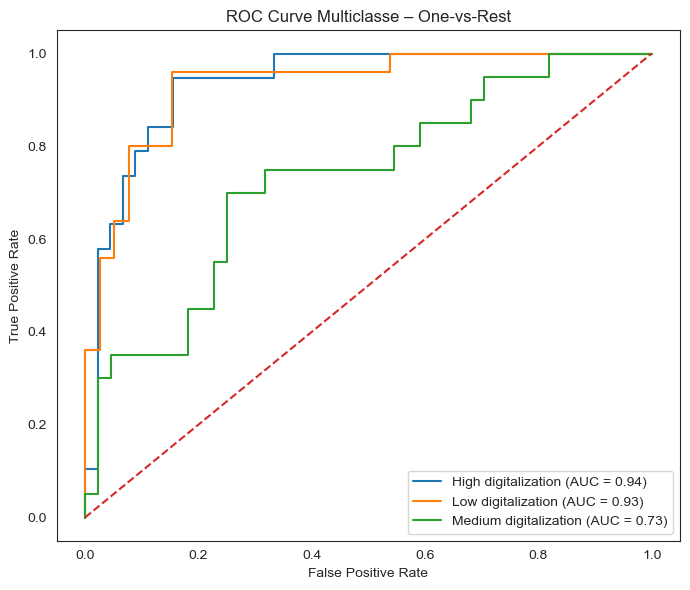

In [64]:
# ==============================
# ONE-vs-REST Logistic Regression
# ==============================

from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Pipeline OvR
# ------------------------------
pipe_ovr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        solver="lbfgs",
        max_iter=1000,
        multi_class="ovr"
    ))
])

# ------------------------------
# GridSearch
# ------------------------------
search_ovr = GridSearchCV(
    pipe_ovr,
    param_grid,
    cv=5,
    scoring="balanced_accuracy"
)

search_ovr.fit(X_train, y_train)

# ------------------------------
# Predizioni
# ------------------------------
y_pred_ovr = search_ovr.predict(X_test)
y_prob_ovr = search_ovr.predict_proba(X_test)

# ------------------------------
# Metriche
# ------------------------------
print("\n=== ONE-vs-REST ===")
print("Best C:", search_ovr.best_params_["model__C"])
print(f"Accuracy           : {accuracy_score(y_test, y_pred_ovr):.3f}")
print(f"Balanced Accuracy  : {balanced_accuracy_score(y_test, y_pred_ovr):.3f}")
print(f"Precision (macro)  : {precision_score(y_test, y_pred_ovr, average='macro'):.3f}")
print(f"Recall (macro)     : {recall_score(y_test, y_pred_ovr, average='macro'):.3f}")
print(f"F1-score (macro)   : {f1_score(y_test, y_pred_ovr, average='macro'):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ovr))

# ------------------------------
# Matrice di Confusione
# ------------------------------
cm_ovr = confusion_matrix(y_test, y_pred_ovr)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_ovr,
    display_labels=search_ovr.classes_
)

disp.plot(cmap='Blues')
plt.title("Matrice di Confusione – One-vs-Rest")
plt.show()

# ------------------------------
# ROC Curve multiclasse (OvR)
# ------------------------------
y_test_bin = label_binarize(y_test, classes=search_ovr.classes_)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(7, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_ovr[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_ovr[:, i])
    plt.plot(
        fpr,
        tpr,
        label=f"{search_ovr.classes_[i]} (AUC = {auc:.2f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Multiclasse – One-vs-Rest")
plt.legend()
plt.tight_layout()
plt.show()



Le prestazioni sul test set risultano tuttavia inferiori:
- Accuracy: **0.67**
- Balanced Accuracy: **0.66**
- F1-score (macro): **0.66**

L’analisi per classe mostra che il modello mantiene buone prestazioni per i Paesi a **bassa** e **alta** digitalizzazione, ma evidenzia difficoltà marcate nella classificazione della classe **Medium**, che presenta i valori più bassi di precision, recall e F1-score. Questo comportamento è coerente con la natura dell’approccio OvR, che tende a penalizzare le classi intermedie quando i confini decisionali non sono ben separabili.

### Considerazioni conclusive
Il confronto tra i due approcci multiclasse evidenzia che:
- la **regressione Softmax** fornisce risultati migliori e più stabili, grazie a una modellazione congiunta delle probabilità;
- l’approccio **One-vs-Rest** si comporta leggermente peggio in termini di accuratezza e capacità discriminante, soprattutto per la classe intermedia.

In conclusione, sebbene l’OvR rappresenti una baseline valida e interpretabile, la regressione logistica multinomiale risulta più adatta per descrivere un fenomeno graduale e continuo come la digitalizzazione dei Paesi.

In [65]:
print("\n=== CONFRONTO FINALE ===")

softmax_bal_acc = balanced_accuracy_score(y_test, y_pred)
ovr_bal_acc = balanced_accuracy_score(y_test, y_pred_ovr)

print(f"Softmax (Multinomial)  – Balanced Accuracy: {softmax_bal_acc:.3f}")
print(f"One-vs-Rest (OvR)      – Balanced Accuracy: {ovr_bal_acc:.3f}")


=== CONFRONTO FINALE ===
Softmax (Multinomial)  – Balanced Accuracy: 0.744
One-vs-Rest (OvR)      – Balanced Accuracy: 0.662


<a id="knn"></a>

## K-Nearest Neighbor

### Definizione del problema predittivo
L’obiettivo è costruire uno **strumento automatico di regressione** in grado di stimare l’**aspettativa di vita media** di un Paese a partire da indicatori economici, sanitari, ambientali e demografici. In particolare, la variabile target è definita come la media tra l’aspettativa di vita maschile e femminile, fornendo una misura sintetica del livello di benessere sanitario complessivo.

Il modello KNN affronta il problema in modo non parametrico, stimando il valore target sulla base dei Paesi “più simili” in termini di caratteristiche osservate.

### Scenario applicativo
Un tale strumento risulta utile in ambito di:
- **analisi comparativa internazionale** della salute pubblica;
- **supporto alle politiche sanitarie**, per identificare Paesi con aspettativa di vita inferiore a quella attesa dato il contesto socio-economico;
- **valutazione di scenari controfattuali**, ad esempio stimando l’impatto di miglioramenti nella spesa sanitaria o nel reddito pro capite.

### Utilità del problema
Stimare l’aspettativa di vita consente di sintetizzare molte dimensioni dello sviluppo umano in un unico indicatore. Un modello KNN permette inoltre di catturare **relazioni non lineari** tra le variabili esplicative e la target, senza imporre assunzioni funzionali rigide come nei modelli parametrici.

### Valore aggiunto e risultati
Il modello è stato addestrato all’interno di una pipeline completa che include imputazione dei valori mancanti, standardizzazione delle feature e selezione del numero ottimale di vicini tramite **cross-validation**. La scelta del parametro $K$ è stata effettuata minimizzando l’errore quadratico medio (RMSE) in validazione incrociata, individuando **K = 3** come valore ottimale.




Training samples: 148
Test samples:     64


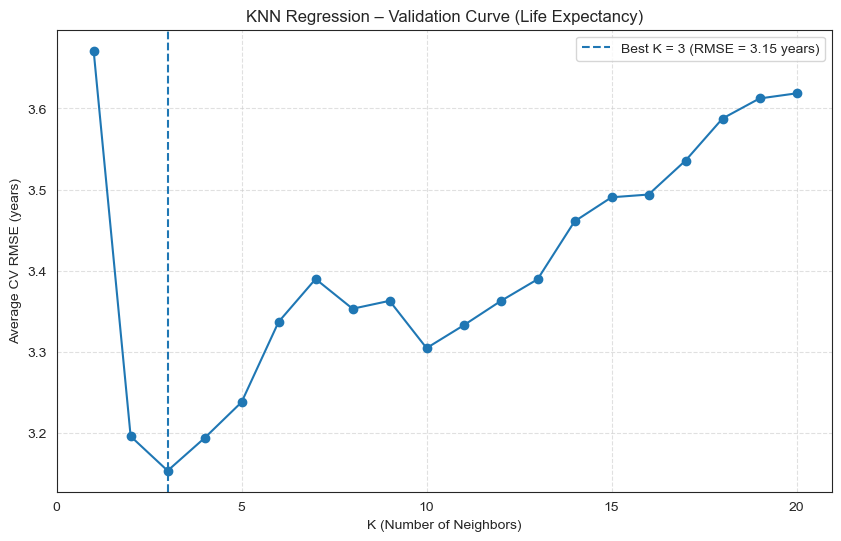


--- Final Model Evaluation ---
Best K (CV): 3
MAE  : 2.89 years
RMSE : 4.47 years


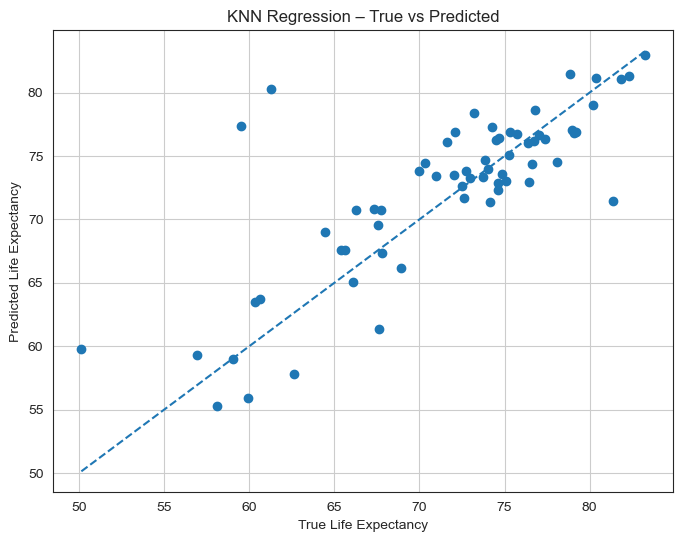

--------------------------------------------------
PAESE CON ASPETTATIVA DI VITA PIÙ ALTA:
San Marino: 84.05 anni
--------------------------------------------------
PAESE CON ASPETTATIVA DI VITA PIÙ BASSA:
Central African Republic: 49.40 anni
--------------------------------------------------


In [66]:
# ============================================================
# KNN REGRESSION 
# ============================================================

# -----------------------
# 1. Librerie
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# -----------------------
# 2. Dataset
# -----------------------
df = pd.read_csv("dataset/dataset_definitivo.csv")
# -----------------------
# 3. Creazione target
# -----------------------
df['Life expectancy mean'] = (
    df['Life expectancy at birth (females, years)'] +
    df['Life expectancy at birth (males, years)']
) / 2

df = df.dropna(subset=['Life expectancy mean'])


# -----------------------
# 4. Feature selection
# -----------------------
features = [
    'GDP per capita (current US$)',
    'Unemployment (% of labour force)',
    'Health: Total expenditure (% of GDP)',
    'Infant mortality rate (per 1000 live births',
    'Urban population (% of total population)',
    'CO2 emission estimates (tons per capita)',
    'Energy supply per capita (Gigajoules)'
]

X = df[features]
y = df['Life expectancy mean']
# -----------------------
# 5. Gestione missing values
# -----------------------
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
# -----------------------
# 6. Train / Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}")
# -----------------------
# 7. Scaling
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ============================================================
# 8. CROSS-VALIDATION – K SELECTION
# ============================================================
k_range = range(1, 21)
cv_rmse_scores = []
for k in k_range:
    knn = KNeighborsRegressor(
        n_neighbors=k,
        weights='distance'
    )
    
    scores = cross_val_score(
        knn,
        X_train_scaled,
        y_train,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    
    cv_rmse_scores.append(np.sqrt(-scores.mean()))
# -----------------------
# 9. Validation curve
# -----------------------
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_rmse_scores, marker='o')
plt.title('KNN Regression – Validation Curve (Life Expectancy)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average CV RMSE (years)')
plt.xticks(np.arange(0, 21, 5))

best_k_index = np.argmin(cv_rmse_scores)
best_k = k_range[best_k_index]
best_rmse = cv_rmse_scores[best_k_index]

plt.axvline(
    best_k,
    linestyle='--',
    label=f'Best K = {best_k} (RMSE = {best_rmse:.2f} years)'
)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# ============================================================
# 10. Modello Finale
# ============================================================
final_knn = KNeighborsRegressor(
    n_neighbors=best_k,
    weights='distance'
)

final_knn.fit(X_train_scaled, y_train)
# -----------------------
# 11. Final evaluation
# -----------------------
y_pred = final_knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Model Evaluation ---")
print(f"Best K (CV): {best_k}")
print(f"MAE  : {mae:.2f} years")
print(f"RMSE : {rmse:.2f} years")
# -----------------------
# 12. True vs Predicted plot
# -----------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)
plt.xlabel('True Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('KNN Regression – True vs Predicted')
plt.grid()
plt.show()

country_col = df.columns[0]  

row_max = df.loc[df['Life expectancy mean'].idxmax()]
row_min = df.loc[df['Life expectancy mean'].idxmin()]

print("-" * 50)
print(f"PAESE CON ASPETTATIVA DI VITA PIÙ ALTA:")
print(f"{row_max[country_col]}: {row_max['Life expectancy mean']:.2f} anni")
print("-" * 50)
print(f"PAESE CON ASPETTATIVA DI VITA PIÙ BASSA:")
print(f"{row_min[country_col]}: {row_min['Life expectancy mean']:.2f} anni")
print("-" * 50)



Le prestazioni sul test set risultano:
- **MAE = 2.89 anni**
- **RMSE = 4.47 anni**

Questi valori indicano una buona capacità predittiva: in media, l’errore assoluto sulla stima dell’aspettativa di vita è inferiore a tre anni, un risultato soddisfacente considerando l’elevata eterogeneità tra Paesi.

### Considerazioni conclusive
L’analisi conferma che il KNN rappresenta una **baseline efficace e interpretabile** per la previsione dell’aspettativa di vita. Il modello riesce a cogliere differenze marcate tra Paesi ad alto e basso sviluppo sanitario (ad esempio, San Marino e la Repubblica Centrafricana), mostrando una sensibilità coerente con la realtà empirica. Tuttavia, la sua dipendenza dalla distanza tra osservazioni suggerisce che le prestazioni possono degradare in presenza di rumore o feature poco informative, rendendo cruciale una corretta selezione e normalizzazione delle variabili.

<a id="qda"></a>

## Quadratic Discriminant Analysis 

La **Quadratic Discriminant Analysis (QDA)** è un metodo di classificazione probabilistico che assume che le osservazioni di ciascuna classe seguano una **distribuzione normale multivariata**, consentendo però a ogni classe di avere una **matrice di covarianza distinta**. Questa caratteristica rende le **frontiere decisionali quadratiche**, più flessibili rispetto a quelle lineari della LDA.

### Quando è appropriata
La QDA risulta particolarmente indicata quando:
- sono disponibili **molti dati per ciascuna classe**, sufficienti a stimare in modo affidabile le matrici di covarianza;
- esiste una **chiara non linearità** nella separazione tra le classi;
- le classi presentano **strutture di dispersione differenti**;
- si accetta un compromesso tra stabilità e flessibilità del modello.

### Perché non viene utilizzata in questo progetto
Nel contesto di questo progetto, la QDA **non è stata adottata** per diverse ragioni metodologiche:
- il **numero di osservazioni per classe è limitato**, rendendo poco affidabile la stima di una matrice di covarianza completa per ciascuna classe;
- l’elevato numero di variabili esplicative rispetto ai dati disponibili aumenta il rischio di **overfitting**;
- la QDA è caratterizzata da **alta varianza** e da una **minore stabilità** rispetto a modelli più regolarizzati come la regressione logistica, la Softmax o la LDA;
- i risultati ottenuti con modelli più semplici e stabili mostrano già **buone prestazioni predittive**, riducendo il beneficio marginale di un modello più complesso.

### Considerazioni conclusive
Sebbene la QDA offra una maggiore flessibilità e possa risultare superiore in presenza di classi con forme e dispersioni molto diverse, nel caso in esame il **rapporto tra complessità del modello e quantità di dati disponibili** non ne giustifica l’impiego. Per questo motivo, si è preferito adottare approcci più sta


<a id="lda"></a>

## Linear Discriminant Analysis

**Scenario applicativo**
L’obiettivo è classificare i paesi in **tre livelli di aspettativa di vita** (*Low*, *Medium*, *High*) a partire da indicatori socio-economici, demografici e ambientali. Questo tipo di classificazione può essere utilizzato da organizzazioni internazionali e policy maker per identificare aree critiche, confrontare contesti socio-sanitari e supportare decisioni di allocazione delle risorse.

**Utilità del problema**
Discretizzare l’aspettativa di vita consente di passare da una stima puntuale a una **valutazione qualitativa del benessere sanitario**, più facilmente interpretabile e utilizzabile in contesti decisionali. La classificazione riduce la sensibilità al rumore e permette confronti robusti tra paesi.

**Valore aggiunto**
Un modello automatico di classificazione consente di:

* identificare rapidamente paesi con livelli critici di aspettativa di vita;
* supportare analisi comparative su larga scala;
* fornire uno strumento interpretabile e computazionalmente efficiente.

Il valore aggiunto è quindi un **supporto decisionale rapido, scalabile e interpretabile**.


### Setup Sperimentale

* Il target continuo (*Life expectancy mean*) è stato **discretizzato in tre classi** mediante quantili, garantendo classi bilanciate.
* I dati sono stati suddivisi in **Training set (70%)** e **Test set (30%)**, mantenendo la distribuzione delle classi (stratificazione).

### Modellazione

La **LDA** è un metodo di classificazione generativo che:

* assume distribuzioni gaussiane multivariate per ciascuna classe;
* utilizza una **matrice di covarianza condivisa** tra le classi;
* produce **frontiere decisionali lineari**.

È particolarmente adatta in contesti con:

* dimensionalità moderata;
* dataset non eccessivamente grandi;
* necessità di interpretabilità e stabilità.

Training samples: 148, Test samples: 64

=== LDA (Linear Discriminant Analysis) ===
Training Time     : 0.00 sec
Accuracy          : 0.766
Precision (macro) : 0.774
Recall (macro)    : 0.768
F1-score (macro)  : 0.767

Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.64      0.70        22
         Low       0.90      0.90      0.90        21
      Medium       0.64      0.76      0.70        21

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.77        64
weighted avg       0.77      0.77      0.77        64



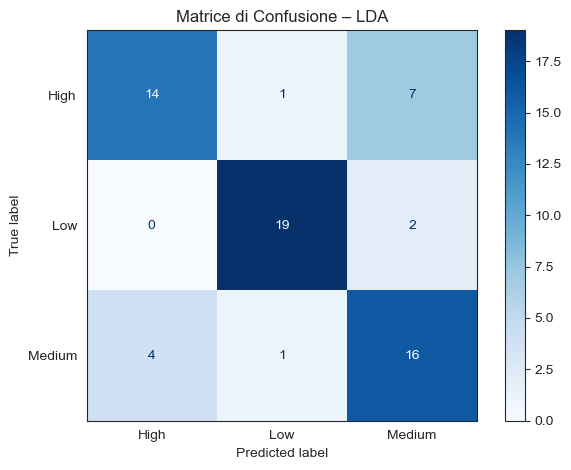

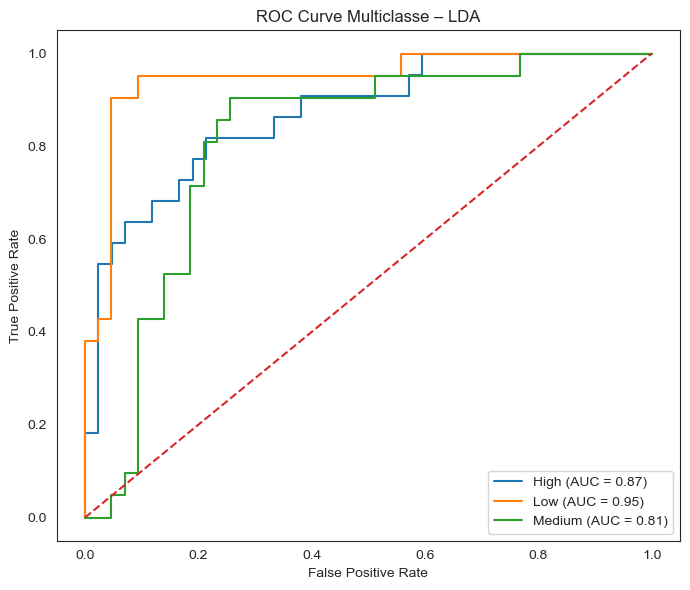

In [67]:
# ==============================
# 1. Librerie
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# ==============================
# 2. Dataset
# ==============================
df = pd.read_csv("dataset/dataset_definitivo.csv")

# ==============================
# 3. Target cleaning
# ==============================
df_clean = df.dropna(subset=[
    "Life expectancy at birth (females, years)",
    "Life expectancy at birth (males, years)"
])

# ==============================
# 4. Target creation
# ==============================
df_clean["Life expectancy mean"] = (
    df_clean["Life expectancy at birth (females, years)"] +
    df_clean["Life expectancy at birth (males, years)"]
) / 2

# ==============================
# 5. FEATURES
# ==============================
X = df_clean.drop(columns=[
    "country",
    "Region",
    "Life expectancy at birth (females, years)",
    "Life expectancy at birth (males, years)",
    "Life expectancy mean"
])

# ==============================
# 6. Discretizzazione target
# ==============================
y = pd.qcut(
    df_clean["Life expectancy mean"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# ==============================
# 7. TRAIN / TEST SPLIT
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

# ==============================
# 8. PIPELINE LDA
# ==============================
lda_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("lda", LinearDiscriminantAnalysis())
])

# ==============================
# 9. TRAIN MODEL
# ==============================
start_time = time.time()
lda_pipeline.fit(X_train, y_train)
elapsed_time = time.time() - start_time

# ==============================
# 10. PREDICTIONS
# ==============================
y_pred = lda_pipeline.predict(X_test)
y_prob = lda_pipeline.predict_proba(X_test)

# ==============================
# 11. METRICHE DI CLASSIFICAZIONE
# ==============================
print("\n=== LDA (Linear Discriminant Analysis) ===")
print(f"Training Time     : {elapsed_time:.2f} sec")
print(f"Accuracy          : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision (macro) : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Recall (macro)    : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"F1-score (macro)  : {f1_score(y_test, y_pred, average='macro'):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==============================
# 12. MATRICE DI CONFUSIONE
# ==============================
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=lda_pipeline.classes_
)

disp.plot(cmap='Blues')
plt.title("Matrice di Confusione – LDA")
plt.tight_layout()
plt.show()

# ==============================
# 13. ROC CURVE MULTICLASSE
# ==============================
y_test_bin = label_binarize(y_test, classes=lda_pipeline.classes_)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(7, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(
        fpr,
        tpr,
        label=f"{lda_pipeline.classes_[i]} (AUC = {auc:.2f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Multiclasse – LDA")
plt.legend()
plt.tight_layout()
plt.show()

**Prestazioni globali sul Test set**

* Accuracy: **0.766**
* Precision (macro): **0.774**
* Recall (macro): **0.768**
* F1-score (macro): **0.767**

Questi valori indicano una **buona capacità discriminante complessiva** e prestazioni bilanciate tra le classi.

**Analisi per classe**

* **Low**: classe meglio riconosciuta (precision e recall pari a 0.90), suggerendo che i paesi con bassa aspettativa di vita presentano caratteristiche ben definite.
* **High**: buona precisione (0.78) ma recall più contenuto (0.64), con alcune confusioni verso la classe *Medium*.
* **Medium**: classe più difficile da distinguere, coerentemente con la natura intermedia e graduale del fenomeno.

**Matrice di Confusione**
La matrice evidenzia che gli errori principali avvengono tra classi adiacenti (*Medium–High*), mentre le confusioni estreme sono limitate, indicando una struttura decisionale coerente.

**ROC Curve Multiclasse**
Le curve ROC (One-vs-Rest) mostrano:

* AUC elevata per **Low** (0.95) e **High** (0.87);
* AUC inferiore per **Medium** (0.81), confermando la maggiore ambiguità di questa classe.

<a id="terza-parte"></a>

# Terza Parte

In questo capitolo verranno introdotte e applicate **tecniche di Apprendimento Non Supervisionato** con l’obiettivo di arricchire e completare l’analisi svolta nelle fasi precedenti del progetto. L’attenzione non sarà rivolta alla costruzione di nuovi modelli predittivi da zero, ma all’utilizzo di strumenti esplorativi per **comprendere meglio la struttura dei dati**, migliorarne la rappresentazione e supportare le analisi supervisionate già realizzate.

In particolare, il capitolo tratterà:

* **Riduzione della dimensionalità tramite PCA**, per visualizzare i dati in spazi a bassa dimensione, individuare correlazioni latenti e valutare la separabilità delle classi;
* **Clustering**, per scoprire raggruppamenti naturali nei dati, confrontarli con le classi note e valutare il loro possibile utilizzo come informazione aggiuntiva nei modelli supervisionati;
* **Stima della densità**, per analizzare in modo più accurato le distribuzioni delle variabili e individuare eventuali anomalie o outlier.



<a id="pca"></a>

## La Principal Component Analysis (PCA) 

In questo capitolo viene introdotta l’analisi di **Riduzione della Dimensionalità tramite Principal Component Analysis (PCA)** come strumento di apprendimento non supervisionato, con l’obiettivo di migliorare la comprensione della struttura del dataset dei Paesi e supportare le analisi svolte nelle prove precedenti.

Si parte dalla preparazione dei dati, selezionando esclusivamente le variabili numeriche e applicando una standardizzazione, passaggio necessario per evitare che differenze di scala influenzino il risultato della PCA. In assenza di etichette utilizzate direttamente dal modello, la variabile *Region* viene mantenuta come riferimento interpretativo per la visualizzazione.

Varianza spiegata PC1: 0.301
Varianza spiegata PC2: 0.105
Varianza totale: 0.406


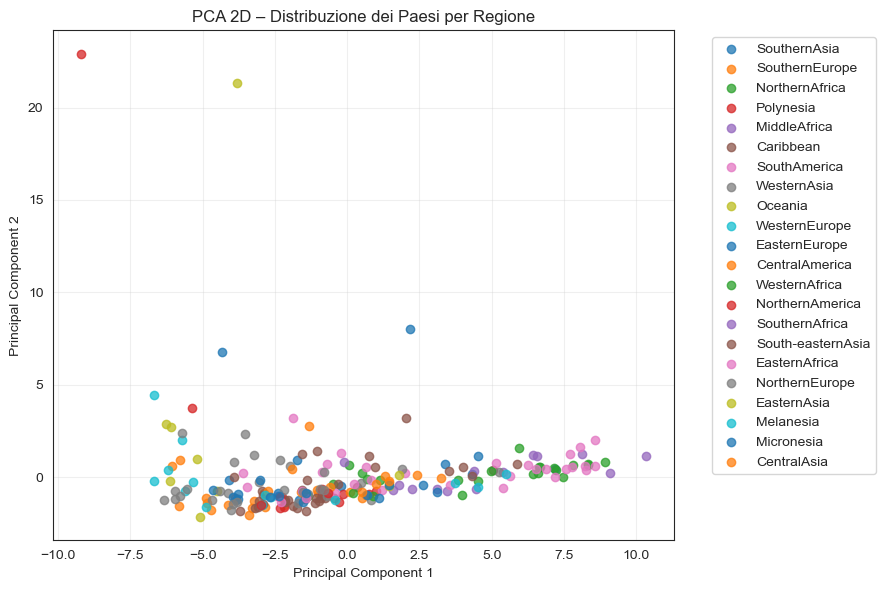


PCA al 90% di varianza
Feature originali: 57
Componenti selezionate: 23
Varianza totale spiegata: 0.903

Top 10 variabili più influenti su PC1:
Population age distribution (0-14 years, %)                      0.219855
Infant mortality rate (per 1000 live births                      0.219790
Life expectancy at birth (females, years)                        0.218372
Individuals using the Internet (per 100 inhabitants)             0.212141
Fertility rate, total (live births per woman)                    0.211074
Life expectancy at birth (males, years)                          0.209572
Employment: Agriculture (% of employed)                          0.208282
Pop. using improved sanitation facilities (rural, %)             0.206613
Education: Secondary gross enrol. ratio (female per 100 pop.)    0.200568
Pop. using improved sanitation facilities (urban, %)             0.200499
Name: PC1, dtype: float64

Top 10 variabili più influenti su PC2:
Energy production, primary (Petajoules)          

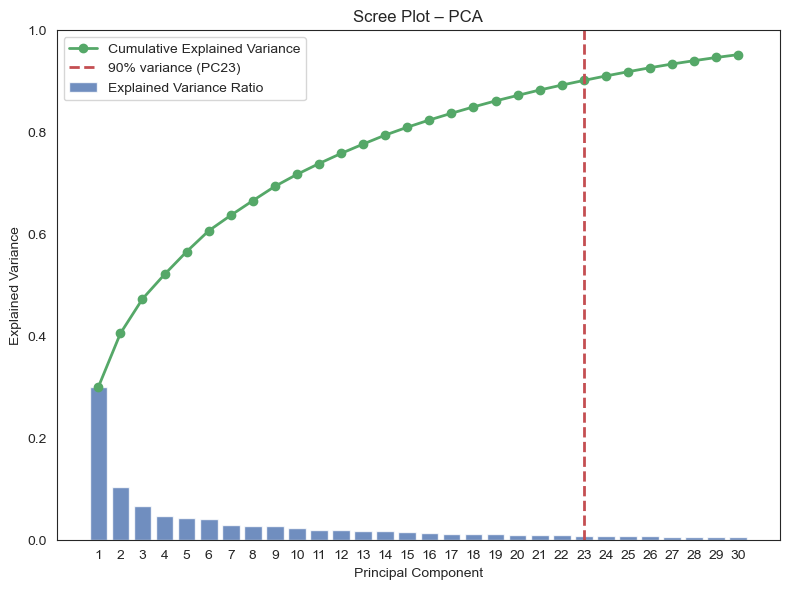


Numero di componenti necessarie per spiegare il 90% della varianza: 23


In [68]:
# ================================
# PCA - RIDUZIONE DIMENSIONALITÀ E VISUALIZZAZIONE
# Dataset Paesi - Caso NON supervisionato
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----------------
# 1. CARICAMENTO DATI
# ----------------

df = pd.read_csv("dataset/dataset_definitivo.csv")

regions = df["Region"]

X = df.select_dtypes(include=["int64", "float64"])
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------
# 2. PCA 2D PER VISUALIZZAZIONE
# ----------------

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("Varianza spiegata PC1:", round(pca_2d.explained_variance_ratio_[0], 3))
print("Varianza spiegata PC2:", round(pca_2d.explained_variance_ratio_[1], 3))
print("Varianza totale:", round(pca_2d.explained_variance_ratio_.sum(), 3))

# Palette colori elegante
palette = plt.cm.tab10.colors

plt.figure(figsize=(9, 6))

for i, region in enumerate(regions.unique()):
    idx = regions == region
    plt.scatter(
        X_pca_2d[idx, 0],
        X_pca_2d[idx, 1],
        label=region,
        alpha=0.75,
        color=palette[i % len(palette)]
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D – Distribuzione dei Paesi per Regione")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------
# 3. PCA PER RIDUZIONE DIMENSIONALE (90% VARIANZA)
# ----------------

pca_90 = PCA(n_components=0.90)
X_pca_90 = pca_90.fit_transform(X_scaled)

print("\nPCA al 90% di varianza")
print("Feature originali:", X.shape[1])
print("Componenti selezionate:", pca_90.n_components_)
print("Varianza totale spiegata:", round(pca_90.explained_variance_ratio_.sum(), 3))

# ----------------
# 4. ANALISI DEI LOADINGS
# ----------------

loadings = pd.DataFrame(
    pca_90.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(pca_90.n_components_)]
)

print("\nTop 10 variabili più influenti su PC1:")
print(loadings["PC1"].abs().sort_values(ascending=False).head(10))

print("\nTop 10 variabili più influenti su PC2:")
print(loadings["PC2"].abs().sort_values(ascending=False).head(10))

# ----------------
# 5. SCREE PLOT (PRIME 30 COMPONENTI + SOGLIA 90%)
# ----------------

pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

n_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
n_components_plot = min(30, len(explained_variance_ratio))

plt.figure(figsize=(8, 6))

# Colori raffinati
bar_color = "#4C72B0"      # Blu petrolio
line_color = "#55A868"     # Verde acqua
threshold_color = "#C44E52"  # Rosso attenuato

plt.bar(
    range(1, n_components_plot + 1),
    explained_variance_ratio[:n_components_plot],
    alpha=0.8,
    label="Explained Variance Ratio",
    color=bar_color
)

plt.plot(
    range(1, n_components_plot + 1),
    cumulative_explained_variance[:n_components_plot],
    marker="o",
    linewidth=2,
    label="Cumulative Explained Variance",
    color=line_color
)

plt.axvline(
    x=n_90,
    linestyle="--",
    linewidth=2,
    color=threshold_color,
    label=f"90% variance (PC{n_90})"
)

plt.title("Scree Plot – PCA")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.xticks(np.arange(1, n_components_plot + 1))
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nNumero di componenti necessarie per spiegare il 90% della varianza: {n_90}")


Dopo una fase di preprocessing che include la selezione delle sole variabili numeriche, l’imputazione dei valori mancanti e la standardizzazione, la PCA viene inizialmente utilizzata a scopo esplorativo proiettando i Paesi sulle prime due componenti principali. La visualizzazione PCA 2D, con colorazione per Regione, mostra che i Paesi **non formano cluster nettamente separati** in base all’area geografica di appartenenza. Si osserva piuttosto una **struttura graduale lungo la Prima Componente Principale (PC1)**, con regioni che tendono a occupare porzioni simili dello spazio ma con **ampia sovrapposizione**. La Seconda Componente Principale (PC2) mette invece in evidenza la presenza di **outlier marcati**, riconducibili a Paesi con dimensioni economiche, produttive ed energetiche particolarmente elevate. In termini geometrici, la separazione delle classi nello spazio ridotto risulta dunque limitata: se il problema fosse di classificazione, esso non sarebbe “facile”, poiché la struttura dei dati non presenta confini lineari chiari tra le regioni.

Successivamente, la PCA viene impiegata come strumento di **riduzione della dimensionalità**, selezionando il numero di componenti necessarie a spiegare il 90% della varianza totale. A fronte di 57 variabili originali, sono sufficienti 23 componenti principali, con una riduzione di circa il 60% della dimensionalità. Questo risultato indica una forte presenza di **ridondanza e correlazione** tra le variabili socio-economiche considerate e consente di ottenere un dataset più compatto, meno rumoroso e più stabile dal punto di vista numerico, potenzialmente utile come input per modelli predittivi o algoritmi di clustering.

L’analisi dei **loadings** permette infine di interpretare il significato delle componenti principali. La prima componente (PC1) risulta fortemente associata a indicatori di **sviluppo umano e transizione demografica**, contrapponendo Paesi caratterizzati da popolazioni giovani, alta fertilità e mortalità infantile a Paesi più sviluppati, con maggiore aspettativa di vita, livelli di istruzione più elevati e migliori condizioni sanitarie. La seconda componente (PC2) riflette invece la **scala economica e produttiva** dei Paesi, ed è dominata da variabili legate a produzione energetica, PIL totale, emissioni di CO₂, commercio internazionale e dimensione territoriale e demografica.

<a id="clustering"></a>

## Riorganizzazione dei dati tramite Clustering

In questa sezione viene applicata una tecnica di **clustering non supervisionato** con l’obiettivo di riorganizzare i Paesi in gruppi omogenei sulla base della **struttura per età della popolazione**, senza utilizzare etichette predefinite. L’analisi è volutamente circoscritta alla dimensione **demografica**, escludendo variabili economiche o sociali, per isolare in modo chiaro le diverse fasi della transizione demografica.

Dopo il caricamento dei dati, l’attenzione si concentra su due indicatori chiave: la percentuale di popolazione **0–14 anni** e quella **60+ anni**, che rappresentano in modo sintetico il rapporto tra popolazione giovane e anziana. I valori mancanti vengono imputati tramite mediana e le variabili standardizzate, così da rendere confrontabili le scale e garantire un corretto funzionamento dell’algoritmo di clustering.

--- Data Info (Struttura per Età) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Population age distribution (0-14 years, %)  222 non-null    float64
 1   Population age distribution (60+ years, %)   222 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB
None


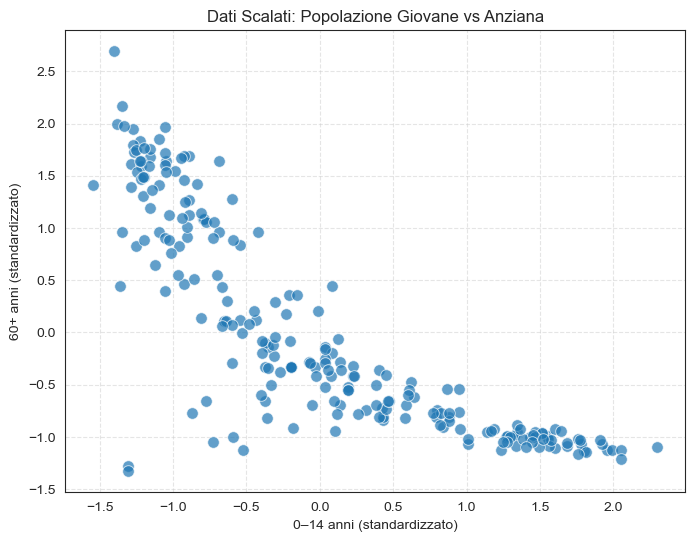

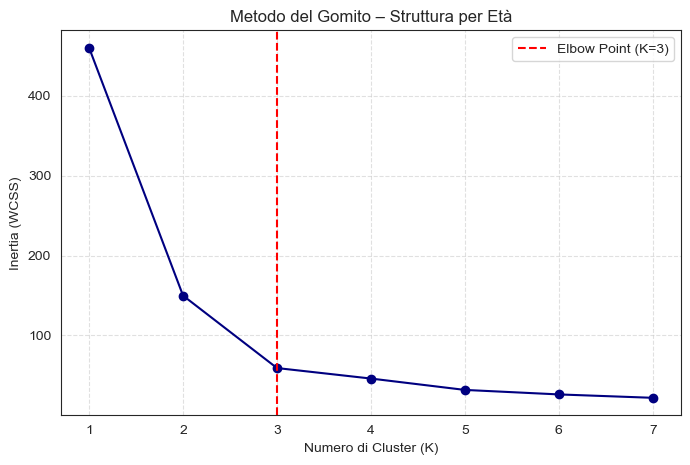

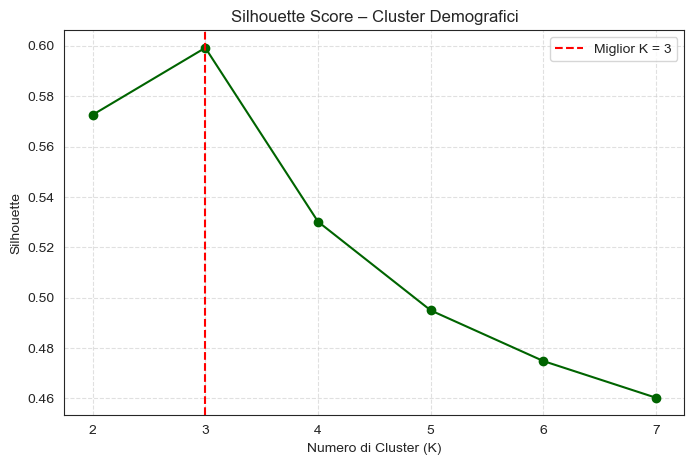

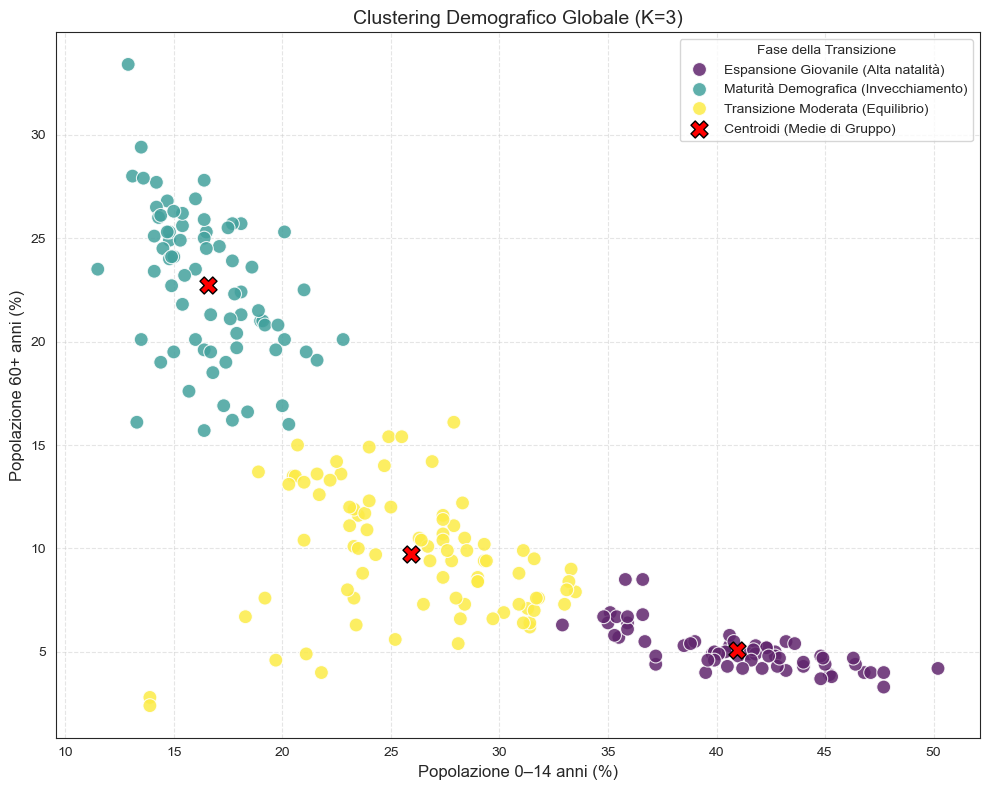


--- Media Statistica per Cluster ---
                                       Population age distribution (0-14 years, %)  \
Tipologia_Demografica                                                                
Espansione Giovanile (Alta natalità)                                     40.965079   
Maturità Demografica (Invecchiamento)                                    16.590541   
Transizione Moderata (Equilibrio)                                        26.018824   

                                       Population age distribution (60+ years, %)  
Tipologia_Demografica                                                              
Espansione Giovanile (Alta natalità)                                     5.111111  
Maturità Demografica (Invecchiamento)                                   22.725676  
Transizione Moderata (Equilibrio)                                        9.704706  


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# 1. CARICAMENTO E PREPARAZIONE
df = pd.read_csv("dataset/dataset_definitivo.csv")

# Feature demografiche: struttura per età
features = [
    'Population age distribution (0-14 years, %)',
    'Population age distribution (60+ years, %)'
]

print("--- Data Info (Struttura per Età) ---")
print(df[features].info())

# 2. IMPUTAZIONE (mediana)
imputer = SimpleImputer(strategy='median')
X_cleaned = imputer.fit_transform(df[features])

# 3. SCALING
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Visualizzazione dati scalati (Analisi preliminare)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], s=70, alpha=0.7)
plt.title('Dati Scalati: Popolazione Giovane vs Anziana')
plt.xlabel('0–14 anni (standardizzato)')
plt.ylabel('60+ anni (standardizzato)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4. METODO DEL GOMITO
k_values = range(1, 8)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'o-', color='navy')
plt.title('Metodo del Gomito – Struttura per Età')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=3, color='red', linestyle='--', label='Elbow Point (K=3)')
plt.legend()
plt.show()

# 5. SILHOUETTE SCORE
k_values_sil = range(2, 8)
silhouette_scores = []
for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

best_k = k_values_sil[np.argmax(silhouette_scores)]

plt.figure(figsize=(8, 5))
plt.plot(k_values_sil, silhouette_scores, 'o-', color='darkgreen')
plt.axvline(best_k, linestyle='--', color='red', label=f'Miglior K = {best_k}')
plt.title('Silhouette Score – Cluster Demografici')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('Silhouette')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 6. MODELLO FINALE E ETICHETTATURA
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster_Age'] = final_kmeans.fit_predict(X_scaled)

# Mappatura delle etichette basata sull'analisi demografica
cluster_labels = {
    0: 'Espansione Giovanile (Alta natalità)',
    1: 'Maturità Demografica (Invecchiamento)',
    2: 'Transizione Moderata (Equilibrio)'
}
df['Tipologia_Demografica'] = df['Cluster_Age'].map(cluster_labels)
custom_palette = {
    'Espansione Giovanile (Alta natalità)': '#60266d',   # Viola
    'Maturità Demografica (Invecchiamento)': '#43a19d',   # Teal
    'Transizione Moderata (Equilibrio)': '#fceb46'    # Giallo
}
# Centroidi riportati alla scala originale per il grafico
centers_scaled = final_kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

# 7. VISUALIZZAZIONE FINALE CON ETICHETTE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x=features[0],
    y=features[1],
    hue='Tipologia_Demografica',
    palette=custom_palette,
    s=100,
    alpha=0.85,
    edgecolor='white'
)

# Plot dei Centroidi
plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    c='red',
    marker='X',
    s=150,
    edgecolor='black',
    label='Centroidi (Medie di Gruppo)'
)

plt.title(f'Clustering Demografico Globale (K={best_k})', fontsize=14)
plt.xlabel('Popolazione 0–14 anni (%)', fontsize=12)
plt.ylabel('Popolazione 60+ anni (%)', fontsize=12)
plt.legend(title='Fase della Transizione', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 8. ANALISI DEI RISULTATI
print("\n--- Media Statistica per Cluster ---")
print(df.groupby('Tipologia_Demografica')[features].mean())


La segmentazione esplorativa viene condotta mediante **K-Means**. Il numero ottimale di cluster viene individuato combinando il **metodo del gomito** e il **Silhouette Score**, entrambi concordi nell’indicare **K = 3** come scelta più appropriata. Questo risultato è coerente anche dal punto di vista concettuale, poiché ci si attende la presenza di tre grandi tipologie demografiche a livello globale.

Il modello finale produce tre gruppi chiaramente interpretabili:

* **Espansione Giovanile (Alta natalità)**: Paesi caratterizzati da una quota molto elevata di popolazione giovane e una percentuale minima di anziani, tipici di contesti con alta fertilità e bassa aspettativa di vita.
* **Transizione Moderata (Equilibrio)**: Paesi con una distribuzione più bilanciata tra giovani e anziani, rappresentativi di fasi intermedie della transizione demografica.
* **Maturità Demografica (Invecchiamento)**: Paesi con una bassa percentuale di popolazione giovane e una quota elevata di over 60, tipici di società avanzate e demograficamente mature.

Le statistiche descrittive per cluster confermano la coerenza di questa interpretazione: i valori medi delle due variabili mostrano una progressione chiara e monotona lungo le tre tipologie individuate, rendendo i gruppi non solo distinti dal punto di vista algoritmico, ma anche **semanticamente significativi**.




<a id="kde"></a>

## Density Estimation

La **Kernel Density Estimation (KDE)** è stata impiegata per analizzare la distribuzione congiunta della **popolazione giovane (0–14 anni)** e **anziana (60+ anni)** nei Paesi del **dataset**. A differenza degli istogrammi, la KDE consente di visualizzare la distribuzione in maniera continua e fluida, **evidenziando** le aree a **maggiore densità** e i **picchi** multipli senza dipendere da bin arbitrari.

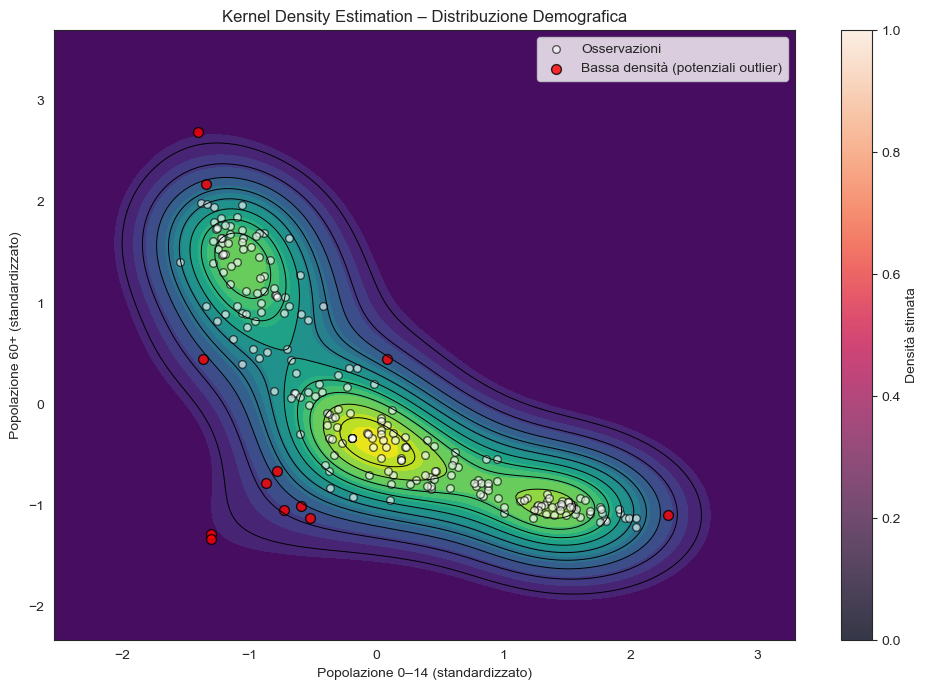

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KernelDensity

# 1. Caricamento dati
df = pd.read_csv("dataset/dataset_definitivo.csv")

features = [
    'Population age distribution (0-14 years, %)',
    'Population age distribution (60+ years, %)'
]

# 2. Pulizia dati
X = SimpleImputer(strategy='median').fit_transform(df[features])

# 3. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. KDE (Density Estimation)
kde = KernelDensity(kernel='gaussian', bandwidth=0.4)
kde.fit(X_scaled)

# Griglia per visualizzazione
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
density = np.exp(kde.score_samples(grid)).reshape(xx.shape)

# 5. Densità stimata sui punti reali (per individuare bassa densità)
point_density = np.exp(kde.score_samples(X_scaled))
low_density_threshold = np.percentile(point_density, 5)
outliers = point_density < low_density_threshold

# 6. Visualizzazione
plt.figure(figsize=(10, 7))

# Superficie di densità
plt.contourf(xx, yy, density, levels=20, cmap='viridis')

# Linee di contorno (picchi multimodali)
plt.contour(xx, yy, density, levels=10, colors='black', linewidths=0.7)

# Punti normali
plt.scatter(
    X_scaled[~outliers, 0],
    X_scaled[~outliers, 1],
    s=30,
    c='white',
    edgecolor='black',
    alpha=0.6,
    label='Osservazioni'
)

# Punti a bassa densità (potenziali outlier)
plt.scatter(
    X_scaled[outliers, 0],
    X_scaled[outliers, 1],
    s=50,
    c='red',
    edgecolor='black',
    alpha=0.8,
    label='Bassa densità (potenziali outlier)'
)

plt.title('Kernel Density Estimation – Distribuzione Demografica')
plt.xlabel('Popolazione 0–14 (standardizzato)')
plt.ylabel('Popolazione 60+ (standardizzato)')
plt.colorbar(label='Densità stimata')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Dal grafico risultante emergono alcune osservazioni chiave. Si **identificano regioni ad alta densità**, corrispondenti a gruppi di Paesi con caratteristiche demografiche simili, mentre la distribuzione mostra una **multimodalità** coerente con le **tre tipologie emerse dal clustering**: Paesi con predominanza di popolazione **giovane**, **Paesi in transizione** demografica e **Paesi con prevalenza di popolazione anziana**. Inoltre, la **KDE** mette in **evidenza** **punti** **isolati** in aree a bassa densità, possibili outlier demografici, che meritano ulteriori approfondimenti.

Dal punto di vista operativo, le zone di alta densità **confermano i cluster naturali già osservati tramite K-Means**, mentre le aree meno dense suggeriscono dinamiche particolari o anomalie nei dati. **Rispetto al semplice scatter plot**, la **KDE** offre una **rappresentazione più sfumata e continua della struttura dei dati**, **evidenziando** chiaramente sia **concentrazioni** sia rarefazioni.

In sintesi, la **KDE** integra **l’analisi cluster**, **confermando** i **gruppi** demografici e allo stesso tempo mettendo in luce eventuali Paesi con caratteristiche demografiche particolari. Questa tecnica rappresenta quindi uno strumento efficace per comprendere la distribuzione complessa dei dati demografici e individuare anomalie, fornendo una visione più ricca e dettagliata della densità dei dati.

<a id='conclusioni'></a>

# Conclusioni

A conclusione del presente percorso di ricerca, volto all’analisi multidimensionale dei profili socio-economici delle Nazioni Unite, è possibile delineare una sintesi critica dei risultati ottenuti, che riflettono non solo la complessità del panorama globale contemporaneo, ma anche l'efficacia degli strumenti statistici e computazionali adottati.

L’indagine ha preso le mosse da un rigoroso processo di é*Data Preprocessing*é, fase che si è rivelata ontologicamente fondamentale: la trasformazione del dato grezzo in informazione strutturata ha permesso di mitigare i rischi di distorsione analitica, garantendo al contempo la robustezza metodologica necessaria per le successive inferenze. Attraverso l'analisi esplorativa, è emersa con nitidezza la natura sistemica dello sviluppo globale. Si è osservato come la crescita economica, misurata dal **PIL pro capite**, non agisca come una variabile isolata, ma si ponga al centro di una stretta correlazione sinergica con l’**avanzamento tecnologico** e l’**impatto ambientale**. Tale evidenza suggerisce che il progresso delle nazioni sia ancora profondamente ancorato a modelli energetici ad alta intensità di carbonio, ponendo una sfida cruciale per le future politiche di sostenibilità.

Sul versante demografico e sanitario, lo studio ha confermato come la mortalità infantile e l'aspettativa di vita rappresentino i più sensibili indicatori del benessere collettivo. L'applicazione di tecniche di apprendimento non supervisionato, in particolare la **Principal Component Analysis** (PCA) e il **Clustering** K-Means, ha permesso di superare le distinzioni geografiche convenzionali, identificando invece raggruppamenti basati su dinamiche intrinseche di transizione demografica. La capacità di discernere tra popolazioni giovani, in via di invecchiamento o stabilizzate, offre una chiave di lettura preziosa per la comprensione dei futuri equilibri geopolitici e dei fabbisogni assistenziali globali.

L’implementazione di modelli di Machine Learning, quali la **Regressione Logistica** e la **Linear Discriminant Analysis** (LDA), ha infine confermato l’elevata predicibilità dei livelli di sviluppo a partire da variabili strutturali. L’accuratezza e la capacità discriminante dimostrate da tali algoritmi validano l’ipotesi che esistano determinanti socio-economici definiti che tracciano il destino di una nazione nel contesto internazionale.

In definitiva, questo progetto non rappresenta soltanto un esercizio di analisi tecnica, ma si configura come un contributo alla comprensione delle asimmetrie globali. I risultati ottenuti dimostrano come l'integrazione tra rigore **statistico** e **innovazione tecnologica** permetta di distillare, dalla vasta mole di dati oggi disponibili, una conoscenza strategica essenziale per supportare decisioni politiche basate sull'evidenza e per orientare gli sforzi internazionali verso uno sviluppo più equo e sostenibile.

## Indicatori di progresso: il percorso emergente del Senegal


In [71]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# threshold = mediana
thr = df["GDP per capita (current US$)"].median()
df["rich_country"] = (df["GDP per capita (current US$)"] >= thr).astype(int)

best_predictors = [
    "Individuals using the Internet (per 100 inhabitants)",
    "Pop. using improved sanitation facilities (urban, %)",
    "Life expectancy at birth (males, years)",
    "Infant mortality rate (per 1000 live births",
    "Education: Secondary gross enrol. ratio (female per 100 pop.)",
    "Population age distribution (60+ years, %)"
]

# Selezione delle colonne presenti nel dataframe
df_model = df[["rich_country"] + best_predictors].dropna()

# Formula corretta con Q()
formula = "rich_country ~ " + " + ".join([f'Q("{col}")' for col in best_predictors])

# Fit del modello logistico
model = logit(formula, data=df_model).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.178701
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           rich_country   No. Observations:                  159
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.7409
Time:                        11:50:59   Log-Likelihood:                -28.413
converged:                       True   LL-Null:                       -109.68
Covariance Type:            nonrobust   LLR p-value:                 1.724e-32
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------

# Test con valori 2015

In [72]:
import pandas as pd
import numpy as np

X_new_2015 = pd.DataFrame([{
    'Intercept': 1,
    'Q("Individuals using the Internet (per 100 inhabitants)")': 21.7,         
    'Q("Pop. using improved sanitation facilities (urban, %)")': 17,        
    'Q("Life expectancy at birth (males, years)")': 64.6,                    
    'Q("Infant mortality rate (per 1000 live births")': 51,                  
    'Q("Education: Secondary gross enrol. ratio (female per 100 pop.)")': 33.3,
    'Q("Population age distribution (60+ years, %)")': 5.3                      
}])

# Calcola LOGIT come Xβ
logit_2015 = X_new_2015.dot(model.params).iloc[0]

# Funzione logistica
prob_2015 = 1 / (1 + np.exp(-logit_2015))

print("=== PREVISIONE Senegal 2015 ===")
print(f"Logit: {logit_2015:.4f}")
print(f"Probabilità di 'paese ricco': {prob_2015:.4f}")
print("Classificazione:", "RICCO" if prob_2015 >= 0.5 else "NON RICCO")

=== PREVISIONE Senegal 2015 ===
Logit: -5.3984
Probabilità di 'paese ricco': 0.0045
Classificazione: NON RICCO


# Test con valori 2020

In [73]:
import pandas as pd
import numpy as np

# Ricostruzione delle variabili del modello per 2020
X_new_2020 = pd.DataFrame([{
    'Intercept': 1,
    'Q("Individuals using the Internet (per 100 inhabitants)")': 53.3,          
    'Q("Pop. using improved sanitation facilities (urban, %)")': 13.9,        
    'Q("Life expectancy at birth (males, years)")': 65.7,                      
    'Q("Infant mortality rate (per 1000 live births")': 40.2,                    
    'Q("Education: Secondary gross enrol. ratio (female per 100 pop.)")': 37.1,
    'Q("Population age distribution (60+ years, %)")': 5.4                       
}])

# Calcola LOGIT come Xβ
logit_2020 = X_new_2020.dot(model.params).iloc[0]

# Funzione logistica
prob_2020 = 1 / (1 + np.exp(-logit_2020))

print("=== PREVISIONE Senegal 2020 ===")
print(f"Logit: {logit_2020:.4f}")
print(f"Probabilità di 'paese ricco': {prob_2020:.4f}")
print("Classificazione:", "RICCO" if prob_2020 >= 0.5 else "NON RICCO")

=== PREVISIONE Senegal 2020 ===
Logit: 2.0749
Probabilità di 'paese ricco': 0.8884
Classificazione: RICCO


L’analisi delle variabili considerate mostra come il Senegal presenti segnali chiari di transizione verso uno stato di sviluppo emergente. In particolare, i miglioramenti negli indicatori di salute, l’aumento dell’accesso alle tecnologie digitali e il rafforzamento delle infrastrutture di base legate alla sostenibilità ambientale risultano determinanti nel migliorare la probabilità di sviluppo del Paese nel tempo.

I risultati suggeriscono che il Senegal non può più essere interpretato esclusivamente come un Paese a basso livello di sviluppo, ma piuttosto come una realtà emergente, caratterizzata da progressi strutturali nei settori della salute, della tecnologia e della sostenibilità. Tali dinamiche indicano un percorso di crescita solido e coerente, capace di incidere in modo significativo sulle prospettive di sviluppo socio-economico nel medio-lungo periodo.

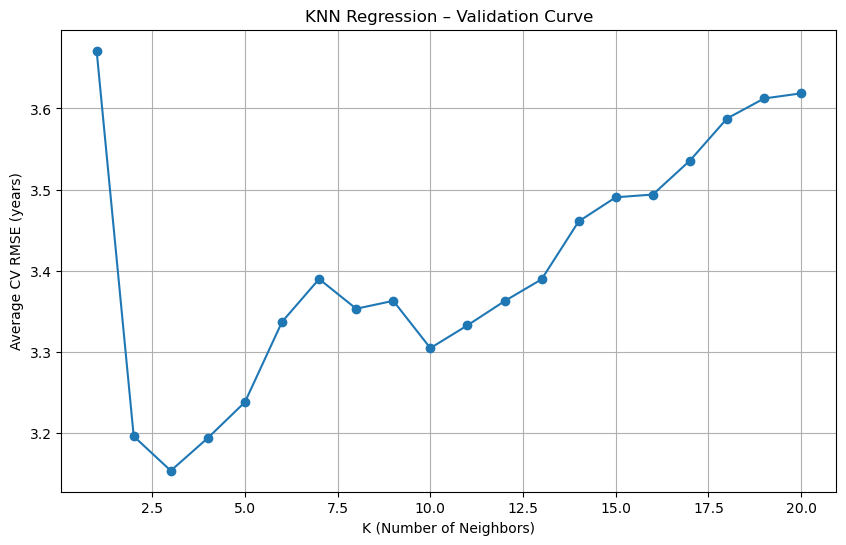

Best K from CV: 3

--- Final Model Evaluation ---
MAE  : 2.89 years
RMSE : 4.47 years

--- Senegal Life Expectancy Predictions ---
 Senegal 2015: 62.03 years
 Senegal 2020: 64.38 years
 Change 2015 → 2020: 2.35 years


In [5]:
# ============================================================
# KNN REGRESSION – LIFE EXPECTANCY + SENEGAL PREDICTIONS
# ============================================================

# -----------------------
# 1. Libraries
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -----------------------
# 2. Load dataset
# -----------------------
df = pd.read_csv("dataset/dataset_definitivo.csv")
warnings.filterwarnings("ignore")

# -----------------------
# 3. Target creation
# -----------------------
df['Life expectancy mean'] = (
    df['Life expectancy at birth (females, years)'] +
    df['Life expectancy at birth (males, years)']
) / 2

df = df.dropna(subset=['Life expectancy mean'])

# -----------------------
# 4. Feature selection
# -----------------------
features = [
    'GDP per capita (current US$)',
    'Unemployment (% of labour force)',
    'Health: Total expenditure (% of GDP)',
    'Infant mortality rate (per 1000 live births',
    'Urban population (% of total population)',
    'CO2 emission estimates (tons per capita)',
    'Energy supply per capita (Gigajoules)'
]

X = df[features]
y = df['Life expectancy mean']

# -----------------------
# 5. Missing values
# -----------------------
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# -----------------------
# 6. Train / Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# -----------------------
# 7. Scaling
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# 8. Cross-validation – K selection
# ============================================================
k_range = range(1, 21)
cv_rmse_scores = []

for k in k_range:
    knn = KNeighborsRegressor(
        n_neighbors=k,
        weights='distance'
    )
    
    scores = cross_val_score(
        knn,
        X_train_scaled,
        y_train,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    
    cv_rmse_scores.append(np.sqrt(-scores.mean()))

# -----------------------
# 9. Validation curve
# -----------------------
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_rmse_scores, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average CV RMSE (years)')
plt.title('KNN Regression – Validation Curve')
plt.grid(True)
plt.show()

best_k = k_range[np.argmin(cv_rmse_scores)]
print(f"Best K from CV: {best_k}")

# ============================================================
# 10. Final model
# ============================================================
final_knn = KNeighborsRegressor(
    n_neighbors=best_k,
    weights='distance'
)

final_knn.fit(X_train_scaled, y_train)

# -----------------------
# 11. Final evaluation
# -----------------------
y_pred = final_knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Final Model Evaluation ---")
print(f"MAE  : {mae:.2f} years")
print(f"RMSE : {rmse:.2f} years")

# ============================================================
# 12. Senegal predictions (2015 & 2020)
# ============================================================

# Senegal 2015
senegal_2015 = np.array([[
    1237.2,   # GDP per capita
    6.8,      # Unemployment
    4.4,      # Health expenditure
    51.0,     # Infant mortality
    45.9,     # Urban population
    0.6,      # CO2 emissions
    12.0      # Energy supply
]])

# Senegal 2020
senegal_2020 = np.array([[
    1492.5,
    3.3,
    5.2,
    40.2,
    47.7,
    0.5,
    12.0
]])

# Imputation + scaling
senegal_2015_scaled = scaler.transform(imputer.transform(senegal_2015))
senegal_2020_scaled = scaler.transform(imputer.transform(senegal_2020))

# Predictions
pred_2015 = final_knn.predict(senegal_2015_scaled)[0]
pred_2020 = final_knn.predict(senegal_2020_scaled)[0]

print("\n--- Senegal Life Expectancy Predictions ---")
print(f" Senegal 2015: {pred_2015:.2f} years")
print(f" Senegal 2020: {pred_2020:.2f} years")
print(f" Change 2015 → 2020: {pred_2020 - pred_2015:.2f} years")


 Applicando il modello al Senegal, si ottengono le seguenti stime:
- Anno 2015: aspettativa di vita stimata pari a 62.03 anni
- Anno 2020: aspettativa di vita stimata pari a 64.38 anni

Il modello evidenzia quindi un incremento di circa 2.35 anni
nel periodo 2015–2020, coerente con il miglioramento osservato
in vari indicatori socio-economici e sanitari, in particolare
la riduzione della mortalità infantile e l’aumento della spesa
sanitaria.
